### == Project Initialization ==

In [1]:
# --- הגדרת תיקיית שורש לפרויקט ---
from pathlib import Path

# יצירת קובץ סימון שמציין את תיקיית השורש
Path(".project-root").touch(exist_ok=True)

# הדפסה לבדיקה
print("Project root set to:", Path.cwd())


Project root set to: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project


In [2]:
# --- הגדרת נתיבי פרויקט  ---

from pathlib import Path

# איתור תיקיית השורש 
PROJ_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()

# הגדרת תיקיות משנה עיקריות
DATA = PROJ_ROOT / "data"
RAW = DATA / "raw_data"
INTERIM = DATA / "interim"
PROCESSED = DATA / "processed"
ARTIFACTS = PROJ_ROOT / "artifacts"
REPORTS = PROJ_ROOT / "reports"

# יצירת התיקיות אם הן לא קיימות
for p in [RAW, INTERIM, PROCESSED, ARTIFACTS, REPORTS]:
    p.mkdir(parents=True, exist_ok=True)

# הדפסה לבדיקה
print("Project root:", PROJ_ROOT)
print("Has .git? ", (PROJ_ROOT / ".git").exists())
print("RAW path:", RAW)


Project root: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project
Has .git?  True
RAW path: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\raw_data


In [3]:
# --- Project Paths Setup (standalone replacement for paths.py) ---

from pathlib import Path

# Locate project root (handles both root and notebooks folders)
PROJ_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()

# Define subfolders
DATA = PROJ_ROOT / "data"
RAW = DATA / "raw_data"
INTERIM = DATA / "interim"
PROCESSED = DATA / "processed"
ARTIFACTS = PROJ_ROOT / "artifacts"
REPORTS = PROJ_ROOT / "reports"

# Create folders if missing
for p in [RAW, INTERIM, PROCESSED, ARTIFACTS, REPORTS]:
    p.mkdir(parents=True, exist_ok=True)

# Confirmation print
print("Project root:", PROJ_ROOT)
print("Has .git? ", (PROJ_ROOT / ".git").exists())
print("RAW path:", RAW)


Project root: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project
Has .git?  True
RAW path: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\raw_data


#### == Install & Import dependencies ==

In [4]:
# Install + Import core libraries
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["#DB7093"])
plt.rcParams["figure.figsize"] = (10, 6) 

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette("RdPu")  

import warnings, os, re, textwrap, time, json
from collections import Counter
from pathlib import Path
warnings.filterwarnings("ignore")

%matplotlib inline



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# DATA PREP

### == Load raw data & create working copy ==


In [5]:
import os
print("Files in RAW:", os.listdir(RAW))


Files in RAW: ['.ipynb_checkpoints', 'participants_sep23_sep24_raw.csv']


In [6]:
import os, pandas as pd

print("Files in RAW:", os.listdir(RAW))

RAW_FILE = RAW / "participants_sep23_sep24_raw.csv"

df = pd.read_csv(RAW_FILE)
print("Shape:", df.shape)
df.head()


Files in RAW: ['.ipynb_checkpoints', 'participants_sep23_sep24_raw.csv']
Shape: (107300, 237)


,מס' סימוכין 360,מס' סימוכין ממשל זמין,סוג טופס,גרסת הטופס,תאריך טופס,ממלא הטופס,תפקיד ממלא הטופס,סמל יישוב,יישוב,מחוז,...,"173_יכולת לבקש ולקבל עזרה (למשל: פנייה לקבלת עזרה בעת צרה, שיתוף בני גילו או מבוגר מוכר בקשיים, גיוס תמיכה לסיוע בפתרון בעיו",174_קסם אישי (למשל: יכולת לגייס אחרים לצרכיו או לטובתו/ כריזמה / חוש הומור),"175_יוזמה ומנהיגות (למשל גילוי מעורבות חברתית, תרומה בדרכים שונות למשפחה/לקבוצת החברים/לקהילה / יכולת להשפיע על אחרים ו/או ל","176_לכידות וקרבה בתוך המשפחה (למשל: מחויבות, דאגה ואמון, קיום שגרות משפחתיות- מסורות טקסים ורוטינות)",177_תקשורת בריאה במשפחה (למשל: שיתוף מגוון רגשות / לגיטימיות לאי הסכמה/ יכולת להתפשר / קידום משותף של פתרון בעיות/ כבוד הדד,"178_גמישות משפחתית (יכולת של המשפחה להשתנות ולהסתגל לנסיבות ואירועי חיים ולהתמודד עמם (למשל: מעברים, שינויים בהרכב המשפחה, ה",179_קהילה ורשתות חברתיות תומכות (למשל: לכידות וסולידריות קהילתית/ נגישות וזמינות של שירותים חברתיים/ דמויות משמעותיות),תחום שהילד מגלה הצלחה,מורכבות,מורכבות הורים
0,1244846,NaN,מעקב אחר ילדים המשתתפים בתוכניות לילדים ונוער ...,גיל הרך חרדי,09/30/2024 22:15:35,אסתר אמונה אוסטרובסקי,פסיכולוג,2900,ביתר עילית,ירושלים,...,כן,כן,NaN,NaN,NaN,NaN,NaN,"נראות, כוח רצון, מנהיגות, החלטיות.",מורכבות גבוהה,מורכבות נמוכה
1,1244845,NaN,מעקב אחר ילדים המשתתפים בתוכניות לילדים ונוער ...,גיל הרך,09/30/2024 21:05:18,רואן סעדי,פארה רפואי,8580,עילוט,צפון א,...,לא,לא,NaN,NaN,NaN,NaN,NaN,NaN,קצה רצף,לא אותרו מצבי סיכון
2,1244844,NaN,מעקב אחר ילדים המשתתפים בתוכניות לילדים ונוער ...,גיל הרך,09/30/2024 21:01:33,רואן סעדי,פארה רפואי,8580,עילוט,צפון א,...,כן,כן,NaN,NaN,NaN,NaN,NaN,NaN,קצה רצף,סיכון נמוך (מניעה)
3,1244843,NaN,מעקב אחר ילדים המשתתפים בתוכניות לילדים ונוער ...,גיל הרך,09/30/2024 20:57:59,רואן סעדי,פארה רפואי,8580,עילוט,צפון א,...,לא,לא,NaN,NaN,NaN,NaN,NaN,NaN,קצה רצף,סיכון נמוך (מניעה)
4,1244842,NaN,מעקב אחר ילדים המשתתפים בתוכניות לילדים ונוער ...,גיל הרך,09/30/2024 16:57:14,בת-אל אלון,פארה רפואי,8070,אור עקיבא,חיפה,...,כן,כן,NaN,NaN,NaN,NaN,NaN,NaN,סיכון נמוך (מניעה),סיכון נמוך (מניעה)


### == Data Utilities & Change Tracking Tools ==

In [7]:
# פונקציות עזר לעבודה עם הדאטה: צילום מצב, דוח מהיר, השוואת מבנה + לוג שינויים מצטבר

import time, json
from pathlib import Path
import pandas as pd

# תיקיית ארטיפקטים
ARTIFACTS = Path("artifacts")
ARTIFACTS.mkdir(parents=True, exist_ok=True)

# ===== לוג שינויים מצטבר =====
change_log = []

def snapshot_cols(df: pd.DataFrame):
    """צילום מצב: סט עמודות + שורות/עמודות למניין."""
    return set(df.columns), df.shape[0], df.shape[1]

def report_changes(step_name: str,
                   before_cols: set, after_cols: set,
                   rows_before: int, rows_after: int,
                   print_now: bool = True):
    """דוח לפני–אחרי + הוספה ללוג המצטבר."""
    added   = sorted(list(after_cols - before_cols))
    removed = sorted(list(before_cols - after_cols))
    rec = {
        "שלב": step_name,
        "שורות לפני": rows_before, "שורות אחרי": rows_after, "Δ שורות": rows_after - rows_before,
        "עמודות לפני": len(before_cols), "עמודות אחרי": len(after_cols), "Δ עמודות": len(after_cols) - len(before_cols),
        "נוספו": "; ".join(added) if added else "",
        "הוסרו": "; ".join(removed) if removed else "",
    }
    change_log.append(rec)
    if print_now:
        print(f"=== לפני–אחרי: {step_name} ===")
        print(f"צורה לפני: ({rows_before:,}, {len(before_cols)}) | צורה אחרי: ({rows_after:,}, {len(after_cols)})")
        print(f"עמודות שנוספו ({len(added)}): {added if added else []}")
        print(f"עמודות שהוסרו ({len(removed)}): {removed if removed else []}")

def save_change_log(path: Path = ARTIFACTS / "change_log.csv"):
    """שמירת הלוג המצטבר לקובץ CSV."""
    if not change_log:
        print("אין רשומות בלוג השינויים.")
        return
    df_log = pd.DataFrame(change_log)
    df_log.to_csv(path, index=False, encoding="utf-8-sig")
    print(f"[Saved] לוג שינויים: {path}")

# ===== שמירת snapshot של הדאטה (Parquet/CSV) + סכימת טיפוסים =====
def save_snapshot_df(df: pd.DataFrame, name: str) -> str:
    ts = time.strftime("%Y%m%d-%H%M%S")
    base = ARTIFACTS / f"{ts}_{name}"
    try:
        df.to_parquet(f"{base}.parquet", index=False)
        stored = f"{base}.parquet"
    except Exception:
        df.to_csv(f"{base}.csv", index=False, encoding="utf-8")
        stored = f"{base}.csv"
    schema = {
        "name": name,
        "rows": int(len(df)),
        "cols": int(df.shape[1]),
        "dtypes": {c: str(t) for c, t in df.dtypes.items()}
    }
    with open(f"{base}_schema.json", "w", encoding="utf-8") as f:
        json.dump(schema, f, ensure_ascii=False, indent=2)
    print(f"[Saved] {stored} + {base.name}_schema.json")
    return str(base)

# ===== דוח מהיר =====
def quick_data_report(df: pd.DataFrame, title: str = "דוח מהיר"):
    print(f"\n=== {title} ===")
    print("Shape:", df.shape)
    print("\n-- Info --"); df.info()
    print("\n-- Dtypes summary --"); print(df.dtypes.value_counts())
    print("\n-- Unique values per column (top 10) --")
    nunique = df.nunique(dropna=False).sort_values(ascending=False)
    print(nunique.head(10))
    print("\n-- Missing (top 10) --")
    na = df.isna().sum(); na = na[na > 0].sort_values(ascending=False)
    print(na.head(10))
    print("\n-- Duplicated rows --", df.duplicated().sum())

# ===== השוואת סכימה =====
def diff_schema(df_before: pd.DataFrame, df_after: pd.DataFrame, title: str = "השוואת סכימה") -> pd.DataFrame:
    a = pd.Series({c: str(t) for c, t in df_before.dtypes.items()}, name="before")
    b = pd.Series({c: str(t) for c, t in df_after.dtypes.items()},  name="after")
    allc = sorted(set(a.index) | set(b.index))
    diff = pd.DataFrame({"before": a.reindex(allc), "after": b.reindex(allc)})
    diff["changed"] = diff["before"] != diff["after"]
    print(f"=== {title} ===")
    print(diff[diff["changed"]])
    return diff




### == Remove PII columns (Personally Identifiable Information) == 


In [8]:
list(df.columns)

["מס' סימוכין 360",
 "מס' סימוכין ממשל זמין",
 'סוג טופס',
 'גרסת הטופס',
 'תאריך טופס',
 'ממלא הטופס',
 'תפקיד ממלא הטופס',
 'סמל יישוב',
 'יישוב',
 'מחוז',
 'סוג מוסד',
 'סמל מוסד',
 'שם מענה',
 'סמל מענה',
 'מיקום מענה',
 'כיתה',
 'מפקח מענה',
 'אחראי מענה',
 'מנהל מענה',
 'סטטוס מענה',
 'קבוצת גיל',
 'שם תוכנית',
 'סמל תוכנית',
 'תעודת זהות',
 'מזהה אחר',
 'שם הילד',
 'מגדר',
 'מגדיר עצמו כמשתייך ללהטב"ק',
 'שנת לידה',
 'מסגרת חינוכית',
 'שם המוסד בו לומד הילד',
 'סמל המוסד בו לומד הילד',
 'שכבה',
 'ישוב מגורים',
 'שכונת מגורים',
 'קבוצת אוכלוסיה',
 'עם מי גר הילד',
 'יתום',
 'הילד במסגרת מחוץ לבית',
 'האם הילד אובחן',
 'מגבלות מאובחנת',
 'מוגבלות שאינה מאובחנת',
 'ארץ לידה',
 'הילד עלה בשנים האחרונות',
 'ארץ לידה של האב',
 'האב עלה בשנים האחרונות',
 'ארץ לידה של האם',
 'האם עלתה בשנים האחרונות',
 'סטטוס משפחתי של ההורים',
 'תעסוקת אב',
 'תעסוקת אם',
 'מצוקה כלכלית',
 'מספר ילדים (עד גיל 18)',
 'השכלת אב',
 'השכלת אם',
 'הורה סובל מהתמכרויות',
 'הורה מעורב בהתנהגות עבריינית',
 'הור

In [9]:
## --- הסרת עמודות רגישות  ---

# צילום מצב לפני הפעולה
df_before = df.copy()

# עמודות להסרה
drop_cols = [
    "שם המוסד בו לומד הילד", "ממלא הטופס", "מפקח מענה", 
    "אחראי מענה", "מנהל מענה", "שם הילד", 
    "סמל המוסד בו לומד הילד"
]

# מה קיים ומה לא קיים לפני ההסרה  
source_cols = set(df_raw.columns) if 'df_raw' in globals() else set(df_before.columns)
present_to_drop = [c for c in drop_cols if c in source_cols]
not_found = [c for c in drop_cols if c not in source_cols]

# ההסרה בפועל
df = df.drop(columns=drop_cols, errors="ignore")

# תיאור מה שהוסר
after_cols = set(df.columns)
actually_dropped = sorted(list(set(df_before.columns) - after_cols))

# שמירת עותק עבודה  
OUT_FILE = INTERIM / "participants_sep23_sep24_before_drop.csv"
OUT_FILE.parent.mkdir(parents=True, exist_ok=True)

df.to_csv(OUT_FILE, index=False, encoding="utf-8")
print("Saved:", OUT_FILE)

# השוואת מבנה לפני/אחרי
diff_schema(df_before, df, title="Schema diff: after dropping sensitive columns")

# דוח מהיר למצב הנוכחי
quick_data_report(df, title="After dropping sensitive columns")


# שמירת צילום מצב לשחזור עתידי
save_snapshot_df(df, "after_drop_sensitive")

# סיכום קצר 
print(f"\nRequested to drop: {len(drop_cols)}")
print(f"Found & requested: {len(present_to_drop)} -> {present_to_drop}")
print(f"Not found: {len(not_found)} -> {not_found}")
print(f"Actually dropped (by diff): {len(actually_dropped)} -> {actually_dropped}")
print("Shape after dropping columns:", df.shape)


Saved: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\interim\participants_sep23_sep24_before_drop.csv
=== Schema diff: after dropping sensitive columns ===
                         before after  changed
אחראי מענה               object   NaN     True
ממלא הטופס               object   NaN     True
מנהל מענה                object   NaN     True
מפקח מענה                object   NaN     True
סמל המוסד בו לומד הילד  float64   NaN     True
שם הילד                  object   NaN     True
שם המוסד בו לומד הילד    object   NaN     True

=== After dropping sensitive columns ===
Shape: (107300, 230)

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107300 entries, 0 to 107299
Columns: 230 entries, מס' סימוכין 360 to מורכבות הורים
dtypes: bool(8), float64(29), int64(4), object(189)
memory usage: 182.6+ MB

-- Dtypes summary --
object     189
float64     29
bool         8
int64        4
Name: count, dtype: int64

-- Unique values per colum

### == Standardizing Column Names ==

In [10]:
from collections import Counter

# צילום מצב לפני
df_before = df.copy()

# שינוי שמות עמודות בעזרת מילון

RENAMES = {
    """מס' סימוכין 360""": "ref_id_360",
    """מס' סימוכין ממשל זמין""": "gov_ref_id",
    """סוג טופס""": "form_type",
    """גרסת הטופס""": "form_version",
    """תאריך טופס""": "form_date",
    """תפקיד ממלא הטופס""": "form_filler_role",
    """סמל יישוב""": "yeshuv_code",
    """יישוב""": "yeshuv_name",
    """מחוז""": "machoz",
    """סוג מוסד""": "institution_type",
    """סמל מוסד""": "institution_code",
    """שם מענה""": "service_name",
    """סמל מענה""": "service_code",
    """מיקום מענה""": "service_location",
    """כיתה""": "grade",
    """סטטוס מענה""": "service_status",
    """קבוצת גיל""": "age_group",
    """שם תוכנית""": "program_name",
    """סמל תוכנית""": "program_code",
    """תעודת זהות""": "id_number",
    """מזהה אחר""": "alt_identifier",
    """מגדר""": "sex",
    """מגדיר עצמו כמשתייך ללהטב"ק""": "lgbtq_self_id",
    """שנת לידה""": "birth_year",
    """מסגרת חינוכית""": "edu_framework",
    """שכבה""": "school_level",
    """ישוב מגורים""": "residence_locality",
    """שכונת מגורים""": "residence_neighborhood",
    """קבוצת אוכלוסיה""": "population_group",
    """עם מי גר הילד""": "child_living_arrangement",
    """יתום""": "orphan_status",
    """הילד במסגרת מחוץ לבית""": "out_of_home_placement",
    """האם הילד אובחן""": "diagnosed_disability_flag",
    """מגבלות מאובחנת""": "diagnosed_disability_type",
    """מוגבלות שאינה מאובחנת""": "undiagnosed_disability_flag",
    """ארץ לידה""": "child_birth_country",
    """הילד עלה בשנים האחרונות""": "child_recent_immigrant",
    """ארץ לידה של האב""": "father_birth_country",
    """האב עלה בשנים האחרונות""": "father_recent_immigrant",
    """ארץ לידה של האם""": "mother_birth_country",
    """האם עלתה בשנים האחרונות""": "mother_recent_immigrant",
    """סטטוס משפחתי של ההורים""": "parents_marital_status",
    """תעסוקת אב""": "father_employment",
    """תעסוקת אם""": "mother_employment",
    """מצוקה כלכלית""": "economic_distress",
    """מספר ילדים (עד גיל 18)""": "num_children_u18",
    """השכלת אב""": "father_education",
    """השכלת אם""": "mother_education",
    """הורה סובל מהתמכרויות""": "parent_addictions_flag",
    """הורה מעורב בהתנהגות עבריינית""": "parent_criminal_involvement",
    """הורה עם מוגבלות""": "parent_disability_flag",
    """מוגבלות הורה""": "parent_disability_type",
    """האב מקבל התערבות סדירה במסגרת המענה""": "father_receives_intervention",
    """האם מקבלת התערבות סדירה במסגרת המענה""": "mother_receives_intervention",
    """המשפחה מוכרת ברווחה""": "welfare_known_family",
    """חד הורי""": "single_parent",
    """ילד מקבל שירותים/מענים נוספים""": "child_additional_services",
    """שם השירות""": "other_service_name",
    """הגורם המטפל""": "treating_agency",
    """מקבל שירות – ילד""": "receives_service_child",
    """מקבל שירות - הורים""": "receives_service_parents",
    """שפה""": "subject_language",
    """חשבון""": "subject_math",
    """אנגלית""": "subject_english",
    """מדעים""": "subject_science",
    """שרות""": "service_general",
    """פרטני""": "individual_session",
    """מספר פעמים בשבוע (בי"ס)""": "school_service_freq_week",
    """מספר שעות כל פעם""": "school_service_hours_per_session",
    """מזהה מענה בית ספרי""": "school_service_id",
    """שירות קהילתי""": "community_service_flag",
    """מספר פעמים בשבוע (בקהילה)""": "community_service_freq_week",
    """מספר שעות למפגש""": "community_service_hours_per_session",
    """מזהה מענה קהילתי""": "community_service_id",
    """יודע שהילד מוכר/מטופל באגף הרווחה""": "aware_child_welfare_involvement",
    """האם הילד עבר ועדת השמה""": "placement_committee_flag",
    """ת. הצטרפות""": "join_date",
    """ת. עזיבה""": "leave_date",

    # --- מצבי סיכון (RS = Risk State header, RI = Risk Indicator item) ---
    """100001_קשיים בטיפול הפיזי""": "RS1_physical_care_difficulties",
    """1_הערך את הקשיים בטיפול הפיזי בילד/נער""": "rs1_physical_care_difficulty",
    """2_הילד/הנער אינו מביא אוכל לבית הספר ו/או מתלונן על רעב.""": "ri1_1_food_insecurity",
    """3_הילד/נער לבוש בבגדים בלויים / שאינם מתאימים לעונה ו/או למידותיו?""": "ri1_2_inadequate_clothing",
    """4_הילד/הנער אינו נקי באופן חריג.""": "ri3_poor_hygiene",
    """6_הילד/הנער חי בבית שבו תנאי התברואה והתחזוקה מסכנים אותו או לא תקינים.""": "ri1_4_poor_sanitation_home_star",

    """100010_ההורים מתקשים לדאוג לשירותים הנחוצים לילדיהם""": "RS2_parents_cant_arrange_services",
    """100063_קשיים בטיפול הרפואי, שיקומי והתפתחותי""": "rs2_medical_rehab_dev_care_diff",
    """23_הורי הילד/נער אינם דואגים לטיפול רפואי/ שיקומי/ התפתחותי עבור הילד לרבות קבלת עזרים שיקומיים נלווים (כגון: מכשירי שמיעה,""": "ri2_1_parents_not_providing_care",

    """100002_קשיים במידת ההשגחה""": "RS3_supervision_difficulties",
    """7_הערך את הקשיים במידת ההשגחה על הילד/נער""": "rs3_rate_supervision_difficulty",
    """8_הילד/נער נמצא שעות רבות ללא השגחה מתאימה: אין סידור של מבוגר משגיח, נמצא אצל מבוגרים רבים לא קבועים, נשאר עם מי שאינו יכ""": "ri3_1_unsupervised_hours",
    """9_הילד/נער משוטט שעות רבות בחוץ ללא השגחה שלא על פי גילו""": "ri3_2_wanders_unsupervised_star",
    """131_הילד/הנער מעורב בתאונות בית/סביבה רבות מעבר למקובל בגילו.""": "ri3_3_many_accidents",

    """100007_קשיים בקשר הרגשי בין הילדים להוריהם""": "RS4_parent_child_relationship_difficulties",
    """10_הערך את הקשיים בקשר הרגשי בין הילד/נער לבין הוריו""": "rs4_rate_emotional_bond_difficulty",
    """12_הורי הילד/נער נמנעים מאינטרקציה איתו / נמנעים מגילויי חיבה כלפיו (לא נוגעים, לא מחבקים, לא אומרים שהם אוהבים אותו).""": "ri4_1_parents_avoid_interaction_star",
    """13_הורי הילד/הנער מתקשים להרגיע אותו כאשר הוא במצוקה.""": "ri4_2_parents_cant_soothe",
    """15_ישנו נתק בין אחד ההורים או שניהם לבין הילד/הנער.""": "ri4_3_parent_child_cutoff_star",

    """100009_קשיים בהתמודדות ההורים עם התנהגות הילדים ובהצבת גבולות""": "RS5_parenting_boundaries_difficulties",
    """17_הערך את יכולת ההורים להתמודד עם התנהגות הילד/הנער ולהציב לו גבולות.""": "rs5_parenting_capacity_limits",
    """18_ההורים מתקשים להציב לילד/נער גבולות ואינם מתמודדים עם התנהגותו""": "ri5_1_difficulty_setting_limits",
    """19_הורי הילד/הנער מתקשים להציב לו דרישות המתאימות לגילו ולהתפתחותו (מבצעים עבורו דברים שעליו לבצע לבד, מציבים לו דרישות מוג""": "ri5_2_inappropriate_expectations",
    """20_הורי הילד/הנער אינם עקביים בהתנהגותם כלפיו.""": "ri5_3_inconsistent_parenting",

    
    """100006_עדות להתנהגויות מסכנות במשפחה ו/או בסביבה הקרובה""": "RS6_exposure_to_risky_behaviors",
    """59_הערך את המידה שבה הילד/נער עד להתנהגויות מסכנות במשפחה ו/או בסביבה הקרובה""": "rs6_exposed_to_risky_behaviors",
    """60_הילד/נער עד לאלימות""": "ri6_1_exposed_to_violence_star",
    """61_הילד/נער עד לפעילויות בלתי חוקיות""": "ri6_2_exposed_to_illegal_activity_star",
    """138_הילד/נער עד להתנהגות מינית בלתי הולמת וכדומה (למשל, עד לקיום יחסי מין, לצפייה בפורנו וכדומה)""": "ri6_3_exposed_to_inappropriate_sexuality_star",
    """139_הילד/נער עד לשימוש בחומרים פסיכו-אקטיביים (סמים ואלכוהול)""": "ri6_4_exposed_to_psychoactive_substances_star",

    """100012_חשד לפגיעה או עדות לפגיעה מינית בתוך המשפחה""": "RS7_suspected_intrafamilial_sexual_abuse",
    """62_הערך את המידה שבה הילד/נער נפגע או עד לפגיעות מיניות בתוך המשפחה""": "rs7_sexual_abuse_or_exposure_in_family",
    """140_הילד/הנער עבר או עובר פגיעה מינית במסגרת המשפחה (מגע מיני / צילום או חשיפה של הילד/הנער לתכנים מיניים לא מותאמים/ פורנוג""": "ri7_1_child_abused_sexually_in_family_star",
    """141_הילד/נער עד לפגיעות מיניות כלפי בני משפחה אחרים.""": "ri7_2_witnessed_sexual_abuse_in_family_star",

    """100020_חשד/פגיעה פיזית או רגשית במשפחה""": "RS8_suspected_physical_or_emotional_abuse",
    """66_הערך את המידה בה הילד/הנער סובל מפגיעה פיזית או רגשית במשפחה.""": "rs8_physical_or_emotional_maltreatment",
    """67_הילד/נער נפגע פיזית במסגרת המשפחה (יצירת כאב עי צביטות, מכות, שריטות, כוויות, חניקה).""": "ri8_1_physical_injury_in_family_star",
    """69_הוריו של הילד/נער מענישים אותו ענישה קשה (מענישים בחומרה גם על מעידות קטנות/נועלים בשירותים או בארון/מונעים מזון או מרחי""": "ri8_2_harsh_or_humiliating_discipline_star",
    """14_הורי הילד/נער מאיימים או מפחידים אותו /משפילים אותו/מביעים כלפיו דחייה""": "ri8_3_threats_or_humiliation_star",
    """154_הורי הילד/נער פוגעים בו רגשית/נפשית אחרת (מנצלים אותו/ מדיחים אותו לעבריינות/ מבודדים אותו מקשרים חברתיים).""": "ri8_4_other_psychological_harm_star",
    """16_הורי הילד/הנער מערבים אותו במריבות ביניהם או בינם לבין מבוגרים אחרים.""": "ri8_5_involved_in_parent_conflicts",

    """100014_חשד/פגיעה מינית על ידי אדם מחוץ למשפחה""": "RS9_suspected_extra_familial_sexual_abuse",
    """64_הילד/נער עבר או עובר פגיעה מינית על ידי אדם מחוץ למשפחה (כפייה של מגע מיני, מגע מיני ללא כפייה, חשיפה של הילד/הנער לפורנ""": "rs9_1_sexual_abuse_by_non_family_star",
    """100023_חשד/פגיעה פיזית ע"י מבוגרים מחוץ למשפחה(במסגרת חינוכית/טיפולית או בקהילה)""": "RS10_suspected_external_physical_abuse",
    """70_הילד/נער נפגע פיזית ע"י מבוגרים ממנו (במסגרת חינוכית/טיפולית או בקהילה).""": "rs10_1_physical_harm_by_adults_outside_star",

    """100053_חשד/פגיעה רגשית/ניצול כלכלי ע"י מבוגרים מחוץ למשפחה (במסגרת חינוכית/טיפולית או בקהילה).""": "RS11_external_emotional_or_economic_abuse",
    """142_הילד/נער נפגע רגשית/ מנוצל כלכלית ע"י מבוגרים ממנו מחוץ למשפחה (במסגרת חינוכית/טיפולית או בקהילה).""": "rs11_1_external_emotional_economic_harm_star",

    """100008_קושי בתמיכה הורית בלימודים ובהתפתחות""": "RS12_parental_support_learning_difficulty",
    """100064_קשיים במידת אספקת העשרה והתנסויות התומכות בהתפתחות ולמידה""": "rs12_enrichment_support_difficulties",
    """132_הערך באיזו מידה הורי הילד/נער מתקשים לספק לו העשרה בהתאם לגילו ולסייע לו בהתמודדות עם המטלות ההתפתחותיות""": "rs12_1_difficulty_providing_enrichment",

    """100065_קשיים בקשר בין ההורים למסגרת החינוכית""": "RS13_parent_school_engagement_difficulties",
    """24_הערך באיזו מידה הורי הילד/נער אינם בקשר עם המסגרת החינוכית (לא מגיעים לפגישות, יש קושי לצור עימם קשר וכד)""": "rs13_1_parents_not_in_contact_school",

    """100024_קשיים בהשתתפות הילד במסגרת או בתפקוד הלימודי""": "RS14_participation_or_academic_difficulties",
    """100021_קושי בנוכחות במסגרת""": "RS14_attendance_difficulty",
    """28_הערך את הקשיים בתפקוד הלימודי של הילד/נער""": "rs14_academic_functioning_difficulties",
    """122_הילד מפריע בגן יותר מהמקובל, לא מקבל סמכות, מתעלם מהוראות הצוות.""": "ri_gr14_1_disruptive_in_kindergarten",
    """123_הילד נמנע ממעורבות בפעילות.""": "ri_gr14_2_avoids_participation",
    """119_הילד מגיע באיחור למסגרות ללא סיבה.""": "ri_gr14_4_tardy_without_reason",
    """118_הילד נעדר ללא סיבה.""": "ri_gr14_5_absent_without_reason",
    """29_הילד/הנער אינו מעורב או מעורב חלקית או מעורב באופן בלתי רציף בנעשה במסגרת.""": "ri14_1_partial_or_irregular_engagement",
    """30_הילד/הנער מתקשה להתרכז ו/או מגלה אי-שקט כשנדרש להתרכז.""": "ri14_2_inattention_hyperactivity",
    """31_הילד/הנער אינו עומד במטלות באופן רציף וחריג (אינו מכין שיעורי בית, אינו מביא ציוד לימודי וכדומה).""": "ri14_3_not_meeting_tasks",
    """32_הילד/הנער מפריע בכיתה יותר מהמקובל/לא מקבל את סמכות המורה או מתעלם מהוראותיו.""": "ri14_4_class_disruption_noncompliance",
    """27_הילד/הנער מגיע באיחור למסגרות ללא סיבה.""": "ri14_5_tardy_no_reason",
    """26_הילד/הנער נעדר ללא סיבה.""": "ri14_6_absent_no_reason",

    """100025_פערים בהתפתחות הפיזית/קוגנטיבית או בהישגים הלימודיים""": "RS15_developmental_or_achievement_gaps",
    """33_הערך את הפערים בהישגיו הלימודיים של הילד/נער""": "rs15_academic_gaps",
    """125_יש פער בולט בין מיומנויותיו המוטוריות הגסות ו/או העדינות של הילד לבין המיומנויות המוטוריות של הילדים בקבוצת השווים""": "ri_gr15_1_motor_skill_gap",
    """126_יש פער בולט בין מיומנויותיו השפתיות של הילד לבין המיומנויות השפתיות של הילדים בקבוצת השווים""": "ri_gr15_2_language_skill_gap",
    """34_הילד/הנער נכשל בכמה מקצועות לימוד.""": "ri15_1_failing_multiple_subjects",
    """35_ההישגים של הילד/הנער נמוכים מרמת הכיתה בה הוא נמצא ומהמצופה לגילו ומצבו ההתפתחותי.""": "ri15_2_achievement_below_grade",

    """100015_מידת הדחייה החברתית והבריונות שחווה הילד/נער""": "RS16_social_rejection_bullying",
    """49_הערך את מידת הדחייה החברתית והבריונות שחווה הילד/נער""": "rs16_social_rejection_bullying_level",
    """51_הילד/הנער סובל מהתעללויות ומהצקות פיזיות או מילוליות מילדים/נערים אחרים, כולל במדיות החברתיות.""": "ri16_1_peer_victimization_star",
    """52_הילד/הנער מבודד חברתית או סובל מחרם חברתי כיתתי במשך הלימודים""": "ri16_2_social_isolation_boycott_star",

    """100011_מידת ההסתגרות, הניכור והבדידות""": "RS17_withdrawal_alienation_loneliness",
    """46_הערך את מידת ההסתגרות, הניכור והבדידות של הילד/נער""": "rs17_withdrawal_alienation",
    """47_הילד/הנער מסתגר ונמנע מאינטראקציה עם בני גילו.""": "ri17_1_withdraws_avoids_peers_star",
    """50_הילד/הנער מדווח על מצבים קיצוניים של בדידות וניכור.""": "ri17_2_extreme_loneliness_star",
    """53_הילד/נער אומר שהוא לבד/ שכולם נגדו / שאף אחד אינו עוזר לו.""": "ri17_3_everyone_against_me_star",
    """127_הילד מתקשה להסתגל למסגרת לאורך זמן לעומת בני גילו (אינו מתגבר על פרידה מההורים/יושב כל היום עם התיק על הגב/לא פנוי לפעיל""": "ri_gr17_3_difficulty_adjusting_framework",

    """100004_מפגינים התנהגות תוקפנית כלפי ילדים אחרים""": "RS18_aggression_toward_peers",
    """54_הערך את מידת התוקפנות של הילד/נער כלפי ילדים אחרים""": "rs18_aggression_level_peers",
    """56_הילד/הנער נוהג באלימות פיזית כלפי ילדים אחרים / מקרבן ילדים או מסית אחרים לקרבן אותם.""": "ri18_1_physical_violence_peers_star",
    """55_הילד/נער נוהג בתוקפנות מילולית כלפי ילדים/נערים אחרים כולל במדיות חברתיות""": "ri18_2_verbal_aggression_peers_star",

    """100013_ביטויים התנהגותיים למצוקה הרגשית""": "RS19_behavioral_signs_emotional_distress",
    """36_הערך את הביטויים ההתנהגותיים למצוקה הרגשית""": "rs19_behavioral_signs_distress",
    """37_הילד/הנער משנה מצבי רוח ללא סיבה הנראית לעין.""": "ri19_1_mood_swings",
    """39_הילד/נער אפאתי ואינו מגיב לגירויים חיצוניים""": "ri19_2_apathy_unresponsive_star",
    """40_הילד/נער בוכה בכי בלתי נשלט/מבטא חרדות ופחדים יותר מהמקובל""": "ri19_3_excessive_crying_anxiety_star",
    """48_הילד/נער נמנע מיצירת קשר עם מבוגרים, לא נענה לניסיונות ליצור עימו קשר""": "ri19_4_avoids_contact_adults_star",
    """134_הילד/הנער פוגע ומזיק לעצמו (פגיעה בגוף כגון חתכים, תלישת שערות, חבלות ופציעות מכוונות, גירוד עד כדי דימום).""": "ri19_5_self_harm_star",

    """100003_ביטויים פיזיולוגיים של מצוקה רגשית""": "RS20_physiological_signs_distress",
    """41_הערך את הביטויים הפיזיולוגיים למצוקה הרגשית""": "rs20_physiological_signs",
    """42_הילד/הנער אינו שולט בצרכיו ללא סיבה אורגנית ידועה.""": "ri20_1_enuresis_encopresis_nonorganic",
    """43_לילד/נער קשיים באכילה ללא סיבה אורגנית אורגנית (בררנות או המנעות יתר / אכילת יתר/ /אגירת מזון/ אכילה בסתר)""": "ri20_2_eating_difficulties_nonorganic",
    """44_לילד/נער יש בעיות שינה ללא סיבה אורגנית ידועה (שינה במשך שעות רבות ביום באופן חריג לגילו/ שינה מוטרדת וקשיי הירדמות).""": "ri20_3_sleep_problems_nonorganic",

    """100005_מביעים/מפגינים חוסר ערך עצמי, עניין ויכולת הנעה""": "RS21_low_self_worth_interest_motivation",
    """45_הערך את מידת חוסר הערך העצמי, העניין וההנעה""": "rs21_low_self_worth_interest_motivation",
    """135_הילד/הנער מביע חוסר אמון ביכולתו לעשות דברים ולהצליח, מתייאש מהר או נמנע מהתנסויות רגילות לגילו.""": "ri21_1_low_self_efficacy",
    """136_הילד/נער מפגין חוסר עניין והיעדר עיסוקים משמעותיים בשעות הפנאי.""": "ri21_2_lack_of_interest_leisure",

    """100066_ביטויים של אלימות ותוקפנות""": "RS22_violence_aggression",
    """155_הערך את ביטויי האלימות והתוקפנות של הילד/נער""": "rs22_severe_tantrums",
    """156_לילד/נער יש התפרצויות זעם קשות""": "ri22_1_aggression_toward_adults_star",
    """57_הילד/הנער נוהג בתוקפנות פיזית או מילולית כלפי הוריו או כלפי מבוגרים  אחרים.""": "ri22_2_violence_against_parents_star",
    """58_הילד/נער פוגע או נוהג באלימות כלפי בעלי חיים""": "ri22_3_violence_against_animals_star",

    """100068_ביטוי מחשבות אובדניות או ביצוע ניסיונות אובדניים""": "RS23_suicidal_ideation_attempts",
    """75_הילד/נער מבטא מחשבות אובדניות או ביצע ניסיונות אובדניים""": "rs23_1_suicidal_ideation_attempts_star",

    """100016_מפגינים התנהגויות סיכון ופגיעה עצמית""": "RS24_risk_behaviors_self_harm",
    """100067_מפגינים התנהגויות מסכנות ומסתכנות""": "RS24_risky_behaviors",
    """158_הערך את המידה שבה הילד/הנער מפגין התנהגויות מסכנות ומסתכנות.""": "rs24_degree_risky_behaviors",
    """143_הילד מגלה התנהגויות מסכנות חריגות (מטפס למקומות גבוהים/נוגע במכשירי חשמל/רץ לכביש).""": "rs_gr24_1_extreme_risky_behaviors_star",
    """73_הילד/הנער בורח מהבית או ישן במקומות מסוכנים (ברחוב, במבנים נטושים וכדומה).""": "ri24_1_runs_from_home_sleeps_unsafely_star",
    """157_הילד/נער משחק משחקים מסכני חיים (רולטת כביש, אתגרים ברשתות החברתיות)""": "ri24_2_life_threatening_games_star",

    """100017_מידת מעורבות הילד/נער בהתנהגויות עוברות חוק""": "RS25_illegal_behavior_involvement",
    """77_הערך את מידת המעורבות של הילד/הנער בהתנהגות עוברת חוק""": "rs25_illegal_behavior_level",
    """78_הילד/הנער עוסק בפעילות בלתי חוקית (גניבה, חבלה ברכוש, סחר/העברת סמים).""": "ri25_1_illegal_activity_star",
    """79_הילד/הנער מתחבר לגורמים עבריינים או לקבוצות עבריינות/כנופיות.""": "ri25_2_associates_with_offenders_star",
    """80_הילד/הנער נוהג להמר או לבקר במועדוני הימורים.""": "ri25_3_gambling_behavior_star",

    """100018_מגלים סימנים של שימוש באלכוהול""": "RS26_alcohol_use",
    """81_הילד/הנער משתמש באלכוהול.""": "rs26_1_alcohol_use_star",

    """100019_מגלים סימנים של שימוש בסמים""": "RS27_drug_use",
    """82_הילד/הנער משתמש בסמים.""": "rs27_1_drug_use_star",

    """100026_מגלים התנהגות מינית לא מותאמת""": "RS28_inappropriate_sexual_behavior",
    """83_הילד/נער מגלה התנהגות מינית לא מותאמת""": "rs28_inappropriate_sexual_behavior",
    """84_האם יש חשד שהילד/הנער מגלה התנהגות מינית מסוכנת או מסתכנת (הריונות, הפלות חוזרות, צפיה או יצירה של חומרים פורנוגרפים, קש""": "ri28_1_suspected_risky_sexual_behavior_star",
    """85_הילד/הנער מנצל או פוגע מינית.""": "ri28_2_sexual_perpetration_star",

    # --- כוחות/חוזקות (ST = Strengths) ---
    """159_שיקול דעת (למשל: זיהוי והימנעות ממצבים מסוכנים/ קבלת החלטות באופן שקול/ ביצוע פעולות תוך מודעות להשלכות ולתוצאות שלהן)""": "st1_judgement",
    """160_התמדה ונחישות (למשל: יכולת התמודדות עם מצבים מתסכלים/ משמעת עצמית / נכונות להשקיע מאמצים)""": "st2_persistence",
    """161_אופטימיות (למשל: בעל הסתכלות חיובית על החיים / מחזיק בתמונת עתיד מיטבית הכוללת דימוי עצמי חיובי, שאיפות וחלומות)""": "st3_optimism",
    """162_כישורי למידה, סקרנות וחקרנות (למשל: תפיסה מהירה, יכולת להכליל, להסיק מסקנות וליצור קישורים בין תחומי ידע שונים/ יכולת לי""": "st4_learning_skills_curiosity",
    """163_תחומי עניין וכישרונות מיוחדים (למשל: אומנות, ספורט, יכולות טכניות ועוד...)""": "st5_interests_talents",
    """180_פרט:""": "@_comment_free_text",
    """164_תושייה ועצמאות (למשל: יכולת להתמודד ולהשיג מטרות בדרכים מגוונות, יכולת להיחלץ ממצבים ולפתור בעיות בכוחות עצמו/יכולת ניהו""": "st6_resourcefulness_independence",
    """165_ערך עצמי חיובי ותחושת מסוגלות (למשל: תפיסה אוהדת של העצמי/ ביטחון בעצמו וביכולותיו""": "st7_self_worth_self_efficacy",
    """166_זיהוי וביטוי רגשות (למשל: יכולת לשיים מגוון רגשות/ להביע מגוון רגשות על פני מנעד רחב)""": "st8_emotion_identification_expression",
    """167_לקיחת אחריות (למשל: נכונות לקיים הבטחות, יכולת לקבל ביקורת על התנהגותו/ יכולת להודות בטעות/ יכולת ניהול עצמי)   """: "st9_responsibility_taking",
    """168_הבנה והפנמה של נורמות חברתיות (למשל: היענות להנחיות ולכללים/ הבנה של סיטואציות חברתיות/ יכולת לקבל סמכות מבוגר)  """: "st10_social_norms_internalization",
    """169_הסתגלות וגמישות (למשל: התמודדות במצבים מורכבים או מצבי לחץ ויכולת להתאושש מהם ולתפקד בהתאם / פתרון מצבים בדרכים יצירתיות""": "st11_adaptability_flexibility",
    """170_יכולת אמפתית (למשל: הבעת חמלה, דאגה ואיכפתיות לאחר/ הצעת עזרה ו/או ניסיון לנחם ילד אחר/ גילוי הבנה לרגשות של אחרים/ הבעת""": "st12_empathy",
    """171_יכולת שיתוף פעולה (יכולת לפעול עם אחרים לקידום מטרה משותפת/ תקשורת בתוך קבוצה/יכולת עבודה בצוות)""": "st13_cooperation",
    """172_קיום קשרי חברות (למשל: יש לו לפחות חבר אחד קרוב/ יוזמה של אינטראקציות חברתיות עם בני גילו / היענות בחיוב לגילויי חיבה וק""": "st14_friendships",
    """173_יכולת לבקש ולקבל עזרה (למשל: פנייה לקבלת עזרה בעת צרה, שיתוף בני גילו או מבוגר מוכר בקשיים, גיוס תמיכה לסיוע בפתרון בעיו""": "st15_help_seeking_acceptance",
    """174_קסם אישי (למשל: יכולת לגייס אחרים לצרכיו או לטובתו/ כריזמה / חוש הומור)""": "st16_charisma",
    """175_יוזמה ומנהיגות (למשל גילוי מעורבות חברתית, תרומה בדרכים שונות למשפחה/לקבוצת החברים/לקהילה / יכולת להשפיע על אחרים ו/או ל""": "st17_initiative_leadership",
    """176_לכידות וקרבה בתוך המשפחה (למשל: מחויבות, דאגה ואמון, קיום שגרות משפחתיות- מסורות טקסים ורוטינות) """: "st18_family_cohesion",
    """177_תקשורת בריאה  במשפחה (למשל: שיתוף מגוון רגשות / לגיטימיות לאי הסכמה/ יכולת להתפשר / קידום משותף של פתרון בעיות/ כבוד הדד""": "st19_healthy_family_communication",
    """178_גמישות משפחתית (יכולת של המשפחה להשתנות ולהסתגל לנסיבות ואירועי חיים ולהתמודד עמם (למשל: מעברים, שינויים בהרכב המשפחה, ה""": "st20_family_flexibility",
    """179_קהילה ורשתות חברתיות תומכות (למשל: לכידות וסולידריות קהילתית/ נגישות וזמינות של שירותים חברתיים/ דמויות משמעותיות)""": "st21_supportive_community_networks",

    """תחום שהילד מגלה הצלחה""": "strength_domain",
    """מורכבות""": "complexity",
    """מורכבות הורים""": "parent_complexity",
}




In [11]:
# הצגת המשתנים לאחר שינוי השמות
df = df.rename(columns=RENAMES)

# בדיקה שאין כפילויות בעמודות ושכל העמודות שונו בהצלחה
dups = [c for c, cnt in Counter(df.columns).items() if cnt > 1]
renamed_now = [old for old in RENAMES if old in df_before.columns and RENAMES[old] in df.columns]
missing_in_source = [old for old in RENAMES if old not in df_before.columns]
unchanged = [old for old in RENAMES if old in df_before.columns and RENAMES[old] not in df.columns]  # נדיר, רק אם נפל משהו

if dups:
    print("⚠️ Duplicate column names after rename:", dups)
else:
    print("No duplicate column names after rename.")

print(f"Renamed {len(renamed_now)} columns.")
if missing_in_source:
    print(f"Not found in source (skipped): {missing_in_source}")
if unchanged:
    print(f"Warning: expected new names missing (unchanged): {unchanged}")

# השוואת מבנה + דוח מהיר
quick_data_report(df, title="After renaming columns")

# שמירת השינויים בשם חדש + snapshot
RENAMED_PATH = "data/interim/participants_sep23_sep24_renamed.csv"
os.makedirs(Path(RENAMED_PATH).parent, exist_ok=True)
df.to_csv(RENAMED_PATH, index=False, encoding="utf-8")

save_snapshot_df(df, "after_rename_columns")
print("Shape after renaming columns:", df.shape)
print("Saved:", RENAMED_PATH)


No duplicate column names after rename.
Renamed 230 columns.

=== After renaming columns ===
Shape: (107300, 230)

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107300 entries, 0 to 107299
Columns: 230 entries, ref_id_360 to parent_complexity
dtypes: bool(8), float64(29), int64(4), object(189)
memory usage: 182.6+ MB

-- Dtypes summary --
object     189
float64     29
bool         8
int64        4
Name: count, dtype: int64

-- Unique values per column (top 10) --
ref_id_360                97714
form_date                 88241
id_number                 66956
strength_domain           11643
service_location           2967
residence_neighborhood     2083
service_code               1684
service_name                710
alt_identifier              301
program_name                296
dtype: int64

-- Missing (top 10) --
gov_ref_id                             107300
grade                                  107300
subject_math                           107300
school_service_freq_we

In [12]:
df.columns.tolist()


['ref_id_360',
 'gov_ref_id',
 'form_type',
 'form_version',
 'form_date',
 'form_filler_role',
 'yeshuv_code',
 'yeshuv_name',
 'machoz',
 'institution_type',
 'institution_code',
 'service_name',
 'service_code',
 'service_location',
 'grade',
 'service_status',
 'age_group',
 'program_name',
 'program_code',
 'id_number',
 'alt_identifier',
 'sex',
 'lgbtq_self_id',
 'birth_year',
 'edu_framework',
 'school_level',
 'residence_locality',
 'residence_neighborhood',
 'population_group',
 'child_living_arrangement',
 'orphan_status',
 'out_of_home_placement',
 'diagnosed_disability_flag',
 'diagnosed_disability_type',
 'undiagnosed_disability_flag',
 'child_birth_country',
 'child_recent_immigrant',
 'father_birth_country',
 'father_recent_immigrant',
 'mother_birth_country',
 'mother_recent_immigrant',
 'parents_marital_status',
 'father_employment',
 'mother_employment',
 'economic_distress',
 'num_children_u18',
 'father_education',
 'mother_education',
 'parent_addictions_flag',
 '

### == Empty Columns Detection and Removal ==

In [13]:
# --- ייבוא ספריות נדרשות ---
from time import perf_counter
import pandas as pd

# --- ("", "NA", "None", "--") פונקציה לאיחוד ייצוגים שונים של עריכם חסרים ---
def standardize_missing_fast(df: pd.DataFrame) -> pd.DataFrame:
    print("[1/3] start standardize_missing_fast")
    t0 = perf_counter()
    df2 = df.copy()

    # בחירת עמודות טקסט בלבד (object/string) 
    text_cols = df2.select_dtypes(include=["object", "string"]).columns
    if len(text_cols) == 0:
        print("לא נמצאו עמודות טקסט – אין צורך בנרמול חסרים.")
        return df2

    # הסרת רווחים מיותרים בתחילת/סוף מחרוזות
    df2[text_cols] = df2[text_cols].apply(lambda s: s.astype("string").str.strip())

    # איחוד ערכים נפוצים של חסרים לערך אחיד (NA)
    missing_tokens = ["", "NA", "N/A", "na", "n/a", "None", "none", "NULL", "null", "-", "--"]
    df2[text_cols] = df2[text_cols].replace(missing_tokens, pd.NA)

    # זיהוי מחרוזות שמורכבות רק מרווחים והפיכתן ל־ NaN
    df2[text_cols] = df2[text_cols].replace(r"^\s*$", pd.NA, regex=True)

    print(f"[1/3] done in {perf_counter()-t0:.2f}s")
    return df2


# --פונקציה להפקת דוח מקיף על חסרים--

def missing_report(df: pd.DataFrame) -> dict:
    print("[2/3] computing report...")
    t0 = perf_counter()

    # עמודות ריקות לגמרי
    empty_cols = df.columns[df.isna().all()].tolist()

    # שורות ריקות לגמרי
    empty_rows_idx = df.index[df.isna().all(axis=1)].tolist()

    # אחוז חסרים לכל עמודה
    col_missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

    
    # הדפסת סיכום
    print("=== דוח חסרים ===")
    print(f"צורת הטבלה: {df.shape[0]:,} שורות × {df.shape[1]:,} עמודות")
    print(f"עמודות ריקות לחלוטין: {len(empty_cols)}")
    if empty_cols:
        print("שמות העמודות הריקות לחלוטין:")
        print(empty_cols)  
    print(f"שורות ריקות לחלוטין: {len(empty_rows_idx)} (מציג עד 10 ראשונות): {empty_rows_idx[:10]}")
 
    # החזרת טבלה עם אחוזי חסרים לכל העמודות
    return col_missing_pct.to_frame("אחוז חסרים")


#  נרמול החסרים 
df_std = standardize_missing_fast(df)

# הפקת דוח חסרים בסיסי
report = missing_report(df_std)


[1/3] start standardize_missing_fast
[1/3] done in 13.79s
[2/3] computing report...
=== דוח חסרים ===
צורת הטבלה: 107,300 שורות × 230 עמודות
עמודות ריקות לחלוטין: 28
שמות העמודות הריקות לחלוטין:
['gov_ref_id', 'grade', 'subject_language', 'subject_math', 'subject_english', 'subject_science', 'service_general', 'individual_session', 'school_service_freq_week', 'school_service_hours_per_session', 'school_service_id', 'community_service_flag', 'community_service_freq_week', 'community_service_hours_per_session', 'community_service_id', 'aware_child_welfare_involvement', 'placement_committee_flag', 'RS2_parents_cant_arrange_services', 'RS12_parental_support_learning_difficulty', 'RS14_attendance_difficulty', 'RS24_risk_behaviors_self_harm', '@_comment_free_text', 'st10_social_norms_internalization', 'st14_friendships', 'st18_family_cohesion', 'st19_healthy_family_communication', 'st20_family_flexibility', 'st21_supportive_community_networks']
שורות ריקות לחלוטין: 0 (מציג עד 10 ראשונות): []

####  Drop fully empty columns

In [14]:
df_before = df.copy()


# --- רשימת עמודות שאותרו כריקות לגמרי  ---
empty_cols = ['gov_ref_id', 'grade', 'subject_language', 'subject_math', 'subject_english', 'subject_science',
              'service_general', 'individual_session', 'school_service_freq_week', 'school_service_hours_per_session',
              'school_service_id', 'community_service_flag', 'community_service_freq_week',
              'community_service_hours_per_session', 'community_service_id', 'aware_child_welfare_involvement',
              'placement_committee_flag', 'rs6_parents_cant_arrange_services',
              'rs13_parental_support_learning_difficulty', 'rs17_attendance_difficulty',
              'rs27_risk_behaviors_self_harm', '@_comment_free_text', 'st10_social_norms_internalization',
              'st14_friendships', 'st18_family_cohesion', 'st19_healthy_family_communication', 'st20_family_flexibility',
              'st21_supportive_community_networks']

## הסרה בפועל ---
df = df.drop(columns=empty_cols, errors="ignore")

# העמודות שהוסרו 
actually_dropped = sorted(list(set(df_before.columns) - set(df.columns)))
print(f"[Schema] Dropped {len(actually_dropped)} fully-empty columns.")
print(f"[Schema] Shape after drop: {df.shape}")

# סיכום
diff_schema(df_before, df, title="Schema diff: after dropping fully-empty columns")
quick_data_report(df, title="After dropping fully-empty columns")
save_snapshot_df(df, "after_drop_empty")

# שמירה לקובץ ביניים
AFTER_DROP_PATH = "data/interim/participants_sep23_sep24_after_drop.csv"
os.makedirs(Path(AFTER_DROP_PATH).parent, exist_ok=True)
df.to_csv(AFTER_DROP_PATH, index=False, encoding="utf-8")
print("Saved:", AFTER_DROP_PATH)

[Schema] Dropped 24 fully-empty columns.
[Schema] Shape after drop: (107300, 206)
=== Schema diff: after dropping fully-empty columns ===
                                      before after  changed
@_comment_free_text                  float64   NaN     True
aware_child_welfare_involvement      float64   NaN     True
community_service_flag               float64   NaN     True
community_service_freq_week          float64   NaN     True
community_service_hours_per_session  float64   NaN     True
community_service_id                 float64   NaN     True
gov_ref_id                           float64   NaN     True
grade                                float64   NaN     True
individual_session                   float64   NaN     True
placement_committee_flag             float64   NaN     True
school_service_freq_week             float64   NaN     True
school_service_hours_per_session     float64   NaN     True
school_service_id                    float64   NaN     True
service_general       

### == Filtering Only Children with ≥2 Measurements ==

#### 1. Preliminary Checks: Number of Measurements and Interventions per Child

In [15]:
# 1. בדיקת מדידות כפולות לאותם ילדים 
child_counts = df.groupby("id_number").size().reset_index(name="num_measurements")
measurement_dist = child_counts["num_measurements"].value_counts().sort_index()

print("מספר מדידות לכל ילד (התפלגות):")
print(measurement_dist)

# בדיקת מספר מדידות (טפסים) לכל ילד בתוך כל תוכנית
program_counts = df.groupby(["id_number", "program_code"]).size().reset_index(name="num_measures_in_program")

#  בדיקת מספר תוכניות שונות לכל ילד
programs_per_child = program_counts.groupby("id_number").size().reset_index(name="num_programs")
program_dist = programs_per_child["num_programs"].value_counts().sort_index()

print("\nמספר תוכניות שונות לכל ילד (התפלגות):")
print(program_dist)

# בדיקת ילדים עם יותר מהתערבות אחת ושתי מדידות בכל אחת
multi_prog_multi_meas = program_counts[(program_counts["num_measures_in_program"] >= 2)]
multi_prog_summary = multi_prog_multi_meas.groupby("id_number").size().reset_index(name="num_programs_with_2+")
multi_prog_summary = multi_prog_summary[multi_prog_summary["num_programs_with_2+"] > 1]

print("\nכמה ילדים היו להם לפחות שתי מדידות בשתי תוכניות או יותר:")
print(len(multi_prog_summary))


מספר מדידות לכל ילד (התפלגות):
num_measurements
1     37081
2     24287
3      3602
4      1055
5       319
6       358
7        69
8        50
9        42
10       20
11       19
12       22
13        4
14        7
15        5
16        5
18        2
19        1
20        2
21        2
24        1
25        1
34        1
Name: count, dtype: int64

מספר תוכניות שונות לכל ילד (התפלגות):
num_programs
1    63648
2     3146
3      154
4        7
Name: count, dtype: int64

כמה ילדים היו להם לפחות שתי מדידות בשתי תוכניות או יותר:
485


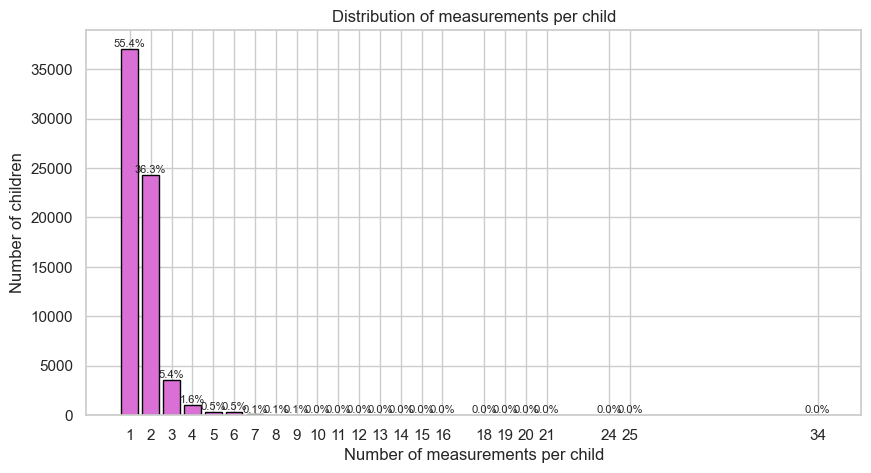

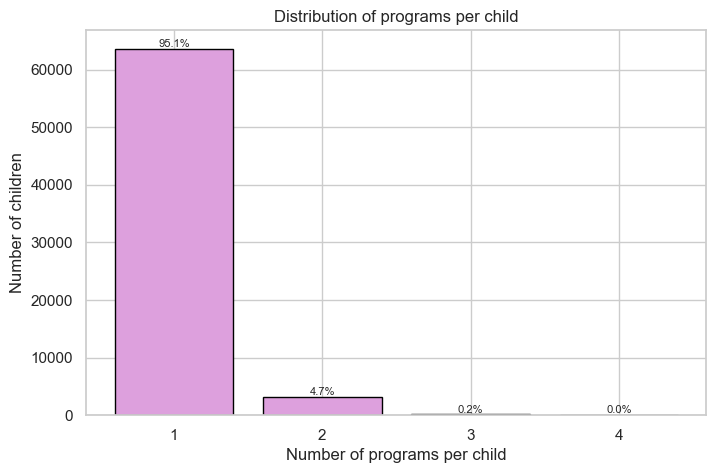

In [16]:
# הצגה ויזואלית

import matplotlib.pyplot as plt

# היסטוגרמה של מספר מדידות לילד
counts = child_counts["num_measurements"].value_counts().sort_index()
total = counts.sum()

plt.figure(figsize=(10,5))
bars = plt.bar(counts.index, counts.values, color="orchid", edgecolor="black")

plt.xticks(counts.index)
plt.xlabel("Number of measurements per child")
plt.ylabel("Number of children")
plt.title("Distribution of measurements per child")

for bar, value in zip(bars, counts.values):
    percent = 100 * value / total
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{percent:.1f}%", 
             ha='center', va='bottom', fontsize=8)

plt.show()


# היסטוגרמה של מספר תוכניות לכל ילד
counts_prog = programs_per_child["num_programs"].value_counts().sort_index()
total_prog = counts_prog.sum()

plt.figure(figsize=(8,5))
bars = plt.bar(counts_prog.index, counts_prog.values, color="plum", edgecolor="black")

plt.xticks(counts_prog.index)
plt.xlabel("Number of programs per child")
plt.ylabel("Number of children")
plt.title("Distribution of programs per child")

for bar, value in zip(bars, counts_prog.values):
    percent = 100 * value / total_prog
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{percent:.1f}%", 
             ha='center', va='bottom', fontsize=8)

plt.show()


#### 2. Keep only children with at least 2 measurements 

In [17]:
# --- חזרה לקובץ עבודה  ---
REVERT_PATH = "data/interim/participants_sep23_sep24_after_drop.csv"
import pandas as pd
df = pd.read_csv(REVERT_PATH, encoding="utf-8")
print("Reverted df from:", REVERT_PATH, "| Shape:", df.shape)


Reverted df from: data/interim/participants_sep23_sep24_after_drop.csv | Shape: (107300, 206)


In [18]:
# --- סינון ילדים עם לפחות 2 מדידות (ללא הורדת כפילויות) ---

# בדיקות מקדימות
assert "id_number" in df.columns, "חסרה העמודה 'id_number' לבדיקת מספר המדידות."

# צילום מצב לפני
df_before = df.copy()

# ספירת מדידות לכל ילד 
child_counts = df.groupby("id_number").size().reset_index(name="num_measurements")

# זיהוי ילדים עם 2+ מדידות
ids_min2 = child_counts.loc[child_counts["num_measurements"] >= 2, "id_number"]

# סינון בפועל 
df = df[df["id_number"].isin(ids_min2)].reset_index(drop=True)

# --- דוח לפני–אחרי ---
before_shape = df_before.shape
after_shape  = df.shape
before_kids  = df_before["id_number"].nunique()
after_kids   = df["id_number"].nunique()
removed_kids = before_kids - after_kids
removed_rows = before_shape[0] - after_shape[0]

print("=== Before–After (filter to 2+ measurements) ===")
print(f"Shape before: {before_shape} | Shape after: {after_shape}")
print(f"Unique children before: {before_kids} | after: {after_kids} | removed: {removed_kids}")
print(f"Rows removed: {removed_rows}")

# עמודות שנוספו/הוסרו
before_cols = set(df_before.columns)
after_cols  = set(df.columns)
removed_cols = sorted(list(before_cols - after_cols))
added_cols   = sorted(list(after_cols - before_cols))
print(f"Columns removed: {len(removed_cols)} -> {removed_cols}")
print(f"Columns added:   {len(added_cols)} -> {added_cols}")

# סיכום
diff_schema(df_before, df, title="Schema diff: after filtering to 2+ measurements")
quick_data_report(df, title="After filtering to 2+ measurements")
save_snapshot_df(df, "after_filter_min2")

# שמירה לקובץ ביניים 
from pathlib import Path
MIN2_PATH = "data/interim/participants_sep23_sep24_min2measures.csv"
Path(MIN2_PATH).parent.mkdir(parents=True, exist_ok=True)
df.to_csv(MIN2_PATH, index=False, encoding="utf-8")
print("Saved:", MIN2_PATH)


=== Before–After (filter to 2+ measurements) ===
Shape before: (107300, 206) | Shape after: (69802, 206)
Unique children before: 66955 | after: 29874 | removed: 37081
Rows removed: 37498
Columns removed: 0 -> []
Columns added:   0 -> []
=== Schema diff: after filtering to 2+ measurements ===
Empty DataFrame
Columns: [before, after, changed]
Index: []

=== After filtering to 2+ measurements ===
Shape: (69802, 206)

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69802 entries, 0 to 69801
Columns: 206 entries, ref_id_360 to parent_complexity
dtypes: bool(8), float64(5), int64(4), object(189)
memory usage: 106.0+ MB

-- Dtypes summary --
object     189
bool         8
float64      5
int64        4
Name: count, dtype: int64

-- Unique values per column (top 10) --
ref_id_360                60396
form_date                 56279
id_number                 29874
strength_domain            7822
service_location           2396
residence_neighborhood     1864
service_code             

## == Analyzing Measurement Duplicates and Time Gaps ==

=== Report: Number of measurements per child (no de-dup) ===
Total unique children (after filtering): 29874
Distribution (measurements -> children, percent):
2: 24287 children (81.3%)
3: 3602 children (12.1%)
4: 1055 children (3.5%)
5: 319 children (1.1%)
6: 358 children (1.2%)
7: 69 children (0.2%)
8: 50 children (0.2%)
9: 42 children (0.1%)
10: 20 children (0.1%)
11: 19 children (0.1%)
12: 22 children (0.1%)
13: 4 children (0.0%)
14: 7 children (0.0%)
15: 5 children (0.0%)
16: 5 children (0.0%)
18: 2 children (0.0%)
19: 1 children (0.0%)
20: 2 children (0.0%)
21: 2 children (0.0%)
24: 1 children (0.0%)
25: 1 children (0.0%)
34: 1 children (0.0%)


,Measurements,Children,Percent
0,2,24287,81.3
1,3,3602,12.1
2,4,1055,3.5
3,5,319,1.1
4,6,358,1.2
5,7,69,0.2
6,8,50,0.2
7,9,42,0.1
8,10,20,0.1
9,11,19,0.1


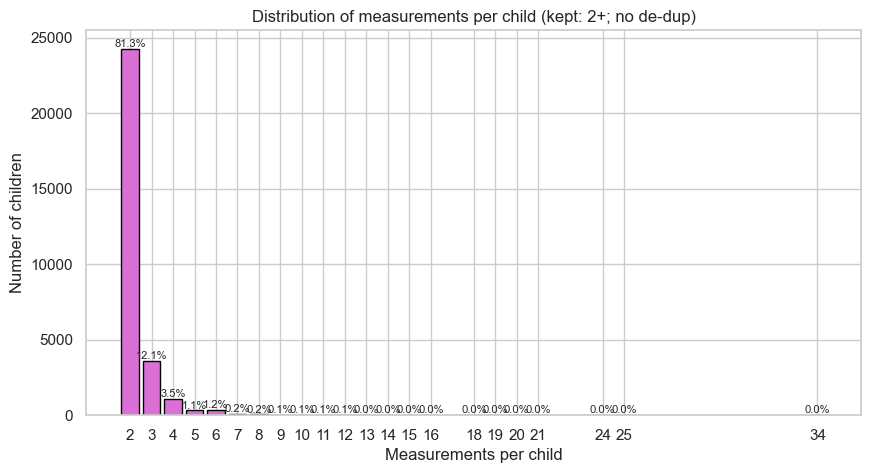

In [19]:
# ---  בדיקת מספר מדידות לכל ילד בקובץ המסונן ---

import pandas as pd
import matplotlib.pyplot as plt

dist = (df.groupby("id_number").size()
          .value_counts()
          .sort_index())
total_children = dist.sum()

# דוח קצר
print("=== Report: Number of measurements per child (no de-dup) ===")
print(f"Total unique children (after filtering): {total_children}")
print("Distribution (measurements -> children, percent):")
for k, v in dist.items():
    print(f"{k}: {v} children ({100*v/total_children:.1f}%)")

# התפלגויות בטבלה  
table = pd.DataFrame({
    "Measurements": dist.index,
    "Children": dist.values,
    "Percent": (dist.values / total_children * 100).round(1)
})
display(table)

# ויזואליזציה בגרף  
plt.figure(figsize=(10,5))
bars = plt.bar(dist.index, dist.values, color="orchid", edgecolor="black")
plt.xticks(dist.index)
plt.xlabel("Measurements per child")
plt.ylabel("Number of children")
plt.title("Distribution of measurements per child (kept: 2+; no de-dup)")

for bar, value in zip(bars, dist.values):
    pct = 100 * value / total_children
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{pct:.1f}%", ha="center", va="bottom", fontsize=8)

plt.show()


### Standardizing Date Formats (form_date, join_date, leave_date)

In [20]:
# ---  בדיקה ראשונית של עמודות שיש בהן תאריכים  ---

date_cols = ["form_date", "join_date", "leave_date"]

for col in date_cols:
    print(f"\n=== {col} ===")
    s = df[col].dropna().astype(str)
    print("דוגמאות ראשונות:", s.head(10).tolist())
    print("התפלגות אורכי מחרוזת (top-5):")
    print(s.str.len().value_counts().head())
    print("חסרים:", df[col].isna().sum(), "| לא-חסרים:", df[col].notna().sum())

# התפלגות סוגי התאריכים
for col in ["join_date", "leave_date"]:
    if col in df.columns:
        print(f"\n=== שכיחויות (top-5) – {col} ===")
        print(df[col].value_counts(dropna=True).head(5))



=== form_date ===
דוגמאות ראשונות: ['09/30/2024 22:15:35', '09/30/2024 16:52:41', '09/30/2024 16:46:54', '09/30/2024 15:21:46', '09/30/2024 15:21:46', '09/30/2024 13:31:17', '09/30/2024 12:55:52', '09/30/2024 12:55:52', '09/30/2024 11:53:43', '09/30/2024 11:34:26']
התפלגות אורכי מחרוזת (top-5):
form_date
19    44150
16    25652
Name: count, dtype: int64
חסרים: 0 | לא-חסרים: 69802

=== join_date ===
דוגמאות ראשונות: ['01/01/0001 00:00:00', '01/01/0001 00:00:00', '01/01/0001 00:00:00', '01/01/0001 00:00:00', '01/01/0001 00:00:00', '01/01/0001 00:00:00', '01/01/0001 00:00:00', '01/01/0001 00:00:00', '01/01/0001 00:00:00', '01/01/0001 00:00:00']
התפלגות אורכי מחרוזת (top-5):
join_date
19    69686
16      116
Name: count, dtype: int64
חסרים: 0 | לא-חסרים: 69802

=== leave_date ===
דוגמאות ראשונות: ['06/10/2017 07:20', '01/23/2017 14:20:18', '01/23/2017 14:20:18', '03/25/2018 13:47:25', '03/25/2018 13:47:25', '03/25/2018 13:47:25', '03/25/2018 13:47:25', '07/24/2018 08:34:12', '05/24/2018 1

In [21]:
# --- הורדת עמודות תאריך שאינן אינפורמטיביות ---

cols_to_drop = ["join_date", "leave_date"]  

df_before = df.copy()
before_shape = df_before.shape
before_cols  = set(df_before.columns)

existing = [c for c in cols_to_drop if c in df.columns]
df = df.drop(columns=existing, errors="ignore")

after_shape = df.shape
after_cols  = set(df.columns)

removed_cols = sorted(list(before_cols - after_cols))
added_cols   = sorted(list(after_cols - before_cols))

print("=== לפני–אחרי: הסרת עמודות תאריך לא-נדרשות ===")
print(f"צורה לפני: {before_shape} | צורה אחרי: {after_shape}")
print(f"Columns removed ({len(removed_cols)}): {removed_cols}")
print(f"Columns added   ({len(added_cols)}): {added_cols}")

# סיכום
diff_schema(df_before, df, title="Schema diff: after dropping non-needed date columns")
quick_data_report(df, title="After dropping non-needed date columns")
save_snapshot_df(df, "after_drop_non_needed_dates")


=== לפני–אחרי: הסרת עמודות תאריך לא-נדרשות ===
צורה לפני: (69802, 206) | צורה אחרי: (69802, 204)
Columns removed (2): ['join_date', 'leave_date']
Columns added   (0): []
=== Schema diff: after dropping non-needed date columns ===
            before after  changed
join_date   object   NaN     True
leave_date  object   NaN     True

=== After dropping non-needed date columns ===
Shape: (69802, 204)

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69802 entries, 0 to 69801
Columns: 204 entries, ref_id_360 to parent_complexity
dtypes: bool(8), float64(5), int64(4), object(187)
memory usage: 104.9+ MB

-- Dtypes summary --
object     187
bool         8
float64      5
int64        4
Name: count, dtype: int64

-- Unique values per column (top 10) --
ref_id_360                60396
form_date                 56279
id_number                 29874
strength_domain            7822
service_location           2396
residence_neighborhood     1864
service_code               1445
service_na

'artifacts\\20251015-162754_after_drop_non_needed_dates'

In [22]:
# ---  סטנדרטיזציה ובדיקת תקינות של תאריכים: ניקוי ואיחוד פורמטים ---

from pathlib import Path
import pandas as pd
import numpy as np
import re

# שמירת מצב קודם
df_before   = df.copy()
before_cols = set(df_before.columns)
before_shape = df_before.shape

COL = "form_date"
assert COL in df.columns, "חסרה העמודה form_date."

#  ניקוי של מחרוזות תאריך (רווחים, תווים נסתרים, מפרידים)
s = df[COL].astype(str)
s = (s.str.strip()
       .str.replace(r"\u200f|\u200e", "", regex=True)     # סימני RTL/LTR נסתרים
       .str.replace(r"[.\-]", "/", regex=True)            # מחליף . ו- - ל- /
       .str.replace(r"\s+", " ", regex=True)              # מרווחים מרובים → רווח יחיד
       .str.replace("T", " ", regex=False)                # ISO 'T' → רווח
       .str.replace(r"‏", "", regex=False))               # עוד סימן RTL נפוץ

# פונקציה למילוי ערכים לפי סדר עדיפות (coalesce)
def coalesce(series_list):
    out = None
    for ser in series_list:
        out = ser if out is None else out.fillna(ser)
    return out

# בדיקת אפשרויות שונות לביצוע המרה ובחירת האפשרות המועדפת
cand = {}

# ניסיונות אוטומטיים לזיהוי תאריכים ובדיקת אפשרויות של יום/חודש/שנה או חודש/יום/שנה
cand["אוטומטי_יום_קודם"]   = pd.to_datetime(s, errors="coerce", dayfirst=True,  infer_datetime_format=True)
cand["אוטומטי_חודש_קודם"]  = pd.to_datetime(s, errors="coerce", dayfirst=False, infer_datetime_format=True)

# בדיקת תאריכים בסגנון ישראלי (יום/חודש/שנה) עם '/' ועם/בלי שעה/שניות 
for name, fmt in [
    ("יום/חודש/שנה שעה:דקה:שניה", "%d/%m/%Y %H:%M:%S"),
    ("יום/חודש/שנה שעה:דקה",      "%d/%m/%Y %H:%M"),
    ("יום/חודש/שנה",              "%d/%m/%Y"),
    ("יום/חודש/שנה AMPM",         "%d/%m/%Y %I:%M %p"),
    ("יום/חודש/שנה קצר (שנתיים)", "%d/%m/%y %H:%M"),
]:
    cand[name] = pd.to_datetime(s, format=fmt, errors="coerce")

# בדיקת תאריכים בסגנון אמריקאי (חודש/יום/שנה)
for name, fmt in [
    ("חודש/יום/שנה שעה:דקה:שניה", "%m/%d/%Y %H:%M:%S"),
    ("חודש/יום/שנה שעה:דקה",      "%m/%d/%Y %H:%M"),
    ("חודש/יום/שנה",              "%m/%d/%Y"),
    ("חודש/יום/שנה AMPM",         "%m/%d/%Y %I:%M %p"),
    ("חודש/יום/שנה קצר (שנתיים)", "%m/%d/%y %H:%M"),
]:
    cand[name] = pd.to_datetime(s, format=fmt, errors="coerce")

# ISO זיהוי פורמט תאריך (יום-חודש-שנה)
cand["ISO_מלא"] = pd.to_datetime(df[COL], errors="coerce")

# טיפול במספר סריאלי של אקסל (מספרי ימים מאז 1899-12-30)
is_num = s.str.fullmatch(r"\d+(\.\d+)?", na=False)
cand["Excel_Serial"] = pd.to_datetime(pd.to_numeric(s.where(is_num), errors="coerce"),
                                      unit="D", origin="1899-12-30", errors="coerce")

# בחירת מועמד “הטוב ביותר” לפי ציון: כמה ערכים תקינים וגם בטווח סביר
min_ok, max_ok = pd.Timestamp("2023-09-01"), pd.Timestamp("2025-09-30")
def score(series):
    ok = series.notna()
    in_range = ok & (series >= min_ok) & (series <= max_ok)
    return in_range.sum() * 1_000_000 + ok.sum()  # משקל גבוה לערכים בטווח

best_key = max(cand, key=lambda k: score(cand[k]))
best_ser = cand[best_key]
print("=== בחירת ממיר מיטבי ===")
print(f"ממיר נבחר: {best_key}")
print(f"נמצאו תקינים בטווח: {( (best_ser.notna()) & (best_ser.between(min_ok, max_ok)) ).sum():,}")
print(f"סה\"כ תקינים: {best_ser.notna().sum():,} | NaT: {(len(best_ser)-best_ser.notna().sum()):,}")

# חיבור לפי סדרי עדיפויות- קודם המועמד הטוב, אח"כ שאר המועמדים לפי סדר
order_keys = [best_key] + [k for k in cand.keys() if k != best_key]
form_dt_new = coalesce([cand[k] for k in order_keys])

# יצירת עמודת תאריך חדשה ובדיקת השיפור בזיהוי התאריך
old_ok = df.get("form_dt").notna().sum() if "form_dt" in df.columns else 0
if "form_dt" in df.columns:
    df["form_dt"] = df["form_dt"].fillna(form_dt_new)
else:
    df["form_dt"] = form_dt_new

new_ok = df["form_dt"].notna().sum()
print("\n=== שיפור כיסוי ===")
print(f"תקינים קודם: {old_ok:,} | תקינים כעת: {new_ok:,} | שיפור: {new_ok-old_ok:,}")

df["form_day"]   = df["form_dt"].dt.normalize()
df["form_year"]  = df["form_dt"].dt.year
df["form_month"] = df["form_dt"].dt.month

#  בדיקה אם יש ערכים שעדיין לא זוהו כתאריך
bad = df.loc[df["form_dt"].isna(), COL].astype(str)
print("\n=== דגימה של ערכים שלא זוהו (עד 30) ===")
print(bad.drop_duplicates().head(30).to_list())

def patternize(x):
    # זיהוי דפוסים נוספים בקרב אלו שעדיין לא הומרו- אם עוד יש
    x = re.sub(r"\d", "9", x)
    x = re.sub(r"[A-Za-zא-ת]", "a", x)
    x = re.sub(r"\s+", " ", x.strip())
    return x

pat_counts = bad.map(patternize).value_counts().head(20)
print("\n=== 20 הדפוסים הנפוצים בין הערכים שלא זוהו ===")
print(pat_counts)

# השוואת מבנה לפני/אחרי ושמירה
after_cols  = set(df.columns)
added_cols  = sorted(list(after_cols - before_cols))
removed_cols = sorted(list(before_cols - after_cols))

print("\n=== שינויי מבנה נתונים ===")
print(f"צורה לפני: {before_shape} | צורה אחרי: {df.shape}")
print(f"עמודות שהוסרו ({len(removed_cols)}): {removed_cols}")
print(f"עמודות שנוספו ({len(added_cols)}): {added_cols}")

OUT_PATH = "data/interim/participants_sep23_sep24_after_formdate_fix.csv"
Path(OUT_PATH).parent.mkdir(parents=True, exist_ok=True)
df.to_csv(OUT_PATH, index=False, encoding="utf-8")
print("נשמר קובץ:", OUT_PATH)

#  סיכום 
parsed = df["form_dt"].notna().sum()
total  = len(df)
print("\n=== סיכום המרת תאריכים ===")
print(f"זוהו בהצלחה: {parsed}/{total} ({parsed/total:.1%})")
print(f"לא זוהו (NaT): {total-parsed}")
if parsed:
    print("טווח תאריכים:", df["form_dt"].min(), "עד", df["form_dt"].max())

# התפלגות לפי שנה-חודש (בקרה שאין חורים חריגים)
ym = (df.dropna(subset=["form_dt"])
        .assign(_ym=df["form_dt"].dt.to_period("M"))
        .groupby("_ym").size().reset_index(name="rows"))
ym["_ym"] = ym["_ym"].astype(str)
display(ym.head(12))


=== בחירת ממיר מיטבי ===
ממיר נבחר: אוטומטי_יום_קודם
נמצאו תקינים בטווח: 44,150
סה"כ תקינים: 44,150 | NaT: 25,652

=== שיפור כיסוי ===
תקינים קודם: 0 | תקינים כעת: 69,802 | שיפור: 69,802

=== דגימה של ערכים שלא זוהו (עד 30) ===
[]

=== 20 הדפוסים הנפוצים בין הערכים שלא זוהו ===
Series([], Name: count, dtype: int64)

=== שינויי מבנה נתונים ===
צורה לפני: (69802, 204) | צורה אחרי: (69802, 208)
עמודות שהוסרו (0): []
עמודות שנוספו (4): ['form_day', 'form_dt', 'form_month', 'form_year']
נשמר קובץ: data/interim/participants_sep23_sep24_after_formdate_fix.csv

=== סיכום המרת תאריכים ===
זוהו בהצלחה: 69802/69802 (100.0%)
לא זוהו (NaT): 0
טווח תאריכים: 2023-01-09 00:27:00 עד 2024-12-09 22:10:00


,_ym,rows
0,2023-01,208
1,2023-02,318
2,2023-03,400
3,2023-04,402
4,2023-05,500
5,2023-06,481
6,2023-07,597
7,2023-08,254
8,2023-09,681
9,2023-10,1239


### == Detection and Analysis of Form Duplicates and Time Gaps Between Measurements ==

In [23]:
# 1) זיהוי כפילויות באותו יום לאותו ילד (ללא מחיקה)

import pandas as pd
from pathlib import Path

# בדיקות מקדימות
assert "id_number"   in df.columns, "חסרה העמודה id_number."
assert "program_code" in df.columns, "חסרה העמודה program_code."
assert ("form_day" in df.columns) or ("form_dt" in df.columns) or ("form_date" in df.columns), "חסרה עמודת תאריך."

# צילום מצב לפני
df_before   = df.copy()
before_cols = set(df_before.columns)
before_shape = df_before.shape

# נרמול תאריך- יצירת עמודת יום סטנדרטית כתאריך בלי שעה 
if "form_day" not in df.columns:
    if "form_dt" in df.columns:
        df["form_dt"] = pd.to_datetime(df["form_dt"], errors="coerce")
        df["form_day"] = df["form_dt"].dt.normalize()
    else:
        df["form_date"] = pd.to_datetime(df["form_date"], errors="coerce")
        df["form_day"]  = df["form_date"].dt.normalize()

# מיון לפי: תאריך -> ילד -> יישוב -> קוד תוכנית
sort_keys = [k for k in ["form_day", "id_number", "yeshuv_name", "program_code"] if k in df.columns]
df = df.sort_values(sort_keys, kind="mergesort").reset_index(drop=True)

#   ספירת טפסים זהים באותו יום לאותה קבוצה ילד–יישוב–קוד    
group_keys = [k for k in ["id_number", "form_day", "yeshuv_name", "program_code"] if k in df.columns]
df["forms_same_day"] = df.groupby(group_keys)["id_number"].transform("size").astype("Int64")

# סימון רשומה ראשונה ורשומות כפולות באותה הקבוצה 
df["is_primary"]   = df.groupby(group_keys).cumcount().eq(0).astype("Int64")     # 1 = הראשונה בקבוצה
df["is_duplicate"] = (df["forms_same_day"].gt(1) & df["is_primary"].eq(0)).astype("Int64")

# דוח לפני–אחרי: עמודות שנוספו/הוסרו 
after_cols  = set(df.columns)
added_cols  = sorted(list(after_cols - before_cols))
removed_cols = sorted(list(before_cols - after_cols))

print("=== לפני–אחרי: איתור כפילויות ===")
print(f"צורה לפני: {before_shape} | צורה אחרי: {df.shape} (ללא שינוי שורות)")
print(f"עמודות שנוספו ({len(added_cols)}): {added_cols}")
print(f"עמודות שהוסרו ({len(removed_cols)}): {removed_cols}")

# דו"ח קצר על הכפילויות
total = len(df)
dup_recs = int((df["forms_same_day"] > 1).sum())
print("\n=== דו\"ח כפילויות באותו יום ===")
print(f"סה\"כ רשומות: {total:,}")
print(f"רשומות בקבוצות כפולות (2+ באותו יום): {dup_recs:,} ({dup_recs/total:.1%})")
print(f"מס' ילדים ייחודיים: {df['id_number'].nunique():,}")

# שמירה לקובץ ייעודי לשלב הכפילויות
DUP_PATH = "data/interim/participants_sep23_sep24_duplicates_analysis.csv"
Path(DUP_PATH).parent.mkdir(parents=True, exist_ok=True)
df.to_csv(DUP_PATH, index=False, encoding="utf-8")
print("\nנשמר קובץ ניתוח כפילויות:", DUP_PATH)

# סיכום
diff_schema(df_before, df, title="השוואת סכימה: לאחר הוספת שדות כפילויות")
quick_data_report(df, title="מצב אחרי הוספת שדות כפילויות (ללא מחיקה)")
save_snapshot_df(df, "after_dup_fields_added")


=== לפני–אחרי: איתור כפילויות ===
צורה לפני: (69802, 208) | צורה אחרי: (69802, 211) (ללא שינוי שורות)
עמודות שנוספו (3): ['forms_same_day', 'is_duplicate', 'is_primary']
עמודות שהוסרו (0): []

=== דו"ח כפילויות באותו יום ===
סה"כ רשומות: 69,802
רשומות בקבוצות כפולות (2+ באותו יום): 16,280 (23.3%)
מס' ילדים ייחודיים: 29,874

נשמר קובץ ניתוח כפילויות: data/interim/participants_sep23_sep24_duplicates_analysis.csv
=== השוואת סכימה: לאחר הוספת שדות כפילויות ===
               before  after  changed
forms_same_day    NaN  Int64     True
is_duplicate      NaN  Int64     True
is_primary        NaN  Int64     True

=== מצב אחרי הוספת שדות כפילויות (ללא מחיקה) ===
Shape: (69802, 211)

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69802 entries, 0 to 69801
Columns: 211 entries, ref_id_360 to is_duplicate
dtypes: Int64(3), bool(8), datetime64[ns](2), float64(5), int32(2), int64(4), object(187)
memory usage: 108.3+ MB

-- Dtypes summary --
object            187
bool                8


'artifacts\\20251015-162805_after_dup_fields_added'

,מספר טפסים ביום-לילד-יישוב-קוד,מספר רשומות,אחוז מהרשומות
0,2,4316,68.2
1,3,1368,21.6
2,4,327,5.2
3,5,52,0.8
4,6,171,2.7
5,7,17,0.3
6,8,32,0.5
7,9,20,0.3
8,10,3,0.0
9,12,15,0.2


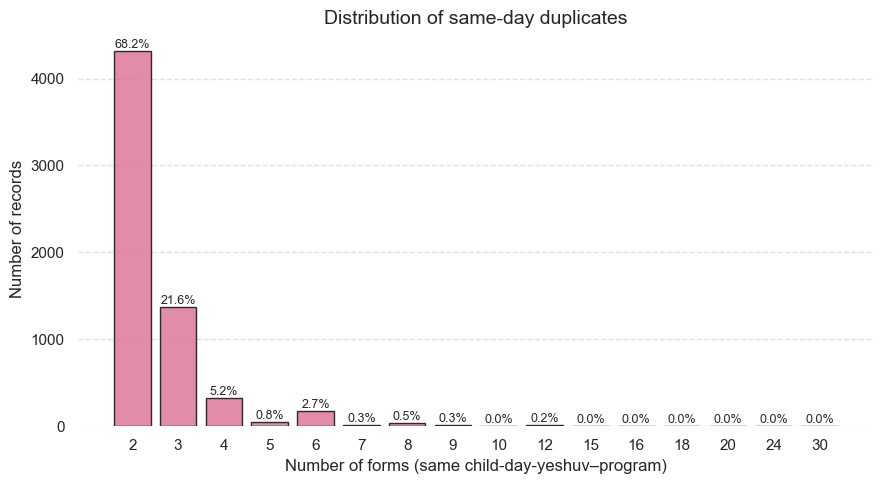

In [24]:
# 2) (מיפוי טפסים כפולים שמולאו באותו יום עבור אותו ילד–יישוב–קוד (ללא מחיקה עדיין

import matplotlib.pyplot as plt
import pandas as pd

#  מיפוי מספר הטפסים בכל שילוב ילד–יום–יישוב–קוד
group_keys = [k for k in ["id_number", "form_day", "yeshuv_name", "program_code"] if k in df.columns]
dup_group_sizes = (
    df.loc[df["forms_same_day"].gt(1), group_keys]
      .value_counts()
      .reset_index(name="n_forms")
      .groupby("n_forms").size().sort_index()
)

if dup_group_sizes.empty:
    print("לא נמצאו כפילויות באותו יום.")
else:
    total_records = dup_group_sizes.sum()


    # --- טבלה ---
    table = pd.DataFrame({
        "מספר טפסים ביום-לילד-יישוב-קוד": dup_group_sizes.index,
        "מספר רשומות": dup_group_sizes.values,
        "אחוז מהרשומות": (dup_group_sizes.values/total_records*100).round(1)
    })
    display(table)

    # --- גרף  ---
    plt.figure(figsize=(9,5))
    bars = plt.bar(dup_group_sizes.index.astype(str), dup_group_sizes.values,
                   color="#DB7093", edgecolor="black", alpha=0.8)
    plt.grid(False)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.box(False)
    plt.xlabel("Number of forms (same child-day-yeshuv–program)")
    plt.ylabel("Number of records")
    plt.title("Distribution of same-day duplicates", fontsize=14)

    for b, v in zip(bars, dup_group_sizes.values):
        pct = 100*v/total_records
        plt.text(b.get_x()+b.get_width()/2, b.get_height(), f"{pct:.1f}%",
                 ha="center", va="bottom", fontsize=9)

    plt.tight_layout()
    plt.show()


=== לפני–אחרי: פערי זמן לילד ===
צורה לפני: (69,802, 211) | צורה אחרי: (69,802, 213)
עמודות שנוספו (2): ['days_diff_child', 'gap_bucket_child']
עמודות שהוסרו (0): []


,Range,Count,Percent
0,Negative (error),0,0.0
1,Same day (0),10049,14.4
2,1–90 days,7133,10.2
3,91–180 days,11509,16.5
4,181–365 days,9797,14.0
5,>365 days,1440,2.1
6,NaN,29874,42.8


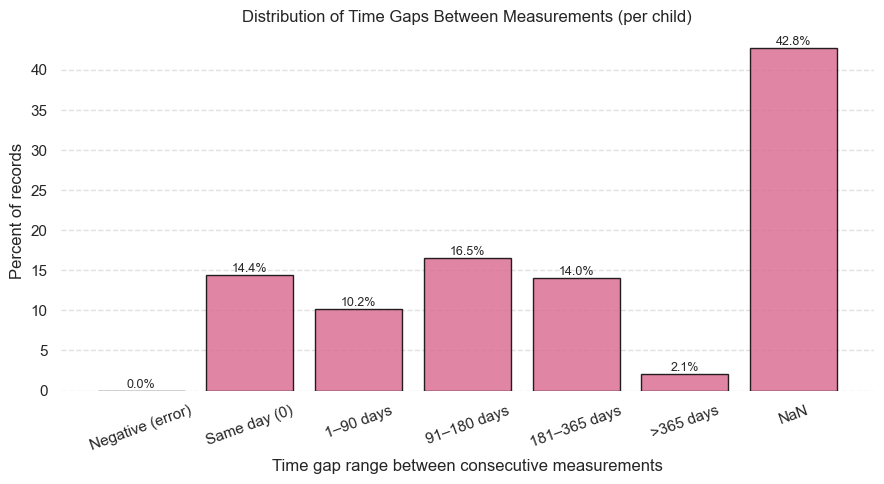

In [25]:
# 3) חישוב פערי זמן בין טפסים עוקבים של אותו ילד 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# צילום מצב לפני
before_cols, rows_before, cols_before = snapshot_cols(df)

# נרמול עמודת תאריך בסיסית 
if "form_day" in df.columns:
    df["form_day"] = pd.to_datetime(df["form_day"], errors="coerce")
elif "form_dt" in df.columns:
    df["form_dt"] = pd.to_datetime(df["form_dt"], errors="coerce")
    df["form_day"] = df["form_dt"].dt.normalize()
elif "form_date" in df.columns:
    df["form_date"] = pd.to_datetime(df["form_date"], errors="coerce")
    df["form_day"]  = df["form_date"].dt.normalize()
else:
    raise AssertionError("חסרה עמודת תאריך (form_day / form_dt / form_date).")

#  בדיקה כמה לא הומרו לתאריך
bad_dates = df["form_day"].isna().sum()
if bad_dates:
    print(f"{bad_dates:,} רשומות עם תאריך לא תקין (NaT) אחרי ההמרה.")

# מיון לפי מזהה ילד ואז לפי תאריך כדי שההפרשים יחושבו נכון- לפני חישוב ההפרש
sort_keys = [k for k in ["id_number", "form_day", "yeshuv_name", "program_code"] if k in df.columns]
df = df.sort_values(sort_keys, kind="mergesort").reset_index(drop=True)

# days_diff_child – חישוב פער הימים לטופס הקודם עבור אותו ילד
df["days_diff_child"] = df.groupby("id_number")["form_day"].diff().dt.days

# gap_bucket_child – סיווג לפי טווחים 
bins_en   = [-10_000, -1, 0, 90, 180, 365, 10_000]
labels_en = ["Negative (error)", "Same day (0)", "1–90 days", "91–180 days", "181–365 days", ">365 days"]
cat_type  = pd.api.types.CategoricalDtype(categories=labels_en, ordered=True)

df["gap_bucket_child"] = pd.cut(df["days_diff_child"], bins=bins_en, labels=labels_en).astype(cat_type)

# דוח לפני–אחרי (כמה עמודות נוספו ואילו)
after_cols, rows_after, cols_after = snapshot_cols(df)
report_changes("פערי זמן לילד", before_cols, after_cols, rows_before, rows_after)

# טבלה מסכמת
counts = df["gap_bucket_child"].value_counts(dropna=False)
order_idx = pd.CategoricalIndex(labels_en, ordered=True)
counts_ord = counts.reindex(order_idx, fill_value=0)
na_cnt = counts.loc[pd.isna(counts.index)].sum() if counts.index.isna().any() else 0

summary = counts_ord.reset_index()
summary.columns = ["Range", "Count"]
if na_cnt:
    summary = pd.concat([summary, pd.DataFrame([{"Range": "NaN", "Count": int(na_cnt)}])], ignore_index=True)
summary["Percent"] = (summary["Count"] / summary["Count"].sum() * 100).round(1)

display(summary)

# גרף עמודות
plt.figure(figsize=(9,5))
x_labels = summary["Range"].astype(str)
bars = plt.bar(x_labels, summary["Percent"], color="#DB7093", edgecolor="black", alpha=0.85)
plt.grid(False); plt.grid(axis="y", linestyle="--", alpha=0.6); plt.box(False)
plt.xlabel("Time gap range between consecutive measurements")
plt.ylabel("Percent of records")
plt.title("Distribution of Time Gaps Between Measurements (per child)")
for rect, val in zip(bars, summary["Percent"]):
    plt.text(rect.get_x() + rect.get_width()/2, val, f"{val:.1f}%", ha="center", va="bottom", fontsize=9)
plt.xticks(rotation=20); plt.tight_layout(); plt.show()



In [26]:
# ---  בשל אחוז חסרים גבוה - פירוק מספר החסרים לפי סיבה  ---
import pandas as pd
is_first_row = df.sort_values(["id_number","form_day"]) \
                 .groupby("id_number").cumcount()==0

reason_first   = (is_first_row & df["days_diff_child"].isna()).sum()
reason_missing = df["form_day"].isna().sum()   # שורות בלי תאריך בכלל
total_nan      = df["days_diff_child"].isna().sum()

print("סה\"כ NaN ב-days_diff_child:", total_nan)
print("מתוכן – שורה ראשונה לכל ילד:", reason_first)
print("מתוכן – תאריך חסר/לא תקין:", reason_missing)
print("שאר הסיבות (אם יש):", total_nan - reason_first - reason_missing)


סה"כ NaN ב-days_diff_child: 29874
מתוכן – שורה ראשונה לכל ילד: 29874
מתוכן – תאריך חסר/לא תקין: 0
שאר הסיבות (אם יש): 0


In [27]:
#  מסקנה- החסרים נובעים מכך שאין פער לכל המדידות הראשונות עם מדידות אחרות. הפער מחושב מהרשומה השנייה והלאה לכל ילד.
#   לרשומה הראשונה אין "טופס קודם" להשוות אליו — לכן הפער שלה הוא חסר

### Building the RS/RI Form Completeness Indicator

In [28]:
# -בניית מדד שלמות מילוי מצבי הסיכון 1-28
import re
import pandas as pd

# צילום מצב לפני לצורך השוואה בסוף
before_cols, rows_before, cols_before = snapshot_cols(df)

# זיהוי עמודות של מצבי הסיכון (rs/ri 1–28)
pat = re.compile(r"^(rs|ri)\s*_*\s*0*([0-9]{1,2})(?=\D|$)", flags=re.IGNORECASE)
matches = []
for col in df.columns:
    m = pat.match(str(col))
    if m:
        num = int(m.group(2))
        if 1 <= num <= 28:
            matches.append((col, num))
if not matches:
    raise ValueError("לא נמצאו עמודות של מצבי סיכון 1–28. בדקי את שמות העמודות.")

# מאחדים לפי מספר פריט: 'מולא' אם לפחות אחת העמודות של אותו מספר לא חסרה
by_item = {}
for col, num in matches:
    by_item.setdefault(num, []).append(col)

items_matrix = pd.DataFrame(
    {k: df[v].notna().any(axis=1) for k, v in sorted(by_item.items())},
    index=df.index
)

# טבלה 1: שיעור וכמות מילוי לכל אחד מ- 28  הפריטים
n_forms = len(items_matrix)
fills_per_item = items_matrix.sum(axis=0).astype(int)
rate_per_item  = (fills_per_item / n_forms * 100).round(1)
item_summary = (
    pd.DataFrame({
        "מצב סיכון": [f"{i:02d}" for i in items_matrix.columns],
        "כמה טפסים מילאו": fills_per_item.values,
        "שיעור מילוי באחוזים": rate_per_item.values
    })
    .sort_values("מצב סיכון", key=lambda s: s.astype(int))
    .reset_index(drop=True)
)
print("טבלה 1: שיעורי מילוי לכל פריט סיכון (מתוך 28)")
display(item_summary)

#    (0-28) טבלה 2: התפלגות מספר הפריטים שמולאו בכל טופס
filled_count_per_form = items_matrix.sum(axis=1).astype(int)
dist_forms = (
    filled_count_per_form.value_counts()
    .rename_axis("כמה פריטים מולאו בטופס")
    .reset_index(name="כמה טפסים")
    .sort_values("כמה פריטים מולאו בטופס", ascending=False)
)
dist_forms["שיעור מכלל הטפסים"] = (dist_forms["כמה טפסים"] / n_forms * 100).round(1)
print("\nטבלה 2: התפלגות מספר מצבי הסיכון שמולאו בכל טופס")
display(dist_forms)

# === יצירת שתי עמודות חדשות- מדד שלמות הטופס  ===
df["rs_items_answered"] = filled_count_per_form                       
df["rs_completion_pct"] = (filled_count_per_form / items_matrix.shape[1] * 100).round(1)
if "ציון מילוי כולל" in df.columns:
    df.drop(columns=["ציון מילוי כולל"], inplace=True)

# דו"ח לפני–אחרי
after_cols, rows_after, cols_after = snapshot_cols(df)
report_changes("RS/RI — הוספת rs_items_answered + rs_completion_pct", 
               before_cols, after_cols, rows_before, rows_after)

# שמירה לקבצים
item_summary.to_csv(INTERIM / "rsri_item_completion_summary.csv", index=False, encoding="utf-8-sig")
dist_forms.to_csv(INTERIM / "rsri_form_completion_distribution.csv", index=False, encoding="utf-8-sig")
df.to_pickle(PROCESSED / "participants_after_rsri_completion.pkl")
print("נשמרו: טבלה לפריטים, טבלה להתפלגות, וקובץ Pickle מהיר.")


טבלה 1: שיעורי מילוי לכל פריט סיכון (מתוך 28)


,מצב סיכון,כמה טפסים מילאו,שיעור מילוי באחוזים
0,01,69790,100.0
1,02,69790,100.0
2,03,69790,100.0
3,04,69790,100.0
4,05,69790,100.0
5,06,69790,100.0
6,07,69790,100.0
7,08,69790,100.0
8,09,69790,100.0
9,10,69790,100.0



טבלה 2: התפלגות מספר מצבי הסיכון שמולאו בכל טופס


,כמה פריטים מולאו בטופס,כמה טפסים,שיעור מכלל הטפסים
0,28,36136,51.8
2,25,3429,4.9
1,24,30225,43.3
3,0,12,0.0


=== לפני–אחרי: RS/RI — הוספת rs_items_answered + rs_completion_pct ===
צורה לפני: (69,802, 213) | צורה אחרי: (69,802, 215)
עמודות שנוספו (2): ['rs_completion_pct', 'rs_items_answered']
עמודות שהוסרו (0): []
נשמרו: טבלה לפריטים, טבלה להתפלגות, וקובץ Pickle מהיר.


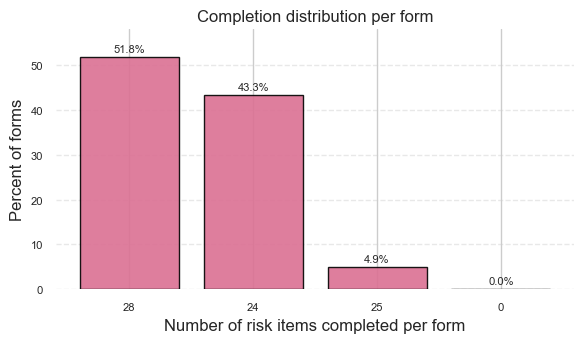

In [29]:
# === Compact bar chart for Table 2 (English axes) ===
import matplotlib.pyplot as plt

dist_sorted = dist_forms.sort_values("שיעור מכלל הטפסים", ascending=False).reset_index(drop=True)

x = dist_sorted["כמה פריטים מולאו בטופס"].astype(str)
y = dist_sorted["שיעור מכלל הטפסים"]

plt.figure(figsize=(6, 3.6))  # קטן יותר משמעותית
bars = plt.bar(x, y, color="#DB7093", edgecolor="black", alpha=0.9)

plt.xlabel("Number of risk items completed per form")
plt.ylabel("Percent of forms")
plt.title("Completion distribution per form", fontsize=12)

# תוויות אחוז על העמודות
y_max = max(y) if len(y) else 0
for rect, val in zip(bars, y):
    plt.text(rect.get_x() + rect.get_width()/2, val + (y_max*0.015 if y_max else 0.5),
             f"{val:.1f}%", ha="center", va="bottom", fontsize=8)

plt.ylim(0, y_max * 1.12 if y_max else 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.45)
plt.box(False)
plt.tight_layout()
plt.show()


# === שמירת פלטים לקבצים ===
item_summary.to_csv(INTERIM / "rsri_item_completion_summary.csv", index=False, encoding="utf-8-sig")
dist_forms.to_csv(INTERIM / "rsri_form_completion_distribution.csv", index=False, encoding="utf-8-sig")



In [30]:
print("Current shape:", df.shape)
print("First columns:", df.columns[:10].to_list())
print("Sample dates:", df["form_dt"].dropna().head(3).to_list())


Current shape: (69802, 215)
First columns: ['ref_id_360', 'form_type', 'form_version', 'form_date', 'form_filler_role', 'yeshuv_code', 'yeshuv_name', 'machoz', 'institution_type', 'institution_code']
Sample dates: [Timestamp('2023-12-28 13:53:32'), Timestamp('2024-02-06 17:31:00'), Timestamp('2024-06-16 14:38:02')]


In [31]:
# יצירת עותק חדש
merg = df.copy()

# שמירה כקובץ חדש
out_path = "data/interim/participants_sep23_sep24_merg.csv"
Path("data/interim").mkdir(parents=True, exist_ok=True)
merg.to_csv(out_path, index=False, encoding="utf-8")

print("Saved new file:", out_path)
print("merg shape:", merg.shape)


Saved new file: data/interim/participants_sep23_sep24_merg.csv
merg shape: (69802, 215)


### Merging Forms into Paired Measurements

In [32]:
import pandas as pd

# --- קריאת הקובץ עם ניתוח הכפילויות ---
df = pd.read_csv(
    "data/interim/participants_sep23_sep24_duplicates_analysis.csv",
    parse_dates=["form_dt"]  # חשוב: טעינה כ-datetime
)

# --- בדיקות מהירות ---
print("Shape:", df.shape)
print("Dtype of form_dt:", df["form_dt"].dtype)  # צריך להיות datetime64[ns]

# --- כמה ילדים ייחודיים ---
n_children = df["id_number"].nunique()
print(f"\n[Children] Unique children: {n_children:,}")

# --- כמה ילדים עם יותר מטופס אחד בכלל (לאו דווקא באותו יום) ---
children_counts = df.groupby("id_number").size()
n_children_multi_any = (children_counts > 1).sum()
print(f"[Children] With 2+ forms (any dates): {n_children_multi_any:,} ({n_children_multi_any/n_children:.1%})")

# --- כמה שורות שייכות לקבוצות של 'אותו יום' (forms_same_day >= 2) ---
same_day_rows = df[df["forms_same_day"].fillna(0) >= 2]
n_rows_in_same_day_groups = same_day_rows.shape[0]
print(f"\n[Same-day] Rows in same-day groups: {n_rows_in_same_day_groups:,} ({n_rows_in_same_day_groups/len(df):.1%})")

# --- כמה ילדים שיש להם לפחות יום אחד עם כפילות (forms_same_day >= 2) ---
n_children_with_same_day_dup = same_day_rows["id_number"].nunique()
print(f"[Same-day] Children with ≥1 duplicated day: {n_children_with_same_day_dup:,} ({n_children_with_same_day_dup/n_children:.1%})")

# --- התפלגות גודל הקבוצה 'באותו יום' (כמה טפסים באותו ילד-מענה-יישוב-יום) ---
same_day_size_dist = (df["forms_same_day"]
                      .dropna()
                      .astype(int)
                      .value_counts()
                      .sort_index())
print("\n[Same-day] Distribution of forms per child-service-yeshuv-day:")
print(same_day_size_dist.to_string())

# --- מדגם קטן להצגה (בדיקה ידנית) ---
print("\n[Sample] Random 5 rows:")
display(df[["id_number","yeshuv_code","service_code","form_dt",
            "forms_same_day","is_duplicate","is_primary"]].sample(5, random_state=42))


Shape: (69802, 211)
Dtype of form_dt: datetime64[ns]

[Children] Unique children: 29,874
[Children] With 2+ forms (any dates): 29,874 (100.0%)

[Same-day] Rows in same-day groups: 16,280 (23.3%)
[Same-day] Children with ≥1 duplicated day: 5,479 (18.3%)

[Same-day] Distribution of forms per child-service-yeshuv-day:
forms_same_day
1     53522
2      8632
3      4104
4      1308
5       260
6      1026
7       119
8       256
9       180
10       30
12      180
15       45
16       48
18       18
20       20
24       24
30       30

[Sample] Random 5 rows:


,id_number,yeshuv_code,service_code,form_dt,forms_same_day,is_duplicate,is_primary
52456,40792146e54cb4aa3336781bd97cd6f65830f7fae51243...,8380,2220154-003020,2024-06-24 11:25:15,1,0,1
20290,cd2897718805894a93c2105e5165d21e5224a13e468aed...,5800,2220118-004226,2023-12-30 18:10:17,1,0,1
46206,c75fd4e69b7f99bfea91da461b5c067ca281ae1974c22d...,8420,122600506-001903,2024-05-31 09:28:31,1,0,1
27252,a3248d5c54007454447e250af315f83a7dcea37b5ea519...,3200,2230029-000628,2024-01-30 11:23:02,1,0,1
5929,eb8519d775997f43539ba36d5d92ed3ceda9ee55f67558...,8730,2210267-002149,2023-11-13 10:04:32,1,0,1


In [33]:

# בדיקות מוקדמות וקביעת משתני מפתח
import pandas as pd
import numpy as np
import re
from pathlib import Path
from pandas.api.types import is_datetime64_any_dtype as is_dt

def banner(title):
    print("\n" + "="*12, title, "="*12)

banner("שלב 0 • בדיקות מוקדמות")

# נוודא שהדאטה קיים והעמודות קריטיות קיימות
req_cols = ["id_number", "service_code", "form_dt"]
missing = [c for c in req_cols if c not in df.columns]
assert not missing, f"חסרות עמודות חובה: {missing}"

# אם יש גם yeshuv_code נשתמש בו במפתח; אם חסר – נרוץ בלעדיו
key_cols = [c for c in ["id_number", "service_code", "yeshuv_code"] if c in df.columns]

print("Shape:", df.shape)
print("Key columns:", key_cols)
print("form_dt dtype:", df["form_dt"].dtype)

# לוודא ש-form_dt באמת datetime
if not is_dt(df["form_dt"]):
    df["form_dt"] = pd.to_datetime(df["form_dt"], errors="coerce")

print("Missing form_dt (NaT):", df["form_dt"].isna().sum())



============ שלב 0 • בדיקות מוקדמות ============
Shape: (69802, 211)
Key columns: ['id_number', 'service_code', 'yeshuv_code']
form_dt dtype: datetime64[ns]
Missing form_dt (NaT): 0


In [34]:
import pandas as pd
import numpy as np
import re

# שלב 1: בחירת "טופס ראשי" לכל ילד–מענה–יישוב–יום
# קריטריונים: שלמות פריטי סיכון -> שעה מאוחרת יותר -> שובר שוויון ע"פ אינדקס
# =========================================

import pandas as pd
import numpy as np
import re
from pandas.api.types import is_datetime64_any_dtype as is_dt
import matplotlib.pyplot as plt

def banner(txt):
    print("\n" + "="*10 + " " + txt + " " + "="*10)

# בדיקות מהירות
banner("שלב 0 • בדיקות מהירות")
דרושות = ["id_number", "service_code", "form_dt"]
חסרות = [c for c in דרושות if c not in df.columns]
assert not חסרות, f"חסרות עמודות חובה: {חסרות}"

if not is_dt(df["form_dt"]):
    df["form_dt"] = pd.to_datetime(df["form_dt"], errors="coerce")

key_cols = [c for c in ["id_number", "service_code", "yeshuv_code"] if c in df.columns]
print("גודל הדאטה:", df.shape)
print("טיפוס form_dt:", df["form_dt"].dtype)
print("מפתח קיבוץ:", key_cols)

# 1) מדד שלמות: כמה מתוך פריטי הסיכון מולאו (rs/ri 1–28)
pat = re.compile(r"^(rs|ri)\s*_*\s*0*([0-9]{1,2})(?=\D|$)", flags=re.IGNORECASE)
risk_cols = [c for c in df.columns if (m:=pat.match(str(c))) and 1 <= int(m.group(2)) <= 28]
df = df.copy()
df["_risk_complete"] = df[risk_cols].notna().sum(axis=1) if risk_cols else 0

# 2) "יצירת עמודת תאריך-יום (ללא שעה) לזיהוי "אותו יום
df["_day"] = df["form_dt"].dt.normalize()

# 3) סדר עדיפויות בתוך היום: שלמות גבוהה יותר → שעה מאוחרת יותר → שובר שוויון טכני (סדר שורה)
df["_row_order"] = np.arange(len(df))
df = df.sort_values(
    by=key_cols + ["_day", "_risk_complete", "form_dt", "_row_order"],
    ascending=[True]*len(key_cols) + [True, False, False, False]
)

# 4) סימון הטופס הראשי (הראשון בדירוג לכל צירוף ילד–מענה–יישוב–יום)
df["_rank_in_day"] = df.groupby(key_cols + ["_day"]).cumcount()
df["is_primary_same_day"] = (df["_rank_in_day"] == 0).astype(int)

# 5) שמירת שורה אחת ליום: הטופס הראשי בלבד
df_day_primary = df.loc[df["is_primary_same_day"] == 1].copy()

# --- דוח קצר ---
banner("סיכום שלב בחירת טופס ראשי")
שורות_לפני = len(df)
שורות_אחרי = len(df_day_primary)
ימי_כפל = (df.groupby(key_cols + ["_day"]).size() > 1).sum()
print(f"- מספר שורות לפני הסינון: {שורות_לפני:,}")
print(f"- מספר שורות אחרי הסינון: {שורות_אחרי:,}")
print(f"- ירידה במספר השורות (כפילויות שהוסרו): {שורות_לפני - שורות_אחרי:,}")
print(f"- מספר ימים שבהם נמצאו כמה טפסים לאותו ילד–מענה–יישוב: {ימי_כפל:,}")
print("- מסקנה: כעת קיימת שורה 'ראשית' אחת בלבד לכל ילד–מענה–יישוב בכל יום.")



========== שלב 0 • בדיקות מהירות ==========
גודל הדאטה: (69802, 211)
טיפוס form_dt: datetime64[ns]
מפתח קיבוץ: ['id_number', 'service_code', 'yeshuv_code']

========== סיכום שלב בחירת טופס ראשי ==========
- מספר שורות לפני הסינון: 69,802
- מספר שורות אחרי הסינון: 59,857
- ירידה במספר השורות (כפילויות שהוסרו): 9,945
- מספר ימים שבהם נמצאו כמה טפסים לאותו ילד–מענה–יישוב: 6,327
- מסקנה: כעת קיימת שורה 'ראשית' אחת בלבד לכל ילד–מענה–יישוב בכל יום.


In [35]:
# --- כמה פעמים הכרענו בגלל שלמות, כמה בגלל שעה, וכמה בגלל שוויון טכני ---

# --- ניתוח: למה טופס מסוים נבחר כיום "ראשי" (ימים עם כפילויות בלבד) ---

banner("ניתוח • למה טופס מסוים נבחר כיום 'ראשי'")

# קיבוץ לפי ילד–מענה–יישוב–יום
grp = df.groupby(key_cols + ["_day"])

# רק ימים שבהם קיימת כפילות
dup_days_idx = grp.size()[grp.size() > 1].index
mask_dup_days = df.set_index(key_cols + ["_day"]).index.isin(dup_days_idx)
df_dups = df.loc[mask_dup_days].copy()

# פונקציה לקביעת "סיבת הבחירה"
# קדימות: שיעורי מילוי גבוהים יותר → שעה מאוחרת יותר → שוויון מלא (הכרעה טכנית)
def reason_for_choice(g):
    g = g.sort_values(by=["_risk_complete","form_dt","_row_order"], ascending=[False, False, False])
    diff_fill = g["_risk_complete"].max() - g["_risk_complete"].min()
    diff_time = (g["form_dt"].max() - g["form_dt"].min()).total_seconds()
    if diff_fill > 0:
        return "שיעורי מילוי גבוהים יותר"
    elif diff_time > 0:
        return "שעה מאוחרת יותר"
    else:
        return "שוויון מלא (הכרעה טכנית)"

# חישוב הסיבה לכל יום עם כפילות
reasons = df_dups.groupby(key_cols + ["_day"]).apply(reason_for_choice)

# טבלת ספירה ואחוזים
reasons_count = (
    reasons.value_counts()
    .rename_axis("סיבת בחירה")
    .reset_index(name="מספר ימים")
    .assign(אחוז=lambda d: (d["מספר ימים"] / d["מספר ימים"].sum() * 100).round(1))
)

# הצגה נעימה עם Styler
styled = (reasons_count
          .style
          .set_caption("סיבות בחירה בטופס ראשי (רק ימים עם כפילויות)")
          .format({"אחוז": "{:.1f}%"})
          .bar(subset=["אחוז"], color="#ffd1dc")  # פס צבע עדין לפי אחוז
          .hide(axis="index")
          .set_table_styles([
              {"selector": "caption",
               "props": [("text-align", "center"),
                         ("font-weight", "bold"),
                         ("font-size", "14px")]}
          ])
         )
display(styled)



========== ניתוח • למה טופס מסוים נבחר כיום 'ראשי' ==========


סיבת בחירה,מספר ימים,אחוז
שוויון מלא (הכרעה טכנית),5692,90.0%
שיעורי מילוי גבוהים יותר,436,6.9%
שעה מאוחרת יותר,199,3.1%


In [36]:
# ---  DF_daydedup בחירת טופס "ראשי" לכל יום ומפתח ---

import pandas as pd


if 'banner' not in globals():
    def banner(msg): 
        print("\n" + "="*8 + " " + str(msg) + " " + "="*8)

# וידוא טיפוס תאריך
df['form_dt'] = pd.to_datetime(df['form_dt'], errors='coerce')

# בדיקת קיום המשתנה; אם לא קיים - נבנה אותו לפי כללי ההכרעה:
# קדימות: _risk_complete גבוה יותר → form_dt מאוחרת יותר → _row_order גבוה יותר
if 'DF_daydedup' not in globals():
    banner("שלב 1.5 • יצירת DF_daydedup (טופס ראשי ליום)")
    sort_cols = key_cols + ['_day', '_risk_complete', 'form_dt', '_row_order']
    asc = [True] * (len(key_cols) + 1) + [False, False, False]
    DF_daydedup = (
        df.sort_values(by=sort_cols, ascending=asc)
          .drop_duplicates(subset=key_cols + ['_day'], keep='first')
          .copy()
    )
    print("נוצר DF_daydedup:", DF_daydedup.shape)
else:
    banner("שלב 1.5 • DF_daydedup כבר קיים — מדלג על יצירה")



========== שלב 1.5 • יצירת DF_daydedup (טופס ראשי ליום) ==========
נוצר DF_daydedup: (59857, 216)


In [37]:
# שלב 2: סידור כרונולוגי וחישוב פער ימים

banner("שלב 2 • כרונולוגיה ופער ימים")

DF_daydedup = DF_daydedup.sort_values(by=key_cols + ["form_dt"])
DF_daydedup["days_diff_child"] = DF_daydedup.groupby(key_cols)["form_dt"].diff().dt.days
DF_daydedup["is_first_for_key"] = DF_daydedup["days_diff_child"].isna().astype(int)

# דוח קצר
cnt = DF_daydedup["days_diff_child"].value_counts(dropna=False)
print("[התפלגות gap (כולל first=NaN)]:")
print(cnt.to_string())
print("[מסקנה] NaN מציין טופס ראשון למפתח; ממנו נבחר m1.")



========== שלב 2 • כרונולוגיה ופער ימים ==========
[התפלגות gap (כולל first=NaN)]:
days_diff_child
NaN      33799
182.0      334
181.0      296
183.0      291
188.0      260
154.0      256
189.0      247
175.0      242
187.0      240
168.0      236
146.0      233
174.0      229
153.0      228
176.0      225
179.0      211
156.0      202
167.0      199
161.0      194
152.0      189
184.0      186
169.0      182
155.0      180
185.0      171
159.0      170
147.0      168
177.0      168
158.0      168
149.0      167
186.0      165
170.0      161
180.0      159
178.0      159
171.0      158
160.0      155
151.0      155
172.0      154
157.0      149
143.0      145
165.0      145
36.0       145
150.0      142
196.0      142
193.0      138
137.0      136
139.0      133
145.0      128
138.0      126
148.0      125
191.0      121
195.0      119
162.0      119
166.0      119
140.0      117
6.0        114
98.0       114
192.0      113
190.0      112
126.0      112
67.0       112
164.0      109


In [38]:
# סידור כרונולוגי לפי מפתח + תאריך
df_day_primary = df_day_primary.sort_values(by=key_cols + ["form_dt"])

# חישוב פער ימים לעומת הטופס הקודם של אותו ילד–מענה–יישוב
df_day_primary["days_diff_child"] = (
    df_day_primary.groupby(key_cols)["form_dt"].diff().dt.days
)


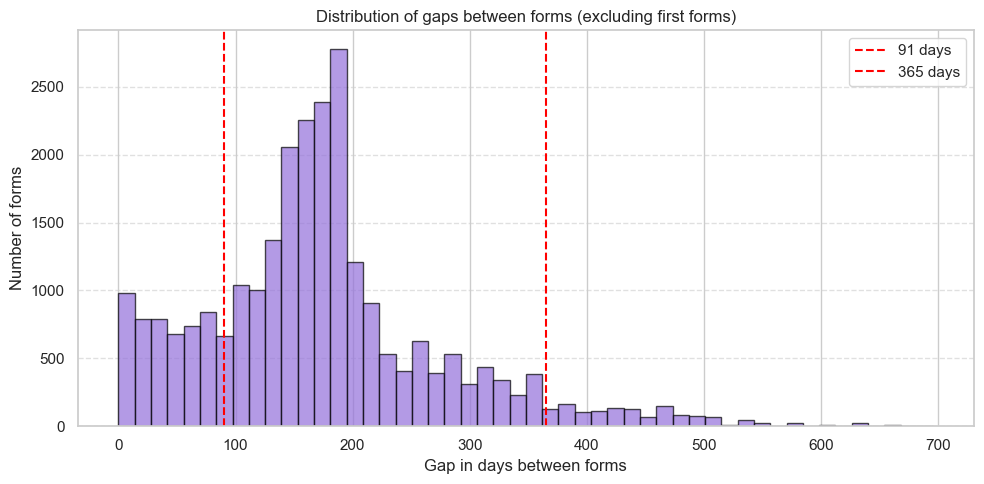

In [39]:
import matplotlib.pyplot as plt

# ניקח רק פערי ימים לא NaN
gaps = df_day_primary["days_diff_child"].dropna()

plt.figure(figsize=(10,5))
plt.hist(gaps, bins=50, color="#9370DB", edgecolor="black", alpha=0.7)

# קווי עזר לטווח הרצוי (3–12 חודשים)
plt.axvline(90, color="red", linestyle="--", label="91 days")
plt.axvline(365, color="red", linestyle="--", label="365 days")

plt.xlabel("Gap in days between forms")
plt.ylabel("Number of forms")
plt.title("Distribution of gaps between forms (excluding first forms)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



In [40]:
# =========================================
# שלב 3: בחירת זוג מדידות (2–15 חודשים) לכל מפתח
# m1 = הראשונה כרונולוגית; m2 = המאוחרת ביותר בתוך [60, 465] ימים אחרי m1
# =========================================
banner("שלב 3 • בחירת זוג מדידות בטווח 2–15 חודשים (60–465 ימים)")

# 3.1 איתור m1 (הטופס הראשון לכל מפתח)
first_idx = df_day_primary.groupby(key_cols)["form_dt"].idxmin()
first_rows = df_day_primary.loc[first_idx].copy()
first_rows["_m1_flag"] = 1

# 3.2 חיבור m1 חזרה כדי לבדוק מועמדות ל-m2
G = df_day_primary.merge(
    first_rows[key_cols + ["form_dt"]].rename(columns={"form_dt": "m1_date"}),
    on=key_cols, how="left"
)

# מועמדות ל-m2: אחרי m1 ובטווח 60–465 ימים (כולל הקצוות)
cand2 = G[(G["form_dt"] > G["m1_date"]) &
          ((G["form_dt"] - G["m1_date"]).dt.days.between(60, 465, inclusive="both"))].copy()

# 3.3 בחירה: המאוחרת ביותר בתוך הטווח (max form_dt)
if cand2.empty:
    print("[אזהרה] לא נמצאו מועמדות ל-m2 בטווח 60–465.")
    second_rows = cand2.copy()
else:
    cand2_idx = cand2.groupby(key_cols)["form_dt"].idxmax()
    second_rows = cand2.loc[cand2_idx].copy()

second_rows["_m2_flag"] = 1
second_rows = second_rows.drop(columns=["m1_date"], errors="ignore")

# 3.4 טבלת זוגות (רק מפתחות שיש להם גם m1 וגם m2)
m1 = first_rows[key_cols + ["form_dt"]].rename(columns={"form_dt": "m1_date"})
m2 = second_rows[key_cols + ["form_dt"]].rename(columns={"form_dt": "m2_date"})
pairs = m1.merge(m2, on=key_cols, how="inner")

# דוח קצר
n_keys_total = df_day_primary.groupby(key_cols).ngroups
print(f"- מספר מפתחות לאחר סינון יומי: {n_keys_total:,}")
print(f"- מספר מפתחות עם זוג מדידות (m1&m2) בטווח 60–465: {pairs.shape[0]:,} ({pairs.shape[0]/n_keys_total:.1%})")
print("- מסקנה: רק עבור המפתחות האלה נבנה טבלת wide.")



========== שלב 3 • בחירת זוג מדידות בטווח 2–15 חודשים (60–465 ימים) ==========
- מספר מפתחות לאחר סינון יומי: 33,799
- מספר מפתחות עם זוג מדידות (m1&m2) בטווח 60–465: 21,981 (65.0%)
- מסקנה: רק עבור המפתחות האלה נבנה טבלת wide.


In [41]:
# =========================================
# שלב 4: בניית קובץ רחב ממוזג שתי מדידות
# (שורה אחת לכל ילד לפי מפתח: ילד–יישוב–קוד מענה)
# נשמר: כל העמודות, עם סיומות _m1 / _m2 (מפתחות בלי סיומת)
# =========================================

banner("שלב 4 • בניית קובץ רחב ממוזג שתי מדידות")

# -------------------------------------------------
# הגדרות
# -------------------------------------------------
# מפתח הזיהוי כבר הוגדר קודם ב-key_cols (למשל: ["id_number","service_code","yeshuv_code"])
כל_העמודות = list(df_day_primary.columns)
עמודות_מפתח = key_cols
עמודות_לא_מפתח = [c for c in כל_העמודות if c not in עמודות_מפתח]

# אפשרות (ברירת מחדל False):
# אם True – נשאיר גם את עמודות המקור בלי סיומת בנוסף ל-_m1/_m2 (יגדיל משמעותית את מספר העמודות)
השארת_עמודות_מקוריות_בנוסף = False

# -------------------------------------------------
# צילום מצב "לפני" (להשוואה בסוף)
# -------------------------------------------------
df_לפני_להשוואה = df_day_primary.copy()
before_cols_set, before_rows, before_cols_n = snapshot_cols(df_לפני_להשוואה)
before_shape = df_לפני_להשוואה.shape

# -------------------------------------------------
# בניית טבלת m1 (מדידה ראשונה) לכל מפתח שנבחר כזוג
# -------------------------------------------------
m1 = first_rows.merge(
    pairs[עמודות_מפתח + ["m1_date"]],
    left_on=עמודות_מפתח + ["form_dt"], right_on=עמודות_מפתח + ["m1_date"],
    how="inner"
)

# נמפה שמות: מפתחות נשארים, כל היתר יקבלו _m1
map_m1 = {c: (c if c in עמודות_מפתח else f"{c}_m1") for c in m1.columns}
m1_rows = m1.rename(columns=map_m1)

# ננקה עמודות עזר שנכנסו מהמיזוג (אם קיימות)
m1_rows = m1_rows.drop(columns=[c for c in ["m1_date"] if c in m1_rows.columns])

# -------------------------------------------------
# בניית טבלת m2 (מדידה שנייה) לכל מפתח שנבחר כזוג
# -------------------------------------------------
m2 = second_rows.merge(
    pairs[עמודות_מפתח + ["m2_date"]],
    left_on=עמודות_מפתח + ["form_dt"], right_on=עמודות_מפתח + ["m2_date"],
    how="inner"
)

# נמפה שמות: מפתחות נשארים, כל היתר יקבלו _m2
map_m2 = {c: (c if c in עמודות_מפתח else f"{c}_m2") for c in m2.columns}
m2_rows = m2.rename(columns=map_m2)

# ננקה עמודות עזר שנכנסו מהמיזוג (אם קיימות)
m2_rows = m2_rows.drop(columns=[c for c in ["m2_date"] if c in m2_rows.columns])

# -------------------------------------------------
# מיזוג m1 ו-m2 לשורה אחת לכל מפתח
# -------------------------------------------------
wide = m1_rows.merge(m2_rows, on=עמודות_מפתח, how="inner")

# אופציונלי: להשאיר גם את עמודות המקור (ללא סיומת) בנוסף ל-_m1/_m2
if השארת_עמודות_מקוריות_בנוסף:
    wide = wide.merge(df_day_primary[עמודות_מפתח + עמודות_לא_מפתח],
                      on=עמודות_מפתח, how="left", suffixes=("", "_src"))
    # אם רוצים לשמר שמות מקור בדיוק (ללא _src), אפשר להשמיט את ה-suffix ולהקפיד שאין התנגשות שמות.

# פער ימים בין המדידות (אם קיימים תאריכים בשתי המדידות)
if {"form_dt_m1", "form_dt_m2"}.issubset(wide.columns):
    wide["gap_days"] = (
        pd.to_datetime(wide["form_dt_m2"]) - pd.to_datetime(wide["form_dt_m1"])
    ).dt.days

# בדיקות איכות בסיסיות
print("מידע • ממדי הקובץ הרחב:", wide.shape)
dups = wide.duplicated(subset=עמודות_מפתח).sum()
print("בדיקת איכות • כפילויות לפי מפתח בקובץ הרחב:", dups)

# אימות טווח פער ימים (60–465)
if "gap_days" in wide.columns:
    מחוץ_לטווח = wide[~wide["gap_days"].between(60, 465, inclusive="both")]
    print("בדיקת איכות • זוגות מחוץ לטווח 60–465 ימים:", len(מחוץ_לטווח))

# =========================================
# שלב 5: שמירת הקובץ הרחב
# =========================================
banner("שלב 5 • שמירת הקובץ הרחב")

from pathlib import Path
Path("data/processed").mkdir(parents=True, exist_ok=True)
out_path = "data/processed/participants_pairs_wide.csv"
wide.to_csv(out_path, index=False, encoding="utf-8")
print("נשמר קובץ:", out_path)

# =========================================
# שלב 6: דוחות וסיכומי לפני–אחרי
# =========================================
banner("שלב 6 • דוחות וסיכומי לפני–אחרי")

# דוח השוואת סכימה
try:
    diff_schema(df_לפני_להשוואה, wide, title="השוואת סכימה: לפני לעומת אחרי")
except Exception as e:
    print("אזהרה • diff_schema נכשל:", e)

# דוח מהיר על הקובץ הרחב
try:
    quick_data_report(wide, title="דוח מהיר: הקובץ הרחב שתי מדידות")
except Exception as e:
    print("אזהרה • quick_data_report נכשל:", e)

# צילום מצב "אחרי" ורשימות מלאות של שינויים בשמות עמודות
after_cols_set, after_rows, after_cols_n = snapshot_cols(wide)
נוספו = sorted(list(after_cols_set - before_cols_set))
הוסרו = sorted(list(before_cols_set - after_cols_set))

print("\nשינויי מבנה — עמודות (שמות):")
print(f"מספר עמודות לפני: {len(before_cols_set)} | מספר עמודות אחרי: {len(after_cols_set)}")
print(f"נוספו: {len(נוספו)} | הוסרו: {len(הוסרו)}")
print("רשימת עמודות שנוספו (מלא):")
print(נוספו)
print("רשימת עמודות שהוסרו (מלא):")
print(הוסרו)
print("\nהבהרה: עמודות שמופיעות כ'הוסרו' הן השמות ללא סיומת מהמבנה הרחב.")
print("המידע לא הוסר — הוא קיים תחת שמות מסומנים _m1 ו-_m2.")

# רישום ללוג המצטבר
report_changes("בניית קובץ רחב שתי מדידות", before_cols_set, after_cols_set, before_rows, after_rows, print_now=True)

# סיכום ממדי טבלה
after_shape = wide.shape
print("\nלפני–אחרי — ממדי טבלה")
print(f"צורה לפני: {before_shape} | צורה אחרי: {after_shape}")

# תיאור פער ימים (אם קיים)
if "gap_days" in wide.columns:
    print("\nפער ימים בין מדידה ראשונה לשנייה — תיאור")
    print(wide["gap_days"].describe().to_string())
    print("\nהתפלגות לפי טווחים (ימים):")
    דליים = pd.cut(wide["gap_days"], bins=[60, 90, 180, 365, 465], right=True, include_lowest=True)
    print(דליים.value_counts().sort_index())

# שמירת לוג השינויים לקובץ
save_change_log()



========== שלב 4 • בניית קובץ רחב ממוזג שתי מדידות ==========
מידע • ממדי הקובץ הרחב: (21981, 436)
בדיקת איכות • כפילויות לפי מפתח בקובץ הרחב: 0
בדיקת איכות • זוגות מחוץ לטווח 60–465 ימים: 0

========== שלב 5 • שמירת הקובץ הרחב ==========
נשמר קובץ: data/processed/participants_pairs_wide.csv

========== שלב 6 • דוחות וסיכומי לפני–אחרי ==========
=== השוואת סכימה: לפני לעומת אחרי ===
                                              before   after  changed
RS10_suspected_external_physical_abuse        object     NaN     True
RS10_suspected_external_physical_abuse_m1        NaN  object     True
RS10_suspected_external_physical_abuse_m2        NaN  object     True
RS11_external_emotional_or_economic_abuse     object     NaN     True
RS11_external_emotional_or_economic_abuse_m1     NaN  object     True
...                                              ...     ...      ...
welfare_known_family_m1                          NaN  object     True
welfare_known_family_m2                          NaN 

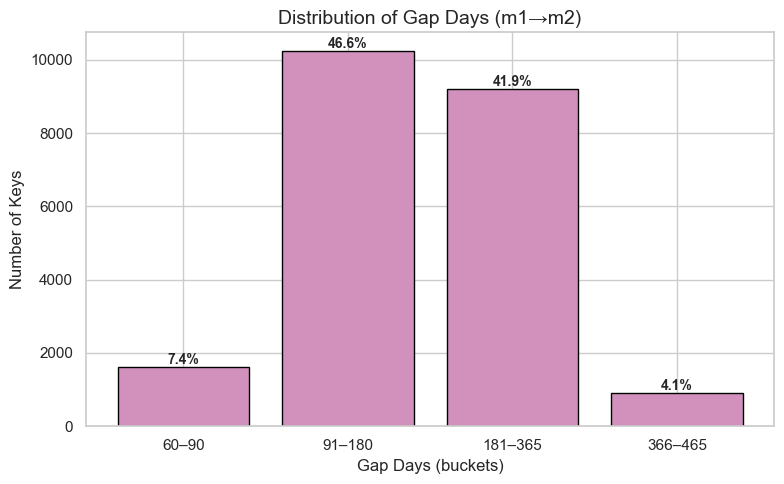

In [42]:
import matplotlib.pyplot as plt

# Define bins and labels
bins = [60, 90, 180, 365, 465]
labels = ["60–90", "91–180", "181–365", "366–465"]

# Cut values into buckets
wide["gap_bucket"] = pd.cut(
    wide["gap_days"], bins=bins, labels=labels, right=True, include_lowest=True
)

# Counts and percentages
counts = wide["gap_bucket"].value_counts().sort_index()
percents = (counts / counts.sum() * 100).round(1)

# Plot histogram
plt.figure(figsize=(8,5))
bars = plt.bar(counts.index.astype(str), counts.values, 
               color="#d291bc", edgecolor="black")

# Add percentage labels above bars
for bar, pct in zip(bars, percents):
    plt.text(
        bar.get_x() + bar.get_width()/2,   # Center of bar
        bar.get_height(),                 # Height of bar
        f"{pct}%",                        # Percent text
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )

plt.title("Distribution of Gap Days (m1→m2)", fontsize=14)
plt.xlabel("Gap Days (buckets)", fontsize=12)
plt.ylabel("Number of Keys", fontsize=12)
plt.tight_layout()
plt.show()


In [43]:
# =========================================
# שלב 5: שמירת הקובץ הרחב
# =========================================
banner("שלב 5 • שמירת הקובץ הרחב")

from pathlib import Path
Path("data/processed").mkdir(parents=True, exist_ok=True)
out_path = "data/processed/participants_pairs_wide.csv"
wide.to_csv(out_path, index=False, encoding="utf-8")
print("נשמר קובץ:", out_path)


========== שלב 5 • שמירת הקובץ הרחב ==========
נשמר קובץ: data/processed/participants_pairs_wide.csv


### Convert an object into viable data

In [44]:
#שמירת גיבוי ויצירת קובץ עבודה חדש לטיפול בעמודות
import pandas as pd, shutil
from pathlib import Path

# קובץ מקור 
backup = Path("data/processed/participants_pairs_wide.csv")

# קובץ עבודה חדש 
at_work = Path("data/interim/participants_columns_handling.csv")
at_work.parent.mkdir(parents=True, exist_ok=True)

# יצירת עותק
shutil.copy2(backup, at_work)

# טעינה לעבודה
df = pd.read_csv(at_work)
print("Loaded:", at_work.resolve(), "| shape:", df.shape)


Loaded: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\interim\participants_columns_handling.csv | shape: (21981, 437)


In [45]:
# הדפסת מספר עמודות ושמות אחרונות
print("Shape:", df.shape)
print("Last 10 columns:", df.columns[-10:].tolist())

Shape: (21981, 437)
Last 10 columns: ['_risk_complete_m2', '_day_m2', '_row_order_m2', '_rank_in_day_m2', 'is_primary_same_day_m2', 'days_diff_child_m2', '_m2_flag_m2', 'm2_date_m2', 'gap_days', 'gap_bucket']


In [46]:
#צילום מצב לפני הטיפול במשתנים
# צילום מצב של הטיפוסים לכל העמודות לפני הטיפול
before_schema = df.dtypes.copy()

print("Schema snapshot taken | number of columns:", len(before_schema))
print(before_schema.head(10))  # תצוגה של 10 ראשונות


Schema snapshot taken | number of columns: 437
ref_id_360_m1            int64
form_type_m1            object
form_version_m1         object
form_date_m1            object
form_filler_role_m1     object
yeshuv_code              int64
yeshuv_name_m1          object
machoz_m1               object
institution_type_m1     object
institution_code_m1    float64
dtype: object


In [47]:
#  מספר העמודות שהטיפוס שלהן 
num_object_cols = df.select_dtypes(include="object").shape[1]
print("Number of object columns:", num_object_cols)

# מתוך כלל העמודות
total_cols = df.shape[1]
print(f"{num_object_cols} out of {total_cols} columns are of type 'object'")


Number of object columns: 378
378 out of 437 columns are of type 'object'


In [48]:
# 2. הצגת שם העמודה + מספר ערכים ייחודיים בכל אחת
df.select_dtypes(include="object").nunique().sort_values(ascending=False)

id_number                      21783
form_date_m1                   21224
m1_date_m1                     21224
form_dt_m1                     21224
form_date_m2                   20571
                               ...  
receives_service_parents_m1        1
institution_type_m2                1
single_parent_m2                   1
single_parent_m1                   1
st5_interests_talents_m1           1
Length: 378, dtype: int64

In [49]:
# פונקציה להצגת כל המשתנים שהם אובייקטים והערכים הייחודיים שלהם
def show_object_summary(df):
    object_cols = df.select_dtypes(include="object").columns
    print(f"Found {len(object_cols)} object columns\n")
    
    for col in object_cols:
        print("="*50)
        print(f"Column: {col}")
        print(f"Unique values: {df[col].nunique()}")
        print(df[col].value_counts(dropna=False).head(10))  # מציג את 10 הנפוצים ביותר
        print("\n")

show_object_summary(df)

Found 378 object columns

Column: form_type_m1
Unique values: 2
form_type_m1
מעקב אחר ילדים המשתתפים בתוכניות לילדים ונוער בסיכון                                   21980
איתור ילדים בסיכון במסגרת מיפוי במערכות אוניברסליות (טיפות חלב, גני ילדים, בתי ספר)        1
Name: count, dtype: int64


Column: form_version_m1
Unique values: 6
form_version_m1
גיל הרך                     8510
ילדים ובני נוער             7889
ילדים ובני נוער חרדי        2211
גיל הרך (בערבית)            1191
גיל הרך חרדי                1114
ילדים ובני נוער (בערבית)    1066
Name: count, dtype: int64


Column: form_date_m1
Unique values: 21224
form_date_m1
12/07/2023 11:51    7
12/12/2023 09:24    6
12/07/2023 11:05    5
12/07/2023 10:42    5
12/12/2023 09:16    5
12/07/2023 10:33    5
01/03/2024 15:29    4
12/11/2023 11:30    4
12/12/2023 11:06    4
12/12/2023 09:05    4
Name: count, dtype: int64


Column: form_filler_role_m1
Unique values: 19
form_filler_role_m1
מדריך               5640
מורה/מחנך           2834
פארה רפ

In [50]:
print(df["form_type_m1"].value_counts())

form_type_m1
מעקב אחר ילדים המשתתפים בתוכניות לילדים ונוער בסיכון                                   21980
איתור ילדים בסיכון במסגרת מיפוי במערכות אוניברסליות (טיפות חלב, גני ילדים, בתי ספר)        1
Name: count, dtype: int64


In [51]:
print(df["form_type_m1"].nunique())      

2


In [52]:
print(df["form_type_m2"].value_counts())

form_type_m2
מעקב אחר ילדים המשתתפים בתוכניות לילדים ונוער בסיכון                                   21980
איתור ילדים בסיכון במסגרת מיפוי במערכות אוניברסליות (טיפות חלב, גני ילדים, בתי ספר)        1
Name: count, dtype: int64


In [53]:
#שינוי אובייקט לסטרינגי
df["id_number"] = df["id_number"].astype("string")
df["id_number"].dtype

string[python]

In [54]:
# בטעות העמודה סוג הטופס שהיא מזהה התפצלה לשתי המדידות- איחוד מחדש
df["form_version"] = np.where(
    df["form_version_m1"].notna(),
    df["form_version_m1"],
    df["form_version_m2"]
)


In [55]:
print(df["form_version"].value_counts())


form_version
גיל הרך                     8510
ילדים ובני נוער             7889
ילדים ובני נוער חרדי        2211
גיל הרך (בערבית)            1191
גיל הרך חרדי                1114
ילדים ובני נוער (בערבית)    1066
Name: count, dtype: int64


In [56]:
#מחיקת העמודות שהתפצלו בטעות
df = df.drop(columns=["form_version_m1","form_version_m2"], errors="ignore")



In [57]:
df["form_group"] = df["form_version"].replace({
    "גיל הרך": "גיל הרך",
    "גיל הרך חרדי": "גיל הרך",
    "גיל הרך (בערבית)": "גיל הרך",
    "ילדים ובני נוער": "ילדים ונוער",
    "ילדים ובני נוער חרדי": "ילדים ונוער",
    "ילדים ובני נוער (בערבית)": "ילדים ונוער"
})


In [58]:
#יצירת דגל טופס חרדי
df["is_haredi_form"] = df["form_version"].str.contains("חרדי").astype(int)

#יצירת דגל טופס ערבי
df["is_arabic_form"] = df["form_version"].str.contains("ערבית").astype(int)


In [59]:
#שינוי אובייקט לקטגוריאלי
df["form_version"] = df["form_version"].astype("category")
df["form_group"] = df["form_group"].astype("category")
print(df["form_group"].value_counts())
print(df["form_group"].dtype)


form_group
ילדים ונוער    11166
גיל הרך        10815
Name: count, dtype: int64
category


In [60]:
# הדפסת מספר עמודות ושמות אחרונות
print("Shape:", df.shape)
print("Last 10 columns:", df.columns[-10:].tolist())

Shape: (21981, 439)
Last 10 columns: ['is_primary_same_day_m2', 'days_diff_child_m2', '_m2_flag_m2', 'm2_date_m2', 'gap_days', 'gap_bucket', 'form_version', 'form_group', 'is_haredi_form', 'is_arabic_form']


In [61]:
print("Current file:", at_work.resolve())
print("Exists?     ", at_work.exists())
print("Shape:      ", df.shape)


Current file: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\interim\participants_columns_handling.csv
Exists?      True
Shape:       (21981, 439)


In [62]:
df["form_filler_role_m1"].value_counts()


form_filler_role_m1
מדריך                      5640
מורה/מחנך                  2834
פארה רפואי                 2529
גננת                       1899
עו"ס                       1441
אחר                        1398
פסיכולוג                   1339
נאמן פותחים עתיד           1154
מטפלת                      1087
יועצת חינוכית               951
מנהלת מעון                  539
חונך                        438
אחות                        239
מנהלת מועדונית/בני נוער     206
קידום נוער                  131
מורה-חיילת                   52
מתנדב (שירות לאומי, שש)      51
קב"ס                         42
סומך                         11
Name: count, dtype: int64

In [63]:
#שינוי אובייקט לקטגוריאלי
df["form_filler_role_m1"] = df["form_filler_role_m1"].astype("category")
print(df["form_filler_role_m1"].dtype)

category


In [64]:
df["form_filler_role_m2"].value_counts()
print(df["form_filler_role_m2"].dtype)

object


In [65]:
#שינוי אובייקט לקטגוריאלי
df["form_filler_role_m2"] = df["form_filler_role_m2"].astype("category")
print(df["form_filler_role_m2"].dtype)

category


In [66]:
df["form_date_m1"].value_counts()

form_date_m1
12/07/2023 11:51       7
12/12/2023 09:24       6
12/07/2023 11:05       5
12/07/2023 10:42       5
12/12/2023 09:16       5
                      ..
01/28/2024 14:01:00    1
12/20/2023 13:27:21    1
01/15/2024 21:54:15    1
01/07/2024 12:13       1
12/24/2023 11:22:50    1
Name: count, Length: 21224, dtype: int64

In [67]:
print(df["form_date_m1"].dtype)

object


In [68]:
df["form_date_m1"] = pd.to_datetime(df["form_date_m1"], errors="coerce", dayfirst=True)

In [69]:
print(df["form_date_m1"].dtype)

datetime64[ns]


In [70]:
df["form_date_m2"].value_counts()

form_date_m2
06/04/2024 09:53       5
06/06/2024 13:31       5
06/10/2024 10:41       5
06/05/2024 11:17       5
06/04/2024 10:47       5
                      ..
05/15/2024 11:53:40    1
07/14/2024 11:47:58    1
07/08/2024 19:03       1
05/09/2024 20:53       1
06/22/2024 22:44:46    1
Name: count, Length: 20571, dtype: int64

In [71]:
print(df["form_date_m2"].dtype)

object


In [72]:
#שינוי אובייקט לטיפוס תאריךי
df["form_date_m2"] = pd.to_datetime(df["form_date_m2"], errors="coerce", dayfirst=True)
print(df["form_date_m2"].dtype)

datetime64[ns]


In [73]:
df["yeshuv_name_m1"].value_counts()

yeshuv_name_m1
בני ברק                               1174
אשדוד                                  889
בית שמש                                854
אום אל פאחם                            488
יבנה                                   468
                                      ... 
תל אביב יפו נווה שאנן-שכונת התקווה       4
ינוח גת                                  3
חבל אילות                                1
שדרות                                    1
מטה                                      1
Name: count, Length: 183, dtype: int64

In [74]:
print(df["yeshuv_name_m1"].dtype)

object


In [75]:
# בטעות העמודה 'שם הישוב' שהיא מזהה התפצלה לשתי המדידות- איחוד מחדש
df["yeshuv_name"] = np.where(
    df["yeshuv_name_m1"].notna(),
    df["yeshuv_name_m1"],
    df["yeshuv_name_m2"]
)

In [76]:
print(df["yeshuv_name"].value_counts())

yeshuv_name
בני ברק                               1174
אשדוד                                  889
בית שמש                                854
אום אל פאחם                            488
יבנה                                   468
                                      ... 
תל אביב יפו נווה שאנן-שכונת התקווה       4
ינוח גת                                  3
חבל אילות                                1
שדרות                                    1
מטה                                      1
Name: count, Length: 183, dtype: int64


In [77]:
df = df.drop(columns=["yeshuv_name_m1","yeshuv_name_m2"], errors="ignore")

In [78]:
print(df["yeshuv_name"].dtype)

object


In [79]:
#שינוי אובייקט לקטגוריאלי
df["yeshuv_name"] = df["yeshuv_name"].astype("category")
print(df["yeshuv_name"].dtype)

category


In [80]:
# בדיקה כמה יישובים הם נדירים בשכיחות שלהם מתחת ל- 1% כדי לשקול להכניס אותם תחת קטגוריה של 'אחר

total = len(df)
threshold = total * 0.01

# ספירת הופעות של כל יישוב
counts = df['yeshuv_name'].value_counts()

# יישובים מתחת ל־1%
rare_yeshuvim = counts[counts < threshold]

print(f"סה\"כ יישובים עם פחות מ-1% מהשורות: {len(rare_yeshuvim)}")
print("רשימה לדוגמה:")
print(rare_yeshuvim.head(20))


סה"כ יישובים עם פחות מ-1% מהשורות: 158
רשימה לדוגמה:
yeshuv_name
רהט                       206
דימונה                    200
מעלות תרשיחא              191
מראר                      187
בת ים                     186
קרית מלאכי                185
נהריה                     183
עראבה                     183
כפר כנא                   178
טמרה                      172
חולון                     170
לוד                       168
אילת                      165
מעלה אדומים               160
הגלבוע                    160
דלית אל כרמל              157
כסיפה                     154
כפר מנדא                  154
עספיא                     153
נוף הגליל - נצרת עילית    149
Name: count, dtype: int64


In [81]:
# יישובים מעל ל־1%
common_yeshuvim = counts[counts > threshold]

print(f"סה\"כ יישובים עם יותר מ-1% מהשורות: {len(common_yeshuvim)}")
print("רשימה לדוגמה:")
print(common_yeshuvim.head(20))

סה"כ יישובים עם יותר מ-1% מהשורות: 25
רשימה לדוגמה:
yeshuv_name
בני ברק        1174
אשדוד           889
בית שמש         854
אום אל פאחם     488
יבנה            468
סכנין           458
טירת הכרמל      450
חדרה            439
אלעד            353
ראשון לציון     314
גסר אל זרקא     305
ביתר עילית      304
נתניה           303
פתח תקווה       296
קרית גת         295
צפת             294
אשקלון          286
כפר קאסם        268
מכר גדידה       261
שפרעם           251
Name: count, dtype: int64


In [82]:
# בגלל שיש יותר מדיי ישובים שהם כביכול נדירים- 158 ישובים מתחת ל 1%  החלטתי לא לאחד ל 'אחר' ובשלב הנדסת הנתונים אעשה target encoder

In [83]:
# בטעות העמודה 'שם הישוב' שהיא מזהה התפצלה לשתי המדידות- איחוד מחדש
df["machoz"] = np.where(
    df["machoz_m1"].notna(),
    df["machoz_m1"],
    df["machoz_m2"]
)

In [84]:
print(df["machoz"].dtype)

object


In [85]:
#שינוי אובייקט לקטגוריאלי
df["machoz"] = df["machoz"].astype("category")
print(df["machoz"].dtype)

category


In [86]:
print(df["machoz"].value_counts())

machoz
ת"א והמרכז    5077
דרום          3898
צפון ב        3528
חיפה          3504
צפון א        3374
ירושלים       2600
Name: count, dtype: int64


In [87]:
#  איחוד צפון א וצפון ב לצפון
df['machoz_m1'] = df['machoz_m1'].replace({'צפון א': 'צפון', 'צפון ב': 'צפון'})

# בדיקת התוצאה
print(df['machoz_m1'].value_counts())

machoz_m1
צפון          6902
ת"א והמרכז    5077
דרום          3898
חיפה          3504
ירושלים       2600
Name: count, dtype: int64


In [88]:
# בטעות העמודה 'שם המענה' שהיא מזהה התפצלה לשתי המדידות- איחוד מחדש
df["service_name"] = np.where(
    df["service_name_m1"].notna(),
    df["service_name_m1"],
    df["service_name_m2"]
)

print(df["service_name"].dtype)

object


In [89]:
#שינוי אובייקט לקטגוריאלי
df["service_name"] = df["service_name"].astype("category")
print(df["service_name"].dtype)

category


In [90]:
print(df['service_name'].value_counts())

service_name
חדרי שלווה (חם)-מענה רגשי במצבי מצוקה וסיכון, ובמצבי משבר במסגרת ביהס    1991
מעגן - מערך תומך מעון-גן                                                 1475
תוכנית אור רב תחומי                                                      1288
פותחים עתיד                                                              1091
מרכז נוער ישובי / שכונתי                                                 1055
                                                                         ... 
הכוח לצמוח- תכנית לילדי גן במגרים                                           1
גן הספרים (תוכנית 10%)                                                      1
סיוע טיפולי, טיפוחי וחמרי לילדים ולנוער - הוראה 8.5 בתעש                    1
סדנאות להורים                                                               1
קב"ס מטופלים/ות                                                             1
Name: count, Length: 335, dtype: int64


In [91]:
# --- איחוד של שם המענה ---

import re
import pandas as pd

# עמודות מקור ויעד
SRC = 'service_name'
DST = 'service_name_unified'

# טווח יוניקוד לאותיות עבריות (לשימוש בניקוי)
HEB_RANGE = r'\u0590-\u05FF'

# 1) נרמול קל: רווחים, מקפים, תווים מיותרים; שמירת ()/" וראשי תיבות
def normalize_txt(s):
    if pd.isna(s): 
        return s
    # אותיות קטנות
    s = str(s).strip().lower()
    # איחוד סוגי מקפים לרווח
    s = re.sub(r'[‐\-–—_]+', ' ', s)
    # דחיסת רווחים
    s = re.sub(r'\s+', ' ', s)
    # שמירת אותיות/ספרות/רווח וכן ()"/
    s = re.sub(fr'[^{HEB_RANGE}a-z0-9 ()/"]', '', s)
    # אחידות מרכאות
    s = s.replace('״','"').replace('”','"').replace('“','"')
    # אחידות כתיב נפוצה (תכנית/תוכנית)
    s = re.sub(r'תוכנ(י|י)ת', 'תוכנית', s)
    return s

# יצירת עמודת נרמול זמנית
df['_service_norm'] = df[SRC].apply(normalize_txt)

# 2) דפוסים מתוקנים (חיפוש מצד שמאל, תווית קנונית מצד ימין)
BASE_PATTERNS = [
    (r'^חדר(י)? שלווה', 'חדרי שלווה (חם)'),
    (r'^אבחון וטיפול בקשיים התפתחותיים ורגשיים של ילדים מאותרים בגיל הרך',
     'אבחון וטיפול בקשיים התפתחותיים ורגשיים של ילדים מאותרים בגיל הרך'),
    (r'^ת[וֹ]כנית? אור|^אור רב תחומי', 'תוכנית אור'),
    (r'^איתור והתערבות בגני טרום חובה', 'איתור והתערבות בגני טרום חובה'),
    (r'^איתור ילדים עם הפרעות התפתחותיות במעונות היום ובגני הילדים',
     'איתור ילדים עם הפרעות התפתחותיות במעונות היום ובגני הילדים'),
    (r'^בית חם ויוצר לנערות', 'בית חם ויוצר לנערות'),
    (r'^גשרים( |-)|^גשרים ', 'גשרים'),
    (r'^דגם בין משרדי למרכז גיל רך ישובי', 'דגם בין משרדי למרכז גיל רך ישובי'),
    (r'^האתג"ר', 'האתג"ר'),
    (r'^הט"ף', 'הט"ף (הדרכה בטיפוח פעוטות)'),
    (r'^היחידה להתפתחות הילד גיל הרך', 'היחידה להתפתחות הילד גיל הרך'),
    (r'^היחידה לקידום נוער', 'היחידה לקידום נוער (במימון אחר)'),
    (r'^חיזוק משאבי התמודדות באמצעות טיפול באומנויות', 'חיזוק משאבי התמודדות באמצעות טיפול באומנויות'),
    (r'^טיפולים קבוצתיים לילדים ו/?או הורים|^טיפולים קבוצתיים', 'טיפולים קבוצתיים'),
    (r'^יש מצב', 'יש מצב'),
    (r'^להב"ה', 'להב"ה'),
    (r'^מועדוניות מתבגרים', 'מועדוניות מתבגרים'),
    (r'^מועדונית טיפולית', 'מועדונית טיפולית'),
    (r'^מיפוי בגני ילדים', 'מיפוי בגני ילדים'),
    (r'^מיפוי כיתות', 'מיפוי כיתות'),
    (r'^מל[א"]?', 'מל"א'),
    (r'^מעגן.*', 'מעגן'),
    (r'^מרכז ילדים הורים', 'מרכז ילדים הורים'),
    (r'^מרכזי? למידה שכונתיים', 'מרכזי למידה שכונתיים'),
    (r'^נתיבים להורות', 'נתיבים להורות'),
    (r'^ת(וֹ|ו)?כנית? אור|^תוכנית אור', 'תוכנית אור'),
    (r'^תכנית משפחות להורים וילדים בגיל הרך', 'תכנית משפחות להורים וילדים בגיל הרך'),
    (r'^תמיכה ביתית בילד ?\(?אומנה יומית\)?', 'תמיכה ביתית בילד (אומנה יומית)'),
    (r'^מרכז נוער ישובי|^מרכז נוער שכונתי|^מרכז נוער עירוני', 'מרכז נוער'),
    (r'^פותחים עתיד', 'פותחים עתיד'),
    (r'^מעון יום רב תכליתי', 'מעון יום רב תכליתי'),
]

def choose_base(name_clean: str):
    if not isinstance(name_clean, str):
        return None
    for pat, canon in BASE_PATTERNS:
        if re.search(pat, name_clean):
            return canon
    return None

# 3) יצירת עמודת יעד: ברירת מחדל = נרמול; אם יש התאמה לדפוס -> שם קנוני
canon = df['_service_norm'].apply(choose_base)
df[DST] = canon.fillna(df['_service_norm']).astype('string')

# 4) דוח בקרה: לפני/אחרי + דוגמאות שינוי
unique_before = df[SRC].nunique(dropna=False)
unique_after  = df[DST].nunique(dropna=False)
print(f'ייחודיים לפני: {unique_before} | ייחודיים אחרי: {unique_after}')

changes = (df[[SRC, DST]]
           .drop_duplicates()
           .query(f'{SRC}.astype("string") != {DST}.astype("string")'))
print(f'שורות ששונו: {len(changes)}')
print(changes.head(20))

# 5) ניקוי עזר (אופציונלי להשאיר לביקורת)
# df.drop(columns=['_service_norm'], inplace=True)


ייחודיים לפני: 335 | ייחודיים אחרי: 185
שורות ששונו: 244
                                         service_name  \
0                    מרכזי למידה שכונתיים - שירת יוסף   
1      טיפולים קבוצתיים לילדים ו/או הורים - ילד ונוער   
3                               מל"א – מרחב למידה אחר   
4   מעון יום רב תכליתי -  מבוזר - 9104 - פעוטות מש...   
7   חדרי שלווה (חם)-מענה רגשי במצבי מצוקה וסיכון, ...   
9                           סיוע טיפולי, טיפוחי לנוער   
11                           מעגן - מערך תומך מעון-גן   
12  חדרי שלווה (חם)-מענה רגשי במצבי מצוקה וסיכון, ...   
13                           מרכז נוער ישובי / שכונתי   
17                      מרכז נוער ישובי / שכונתי-בנים   
18                 טיפולים קבוצתיים לילדים ו/או הורים   
19  טיפולים קבוצתיים לילדים ו/או הורים - טיפולים ר...   
21                                חצר פעילה - 10 גנים   
22           מעגן - מערך תומך מעון גן - מורחב - ילדים   
23                         מרכז מידע וייעוץ לבני נוער   
24   נתיבים להורות - מודל טיפול

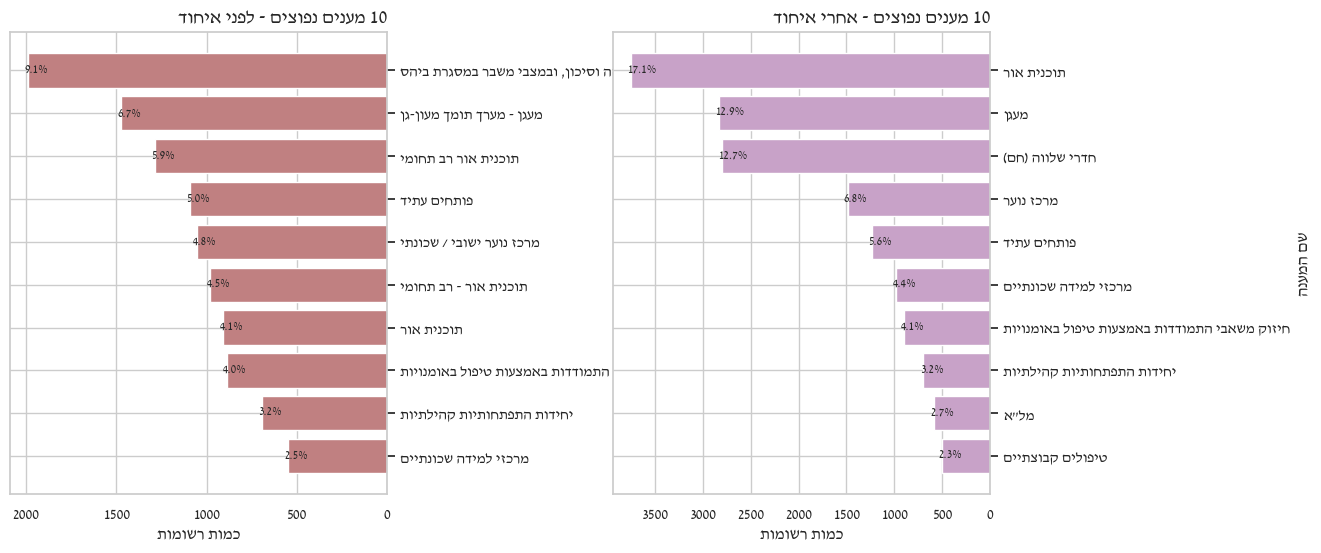

In [92]:
# --- לפני ואחרי איחוד שם המענה: בדיקה ויזואלית של התפלגות האחוזים ---

import matplotlib.pyplot as plt
import matplotlib as mpl
from bidi.algorithm import get_display
import arabic_reshaper

# פונט עברי
mpl.rcParams['font.family'] = 'David'

# צבעים
PINK_ANTIQUE = '#C08081'  # ורוד עתיק
LILAC        = '#C8A2C8'  # סגול לילך

SRC, DST = 'service_name', 'service_name_unified'

# פונקציית תיקון RTL
def fix_rtl(text):
    if not isinstance(text, str): return text
    return get_display(arabic_reshaper.reshape(text))

# ספירת תדירויות (Top-10) + אחוזים מכלל הרשומות
vc_before, vc_after = df[SRC].value_counts(), df[DST].value_counts()
before_counts, after_counts = vc_before.head(10), vc_after.head(10)
before_perc = (before_counts / vc_before.sum()) * 100
after_perc  = (after_counts  / vc_after.sum())  * 100

# פונקציה לציור גרף RTL
def plot_rtl_barh(ax, series, perc, title, color):
    labels = [fix_rtl(s) for s in series.index[::-1]]
    values = series.values[::-1]
    percentages = perc.values[::-1]

    bars = ax.barh(labels, values, color=color)
    ax.set_title(fix_rtl(title), fontsize=14, loc='right')
    ax.invert_xaxis()
    ax.yaxis.tick_right(); ax.yaxis.set_label_position('right')
    ax.set_xlabel(fix_rtl("כמות רשומות"))
    ax.set_ylabel(fix_rtl("שם המענה"))

    # אחוזים בקצה כל עמודה
    for bar, p in zip(bars, percentages):
        ax.text(bar.get_width() + max(values)*0.01,
                bar.get_y() + bar.get_height()/2,
                f"{p:.1f}%", va='center', ha='left', fontsize=9)

# ציור שני גרפים זה לצד זה
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(left=0.25, right=0.95, wspace=0.6)

plot_rtl_barh(axes[0], before_counts, before_perc, "10 מענים נפוצים - לפני איחוד", PINK_ANTIQUE)
plot_rtl_barh(axes[1], after_counts,  after_perc,  "10 מענים נפוצים - אחרי איחוד",  LILAC)

plt.show()


In [93]:
#הצגה בטבלה

import pandas as pd

# שכיחויות + אחוזים לעמודת שם המענה המאוחד
vc = df['service_name_unified'].astype('string').value_counts(dropna=False)

freqs = (vc.rename_axis('שם מענה מאוחד')
           .reset_index(name='שכיחות'))

# חישוב אחוזים
total = freqs['שכיחות'].sum()
freqs['אחוז מהרשומות'] = (freqs['שכיחות'] / total * 100).round(1)

# בחירת 25 הערכים הנפוצים ביותר
N = 25
freqs_top = freqs.head(N)

# עיצוב הטבלה
styled = (freqs_top.style
          .hide(axis='index')
          .set_properties(**{'text-align': 'right', 'direction': 'rtl'})
          .set_table_styles([
              {'selector': 'th', 'props': 'text-align:right; direction:rtl;'},
              {'selector': 'th.col_heading', 'props': 'text-align:right; direction:rtl;'},
          ])
          .format({'שכיחות': '{:,.0f}', 'אחוז מהרשומות': '{:.1f}%'})
         )

styled


שם מענה מאוחד,שכיחות,אחוז מהרשומות
תוכנית אור,"3,751",17.1%
מעגן,"2,831",12.9%
חדרי שלווה (חם),"2,800",12.7%
מרכז נוער,"1,489",6.8%
פותחים עתיד,"1,233",5.6%
מרכזי למידה שכונתיים,978,4.4%
חיזוק משאבי התמודדות באמצעות טיפול באומנויות,897,4.1%
יחידות התפתחותיות קהילתיות,695,3.2%
"מל""א",586,2.7%
טיפולים קבוצתיים,505,2.3%


In [94]:
# טבלת השוואה בין המקורי לאחוד
compare_names = (
    df[['service_name', 'service_name_unified']]
    .drop_duplicates()
    .reset_index(drop=True)
)

print(compare_names.head(30))


                                         service_name  \
0                    מרכזי למידה שכונתיים - שירת יוסף   
1      טיפולים קבוצתיים לילדים ו/או הורים - ילד ונוער   
2                                               שלהבת   
3                               מל"א – מרחב למידה אחר   
4   מעון יום רב תכליתי -  מבוזר - 9104 - פעוטות מש...   
5                                              יש מצב   
6                          יחידות התפתחותיות קהילתיות   
7   חדרי שלווה (חם)-מענה רגשי במצבי מצוקה וסיכון, ...   
8        חיזוק משאבי התמודדות באמצעות טיפול באומנויות   
9                           סיוע טיפולי, טיפוחי לנוער   
10                                         תוכנית אור   
11                           מעגן - מערך תומך מעון-גן   
12  חדרי שלווה (חם)-מענה רגשי במצבי מצוקה וסיכון, ...   
13                           מרכז נוער ישובי / שכונתי   
14                      מרכז נוער ישובי / שכונתי-בנים   
15                 טיפולים קבוצתיים לילדים ו/או הורים   
16  טיפולים קבוצתיים לילדים ו/א

In [95]:
# המרה לעמודות קטגוריאליות
df['service_name_unified'] = df['service_name_unified'].astype('category')

# בדיקה
print(df['service_name_unified'].dtype)

category


In [96]:
print(df["service_code"].value_counts().head(10))

service_code
2290061-000640      233
1010244-000635      219
2230189-001699      200
2210089-003872      183
2230029-003186      180
2230157-000437      173
2210267-000439      168
2210089-005112      162
922300613-002780    153
2210089-000775      143
Name: count, dtype: int64


In [97]:
#שינוי אובייקט לקטגוריאלי
df["service_code"] = df["service_code"].astype("category")
print(df["service_code"].dtype)

category


In [98]:
df['service_code'].unique()

['2230189-000645', '1010244-040143', '2290303-047064', '2230264-040224', '810100886-006451', ..., '1010297-006477', '922300648-003232', '1010298-002257', '922301148-005376', '3310076-003653']
Length: 900
Categories (900, object): ['1010005-001223', '1010005-047109', '1010007-000337', '1010007-004077', ..., '922901143-007169', '933101144-007025', '933101144-032810', '933101144-040218']

In [99]:
# בטעות העמודה מיקום המענה שהיא מזהה התפצלה לשתי המדידות- איחוד מחדש
df["service_location"] = np.where(
    df["service_location_m1"].notna(),
    df["service_location_m1"],
    df["service_location_m2"]
)


In [100]:
#מחיקת העמודות שהתפצלו בטעות
df = df.drop(columns=["service_location_m1","service_location_m2"], errors="ignore")

In [101]:
print(df["service_location"].dtype)

object


In [102]:
#שינוי אובייקט לקטגוריאלי
df["service_location"] = df["service_location"].astype("category")
print(df["service_location"].dtype)

category


In [103]:
# בטעות העמודה מגדר שהיא מזהה התפצלה לשתי המדידות- איחוד מחדש
df["sex"] = np.where(
    df["sex_m1"].notna(),
    df["sex_m1"],
    df["sex_m2"]
)


In [104]:
print(df["sex"].dtype)

object


In [105]:
#שינוי אובייקט לקטגוריאלי
df["sex"] = df["sex"].astype("category")
print(df["sex"].dtype)

category


In [106]:
#מחיקת העמודות שהתפצלו בטעות
df = df.drop(columns=["sex_m1","sex_m2"], errors="ignore")

In [107]:
#הגדרת קבוצות גיל כמשתנה קטגוריאלי אורדינלי
import pandas as pd

df["age_group_m1"] = pd.Categorical(
    df["age_group_m1"],
    categories=["0-6", "7-11", "12-18"],
    ordered=True
)

print(df["age_group_m1"].dtype)


category


In [108]:
print(df["program_name_m1"].value_counts())

program_name_m1
אור רב תחומי                                                                         3594
חדרי שלווה (חם)-מענה רגשי במצבי מצוקה וסיכון, ובמצבי משבר במסגרת ביהס תקציב בסיסי    2493
מעגן - מערך תומך מעון-גן                                                             1608
מרכז נוער ישובי / שכונתי                                                             1348
פותחים עתיד                                                                          1233
                                                                                     ... 
גן הספרים (תוכנית 10%)                                                                  1
מעטפת רכה - 20 משתתפים                                                                  1
מרכז טיפולי לילדים בסיכון ומשפחותיהם (במימון אחר)                                       1
לא בלי הורים                                                                            1
מעבר מהגן לכיתה א' (תוכנית 10%)                                                     

In [109]:
# --- בדיקה: השוואה בין שם התוכנית מדידה ראשונה למדידה שנייה ---

if "program_name_m1" in df.columns and "program_name_m2" in df.columns:
    mask = df["program_name_m1"].astype("string") == df["program_name_m2"].astype("string")
    
    אחוז_זהות = mask.mean()
    מספר_שונות = (~mask).sum()
    
    print(f"אחוז שורות זהות: {אחוז_זהות:.2%}")
    print(f"מספר שורות שונות: {מספר_שונות}")
    

אחוז שורות זהות: 100.00%
מספר שורות שונות: 0


In [110]:
# --- איחוד וניקוי של "שם התוכנית" ---

import re
import pandas as pd

COL_SRC = 'program_name'          # עמודת המקור (מאוחדת משתי המדידות)
COL_DST = 'program_name_clean'    # עמודת היעד (נקייה)
HEB_RANGE = r'\u0590-\u05FF'      # טווח עברית ליוניקוד

# 0) איחוד שתי המדידות (אם עדיין קיימות)
if 'program_name_m1' in df.columns or 'program_name_m2' in df.columns:
    df[COL_SRC] = df.get('program_name_m1', df.get(COL_SRC)).combine_first(
                      df.get('program_name_m2', df.get(COL_SRC))
                  )
    df.drop(columns=[c for c in ['program_name_m1','program_name_m2'] if c in df.columns],
            inplace=True, errors='ignore')

# 1) שמירת עותק "לפני" לצורכי דוח
orig = df[COL_SRC].astype('string').copy()
_before_nunique = orig.nunique(dropna=False)

# 2) נרמול עדין
def normalize_txt(s):
    if pd.isna(s): 
        return s
    s = str(s).strip().lower()
    s = re.sub(r'[‐\-–—_]+', ' ', s)                 # איחוד סוגי מקפים לרווח
    s = re.sub(r'\s+', ' ', s)                       # דחיסת רווחים
    s = re.sub(fr'[^{HEB_RANGE}a-z0-9 ()/"]', '', s) # שמירת עברית/לטינית/ספרות/()/" ורווח
    s = s.replace('״','"').replace('”','"').replace('“','"')  # אחידות מרכאות
    s = re.sub(r'תוכנ(י|י)ת', 'תוכנית', s)           # אחידות כתיב
    return s

# 3) דפוסים מתוקנים (חיפוש מצד שמאל → תווית קנונית)
BASE_PATTERNS = [
    (r'^חדר(י)? שלווה', 'חדרי שלווה (חם)'),
    (r'^אבחון וטיפול בקשיים התפתחותיים ורגשיים של ילדים מאותרים בגיל הרך',
     'אבחון וטיפול בקשיים התפתחותיים ורגשיים של ילדים מאותרים בגיל הרך'),
    (r'^ת[וֹ]כנית? אור|^אור רב תחומי|^ת(וֹ|ו)?כנית? אור|^תוכנית אור', 'תוכנית אור'),
    (r'^איתור והתערבות בגני טרום חובה', 'איתור והתערבות בגני טרום חובה'),
    (r'^איתור ילדים עם הפרעות התפתחותיות במעונות היום ובגני הילדים',
     'איתור ילדים עם הפרעות התפתחותיות במעונות היום ובגני הילדים'),
    (r'^בית חם ויוצר לנערות', 'בית חם ויוצר לנערות'),
    (r'^גשרים( |-)|^גשרים ', 'גשרים'),
    (r'^דגם בין משרדי למרכז גיל רך ישובי', 'דגם בין משרדי למרכז גיל רך ישובי'),
    (r'^האתג"ר', 'האתג"ר'),
    (r'^הט"ף', 'הט"ף (הדרכה בטיפוח פעוטות)'),
    (r'^היחידה להתפתחות הילד גיל הרך', 'היחידה להתפתחות הילד גיל הרך'),
    (r'^היחידה לקידום נוער', 'היחידה לקידום נוער (במימון אחר)'),
    (r'^חיזוק משאבי התמודדות באמצעות טיפול באומנויות', 'חיזוק משאבי התמודדות באמצעות טיפול באומנויות'),
    (r'^טיפולים קבוצתיים לילדים ו/?או הורים|^טיפולים קבוצתיים', 'טיפולים קבוצתיים'),
    (r'^יש מצב', 'יש מצב'),
    (r'^להב"ה', 'להב"ה'),
    (r'^מועדוניות מתבגרים', 'מועדוניות מתבגרים'),
    (r'^מועדונית טיפולית', 'מועדונית טיפולית'),
    (r'^מיפוי בגני ילדים', 'מיפוי בגני ילדים'),
    (r'^מיפוי כיתות', 'מיפוי כיתות'),
    (r'^מל[א"]?$', 'מל"א'),
    (r'^מעגן.*', 'מעגן'),
    (r'^מרכז ילדים הורים', 'מרכז ילדים הורים'),
    (r'^מרכז(י)? למידה שכונתיים', 'מרכזי למידה שכונתיים'),
    (r'^נתיבים להורות', 'נתיבים להורות'),
    (r'^תכנית משפחות להורים וילדים בגיל הרך', 'תכנית משפחות להורים וילדים בגיל הרך'),
    (r'^תמיכה ביתית בילד ?\(?אומנה יומית\)?', 'תמיכה ביתית בילד (אומנה יומית)'),
    (r'^מרכז נוער (ישובי|שכונתי|עירוני)?', 'מרכז נוער'),
    (r'^פותחים עתיד', 'פותחים עתיד'),
    (r'^מעון יום רב תכליתי', 'מעון יום רב תכליתי'),
]

def choose_base(name_norm: str):
    if not isinstance(name_norm, str):
        return None
    for pat, canon in BASE_PATTERNS:
        if re.search(pat, name_norm):
            return canon
    return None

# 4) בניית ערכים: ברירת מחדל = נרמול; אם קיימת התאמה → שם קנוני
_norm  = orig.apply(normalize_txt)
_canon = _norm.apply(choose_base)
_final = _canon.fillna(_norm)

# יצירת העמודה החדשה
df[COL_DST] = _final.astype('category')

# 5) דוח קצר
_after_nunique = df[COL_DST].nunique(dropna=False)
print(f'ייחודיים לפני: {_before_nunique} | ייחודיים אחרי: {_after_nunique}')

changes = (
    pd.DataFrame({'before': orig, 'after': _final})
      .drop_duplicates()
)
changed_rows = (changes['before'] != changes['after']).sum()
print(f'שורות ששונו: {changed_rows}')
print(changes[changes['before'] != changes['after']].head(20))

# 6) ניקוי עזר
del orig, _norm, _canon, _final


ייחודיים לפני: 203 | ייחודיים אחרי: 156
שורות ששונו: 129
                                               before  \
1      טיפולים קבוצתיים לילדים ו/או הורים - ילד ונוער   
3                               מל"א – מרחב למידה אחר   
4   מעון יום רב תכליתי -  מבוזר - 9104 - פעוטות מש...   
5                       יש מצב אינטנסיבי - 60 משתתפים   
7   חדרי שלווה (חם)-מענה רגשי במצבי מצוקה וסיכון, ...   
9   סיוע טיפולי, טיפוחי וחמרי לילדים ולנוער - הורא...   
10                                       אור רב תחומי   
11                           מעגן - מערך תומך מעון-גן   
12  חדרי שלווה (חם)-מענה רגשי במצבי מצוקה וסיכון, ...   
13                           מרכז נוער ישובי / שכונתי   
21                                חצר פעילה - 10 גנים   
22           מעגן - מערך תומך מעון גן - מורחב - ילדים   
24  נתיבים להורות - מודל טיפולי לילדים והורים 10-3...   
28  טיפולים קבוצתיים לילדים ו/או הורים - ילד ונוער...   
31                    תוכנית אור - בדגש שפה ואוריינות   
35  מועדוניות ביתיות קיימות (גי

In [111]:
# --- בדיקה: שירות מקורי מול תוכנית מקורית ---

mask = df['service_name'].astype('string') == df['program_name'].astype('string')

same_ratio = mask.mean()
diff_count = (~mask).sum()

print(f"אחוז שורות זהות: {same_ratio:.2%}")
print(f"מספר שורות שונות: {diff_count}")


אחוז שורות זהות: 51.49%
מספר שורות שונות: 10664


In [112]:
# --- בדיקה: שירות נקי מול תוכנית נקייה ---

mask = df['service_name_unified'].astype('string') == df['program_name_clean'].astype('string')

same_ratio = mask.mean()
diff_count = (~mask).sum()

print(f"אחוז שורות זהות: {same_ratio:.2%}")
print(f"מספר שורות שונות: {diff_count}")


אחוז שורות זהות: 90.91%
מספר שורות שונות: 1999


In [113]:
# בדיקה אם יישוב וישוב מגורים הן עמודות זהות
(df["residence_locality_m1"] == df["yeshuv_name"]).all()


np.False_

In [114]:
#בדיקה כמה שורות שונות ביניהם- מדידה ראשונה
mismatch = df[df["residence_locality_m1"] != df["yeshuv_name"]]
print("Number of mismatches:", len(mismatch))

#אחוז שורות זהות
same_ratio = (df["residence_locality_m1"] == df["yeshuv_name"]).mean()
print(f"Percent identical rows: {same_ratio:.2%}")

Number of mismatches: 468
Percent identical rows: 97.87%


In [115]:
# בדיקה כמה שורות שונות ביניהם- מדידה שניה
mismatch = df[df["residence_locality_m2"] != df["yeshuv_name"]]
print("Number of mismatches:", len(mismatch))

#אחוז שורות זהות
same_ratio = (df["residence_locality_m2"] == df["yeshuv_name"]).mean()
print(f"Percent identical rows: {same_ratio:.2%}")

Number of mismatches: 503
Percent identical rows: 97.71%


In [116]:
print(df["school_level_m1"].value_counts())

school_level_m1
ה                         1519
ד                         1470
ג                         1201
ו                         1116
ח                         1075
ז                          944
ב                          938
ט                          785
י                          681
יא                         543
א                          518
יב                         251
חטיבה צעירה (גן ילדים)      37
יג                          10
יד                           4
גן                           3
Name: count, dtype: int64


In [117]:
print(df["service_status_m1"].dtype)

object


In [118]:
print(df["service_status_m2"].dtype)

object


In [120]:
# פירוט על המשתנה קבוצת אוכלוסיה
print(df["population_group_m1"].value_counts())
print(f"Unique values: {df['population_group_m1'].nunique()}")


population_group_m1
ערבי-מוסלמי            6538
יהודי-חילוני           5771
יהודי-חרדי             3947
יהודי-דתי              2939
בדואי                  1185
דרוזי                   852
ערבי-נוצרי              248
ערבי                    165
אחר                     137
כולם                     90
יהודי מסורתי/חילוני      60
צ'רקסי                   46
לא ידוע                   3
Name: count, dtype: int64
Unique values: 13


In [121]:
# בטעות העמודה קבוצת אוכלוסיה שהיא מזהה התפצלה לשתי המדידות- איחוד מחדש
df["population_group"] = np.where(
    df["population_group_m1"].notna(),
    df["population_group_m1"],
    df["population_group_m2"]
)


In [122]:
print(df["population_group"].dtype)

object


In [123]:
#שינוי אובייקט לקטגוריאלי
df["population_group"] = df["population_group"].astype("category")
print(df["population_group"].dtype)

category


In [124]:
#צמצום הערכים
def simplify_population_group(val):
    if pd.isna(val):
        return "לא ידוע"
    if "יהודי" in val:
        return "יהודי"
    if val in ["ערבי-מוסלמי", "ערבי-נוצרי", "ערבי", "בדואי"]:
        return "ערבי"
    if val in ["דרוזי", "צ'רקסי", "אחר", "כולם"]:
        return "אחר"
    if val == "לא ידוע":
        return "לא ידוע"
    return "אחר" 

df["population_group_clean"] = df["population_group"].apply(simplify_population_group)

print(df["population_group_clean"].value_counts())
#שינוי טיפוס מאובייקט לקטגוריאלי
df["population_group_clean"] = df["population_group_clean"].astype("category")
print(df["population_group_clean"].dtype)

population_group_clean
יהודי      12717
ערבי        8136
אחר         1125
לא ידוע        3
Name: count, dtype: int64
category


In [125]:
#בניית עמודות של קבוצות אוכלוסיה ייחודיות מתוך העמודה של קבוצת אוכלוסיה

# 1. יהודי / לא יהודי
df["is_jewish"] = df["population_group_m1"].str.contains("יהודי", na=False)

# 2. חרדי / לא חרדי
df["is_haredi"] = df["population_group_m1"].str.contains("חרדי", na=False)

# 3. ערבי / לא ערבי
df["is_arab"] = df["population_group_m1"].isin(["ערבי-מוסלמי", "ערבי-נוצרי", "ערבי", "בדואי"])

# 4. רמות דת בקרב יהודים
def jewish_religiosity(val):
    if val in ["יהודי-חילוני", "יהודי מסורתי/חילוני"]:
        return "יהודי חילוני/מסורתי"
    elif val == "יהודי-דתי":
        return "יהודי דתי"
    elif val == "יהודי-חרדי":
        return "יהודי חרדי"
    elif "יהודי" in str(val):
        return "אחר"
    else:
        return None

df["jewish_religiosity"] = df["population_group_m1"].apply(jewish_religiosity)


#שינוי טיפוס מאובייקט לקטגוריאלי
df["jewish_religiosity"] = df["jewish_religiosity"].astype("category")
print(df["jewish_religiosity"].value_counts())
print(df["jewish_religiosity"].dtype)

df["is_haredi"]= df["is_haredi"].astype("category")
print(df["is_haredi"].value_counts())
print(df["is_haredi"].dtype)

df["is_arab"]= df["is_arab"].astype("category")
print(df["is_arab"].value_counts())
print(df["is_arab"].dtype)


jewish_religiosity
יהודי חילוני/מסורתי    5831
יהודי חרדי             3947
יהודי דתי              2939
Name: count, dtype: int64
category
is_haredi
False    18034
True      3947
Name: count, dtype: int64
category
is_arab
False    13845
True      8136
Name: count, dtype: int64
category


In [126]:
print(df["population_group"].value_counts())

population_group
ערבי-מוסלמי            6538
יהודי-חילוני           5771
יהודי-חרדי             3947
יהודי-דתי              2939
בדואי                  1185
דרוזי                   852
ערבי-נוצרי              248
ערבי                    165
אחר                     137
כולם                     90
יהודי מסורתי/חילוני      60
צ'רקסי                   46
לא ידוע                   3
Name: count, dtype: int64


In [127]:
#איחוד העמודות שהתפצלו בטעות
df["population_group"] = df["population_group_m1"].combine_first(df["population_group_m2"])
#בדיקה
print(df[["population_group_m1","population_group_m2","population_group"]].head(20))
print("Unique values:", df["population_group"].nunique())


   population_group_m1 population_group_m2 population_group
0           יהודי-חרדי          יהודי-חרדי       יהודי-חרדי
1          ערבי-מוסלמי         ערבי-מוסלמי      ערבי-מוסלמי
2            יהודי-דתי           יהודי-דתי        יהודי-דתי
3          ערבי-מוסלמי         ערבי-מוסלמי      ערבי-מוסלמי
4          ערבי-מוסלמי         ערבי-מוסלמי      ערבי-מוסלמי
5         יהודי-חילוני        יהודי-חילוני     יהודי-חילוני
6           ערבי-נוצרי          ערבי-נוצרי       ערבי-נוצרי
7            יהודי-דתי           יהודי-דתי        יהודי-דתי
8         יהודי-חילוני        יהודי-חילוני     יהודי-חילוני
9         יהודי-חילוני        יהודי-חילוני     יהודי-חילוני
10        יהודי-חילוני        יהודי-חילוני     יהודי-חילוני
11        יהודי-חילוני        יהודי-חילוני     יהודי-חילוני
12         ערבי-מוסלמי         ערבי-מוסלמי      ערבי-מוסלמי
13        יהודי-חילוני        יהודי-חילוני     יהודי-חילוני
14        יהודי-חילוני        יהודי-חילוני     יהודי-חילוני
15         ערבי-מוסלמי         ערבי-מוסל

In [128]:
print(df["population_group"].value_counts(dropna=False))


population_group
ערבי-מוסלמי            6538
יהודי-חילוני           5771
יהודי-חרדי             3947
יהודי-דתי              2939
בדואי                  1185
דרוזי                   852
ערבי-נוצרי              248
ערבי                    165
אחר                     137
כולם                     90
יהודי מסורתי/חילוני      60
צ'רקסי                   46
לא ידוע                   3
Name: count, dtype: int64


In [129]:
#מחיקת שתי העמודות שהתפצלו בטעות
df = df.drop(columns=["population_group_m1", "population_group_m2"], errors="ignore")


In [130]:
# טיפול בארץ לידה של הילד, האב והאם
print(df["child_birth_country_m1"].value_counts())
print(df["father_birth_country_m1"].value_counts())
print(df["mother_birth_country_m1"].value_counts())


child_birth_country_m1
ישראל                       21602
רוסיה                          76
אוקראינה                       70
אתיופיה                        38
אחר                            34
ותיקים או עלו לפני 1980        32
ארצות הברית                    30
צרפת                           26
לא ידוע                        23
הודו: בני המנשה                10
ארגנטינה                        9
גיאורגיה                        5
קנדה                            5
קווקז                           5
דרום אפריקה                     5
ברזיל                           5
בילורוסיה                       3
בריטניה                         2
בלגיה                           1
Name: count, dtype: int64
father_birth_country_m1
ישראל                                     18449
לא ידוע                                    1055
אתיופיה                                     778
רוסיה                                       530
אחר                                         291
אוקראינה                                 

In [131]:
all_countries = pd.concat([
    df["child_birth_country_m1"],
    df["father_birth_country_m1"],
    df["mother_birth_country_m1"]
]).dropna().unique()

print(sorted(all_countries))


['אוסטרליה', 'אוקראינה', 'אחר', 'אירופה/אמריקה/אוסטרליה', 'ארגנטינה', 'ארצות הברית', 'אתיופיה', 'בוכרה', 'בילורוסיה', 'בלגיה', 'ברהמ לשעבר (למעט קווקז, גרוזיה ובוכרה)', 'ברזיל', 'בריטניה', 'גיאורגיה', 'דרום אפריקה', 'הודו: בני המנשה', 'ותיקים או עלו לפני 1980 ', 'ישראל', 'לא ידוע', 'צרפת', 'קווקז', 'קנדה', 'רוסיה', 'שוויץ']


In [132]:
country_map = {
    # ישראל
    "ישראל": "ישראל",

    # בריה"מ לשעבר
    "רוסיה": "ברה\"מ לשעבר",
    "אוקראינה": "ברה\"מ לשעבר",
    "בילורוסיה": "ברה\"מ לשעבר",
    "גיאורגיה": "ברה\"מ לשעבר",
    "קווקז": "ברה\"מ לשעבר",
    "בוכרה": "ברה\"מ לשעבר",
    "ברהמ לשעבר (למעט קווקז, גרוזיה ובוכרה)": "ברה\"מ לשעבר",

    # אתיופיה
    "אתיופיה": "אתיופיה",

    # אמריקה
    "ארצות הברית": "אמריקה",
    "קנדה": "אמריקה",
    "ארגנטינה": "אמריקה",
    "ברזיל": "אמריקה",

    # אירופה מערבית
    "צרפת": "אירופה מערבית",
    "בריטניה": "אירופה מערבית",
    "בלגיה": "אירופה מערבית",
    "שוויץ": "אירופה מערבית",

    # אפריקה 
    "דרום אפריקה": "דרום אפריקה ",

    # אסיה / הודו
    "הודו: בני המנשה": "אסיה/הודו",

    # אוקיאניה
    "אוסטרליה": "אוסטרליה",

    #אחר
    "אירופה/אמריקה/אוסטרליה": "אחר",
     "אחר": "אחר",
    
    # קטגוריות לא ברורות
    "ותיקים או עלו לפני 1980 ": "עולים ותיקים",

    # לא ידוע
    "לא ידוע": "לא ידוע",
  
}

#יצירת עמודות של אזורים חדשים לשתי המדידות
df["child_birth_region_m1"]  = df["child_birth_country_m1"].map(country_map).fillna("אחר")
df["child_birth_region_m2"]  = df["child_birth_country_m2"].map(country_map).fillna("אחר")

df["father_birth_region_m1"] = df["father_birth_country_m1"].map(country_map).fillna("אחר")
df["father_birth_region_m2"] = df["father_birth_country_m2"].map(country_map).fillna("אחר")

df["mother_birth_region_m1"] = df["mother_birth_country_m1"].map(country_map).fillna("אחר")
df["mother_birth_region_m2"] = df["mother_birth_country_m2"].map(country_map).fillna("אחר")

#איחוד לעמודה משותפת
df["child_birth_region"]  = df["child_birth_region_m1"].combine_first(df["child_birth_region_m2"])
df["father_birth_region"] = df["father_birth_region_m1"].combine_first(df["father_birth_region_m2"])
df["mother_birth_region"] = df["mother_birth_region_m1"].combine_first(df["mother_birth_region_m2"])

#שינוי מאובייקט לקטגוריאלי
cols = ["child_birth_region", "father_birth_region", "mother_birth_region"]
df[cols] = df[cols].astype("category")

#מחיקת העמודות המפוצלות
df = df.drop(columns=[
    "child_birth_country_m1","child_birth_country_m2",
    "father_birth_country_m1","father_birth_country_m2",
    "mother_birth_country_m1","mother_birth_country_m2",
    "child_birth_region_m1","child_birth_region_m2",
    "father_birth_region_m1","father_birth_region_m2",
    "mother_birth_region_m1","mother_birth_region_m2"
], errors="ignore")


print(df["child_birth_region"].value_counts())
print(df["child_birth_region"].dtype)

child_birth_region
ישראל            21602
ברה"מ לשעבר        159
אמריקה              49
אתיופיה             38
אחר                 34
עולים ותיקים        32
אירופה מערבית       29
לא ידוע             23
אסיה/הודו           10
דרום אפריקה          5
Name: count, dtype: int64
category


In [133]:
#הצגה בטבלה
freqs = pd.DataFrame({
    "ילד": df["child_birth_region"].value_counts(),
    "אב": df["father_birth_region"].value_counts(),
    "אם": df["mother_birth_region"].value_counts()
}).fillna(0).astype(int)

# הצגה בטבלה 
freqs.style.set_properties(**{'text-align': 'right'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'right')]}]
)



,ילד,אב,אם
אוסטרליה,0,6,1
אחר,34,292,279
אירופה מערבית,29,145,151
אמריקה,49,247,248
אסיה/הודו,10,51,48
אתיופיה,38,778,791
"ברה""מ לשעבר",159,933,1147
דרום אפריקה,5,24,27
ישראל,21602,18449,18623
לא ידוע,23,1055,633


In [134]:
#המרת כל שאר העמודות הקטגוריאליות שלא ניתן לצמצם

cols_to_convert = [
    "service_status_m1", "service_status_m2",
    "program_name_m1", "program_name_m2",
    "lgbtq_self_id_m1", "lgbtq_self_id_m2",
    "edu_framework_m1", "edu_framework_m2",
    "school_level_m1", "school_level_m2",
    "residence_neighborhood_m1", "residence_neighborhood_m2",
    "diagnosed_disability_type_m1", "diagnosed_disability_type_m2",
    "child_living_arrangement_m1", "child_living_arrangement_m2",
    "orphan_status_m1", "orphan_status_m2",
    "treating_agency_m1", "treating_agency_m2",
    "child_additional_services_m1", "child_additional_services_m2",
    "other_service_name_m1", "other_service_name_m2",
    "parents_marital_status_m1", "parents_marital_status_m2",
    "father_employment_m1", "father_employment_m2",
    "mother_employment_m1", "mother_employment_m2",
    "economic_distress_m1", "economic_distress_m2",
    "num_children_u18_m1", "num_children_u18_m2",
    "father_education_m1", "father_education_m2",
    "mother_education_m1", "mother_education_m2",
    "parent_addictions_flag_m1", "parent_addictions_flag_m2",
    "parent_criminal_involvement_m1", "parent_criminal_involvement_m2",
    "parent_disability_type_m1", "parent_disability_type_m2",
    "father_receives_intervention_m1", "father_receives_intervention_m2",
    "mother_receives_intervention_m1", "mother_receives_intervention_m2",
    "welfare_known_family_m1", "welfare_known_family_m2",
    "single_parent_m1", "single_parent_m2",
    "RS1_physical_care_difficulties_m1", "RS1_physical_care_difficulties_m2",
    "rs1_physical_care_difficulty_m1", "rs1_physical_care_difficulty_m2",
    "ri1_1_food_insecurity_m1", "ri1_1_food_insecurity_m2",
    "ri1_2_inadequate_clothing_m1", "ri1_2_inadequate_clothing_m2",
    "ri3_poor_hygiene_m1", "ri3_poor_hygiene_m2",
    "ri1_4_poor_sanitation_home_star_m1", "ri1_4_poor_sanitation_home_star_m2"
]


risk_and_strength_vars = [
 'rs2_medical_rehab_dev_care_diff',
 'ri2_1_parents_not_providing_care',
 'RS3_supervision_difficulties',
 'rs3_rate_supervision_difficulty',
 'ri3_1_unsupervised_hours',
 'ri3_2_wanders_unsupervised_star',
 'ri3_3_many_accidents',
 'RS4_parent_child_relationship_difficulties',
 'rs4_rate_emotional_bond_difficulty',
 'ri4_1_parents_avoid_interaction_star',
 'ri4_2_parents_cant_soothe',
 'ri4_3_parent_child_cutoff_star',
 'RS5_parenting_boundaries_difficulties',
 'rs5_parenting_capacity_limits',
 'ri5_1_difficulty_setting_limits',
 'ri5_2_inappropriate_expectations',
 'ri5_3_inconsistent_parenting',
 'RS2_parents_cant_arrange_services',
 'RS6_exposure_to_risky_behaviors',
 'rs6_exposed_to_risky_behaviors',
 'ri6_1_exposed_to_violence_star',
 'ri6_2_exposed_to_illegal_activity_star',
 'ri6_3_exposed_to_inappropriate_sexuality_star',
 'ri6_4_exposed_to_psychoactive_substances_star',
 'RS7_suspected_intrafamilial_sexual_abuse',
 'rs7_sexual_abuse_or_exposure_in_family',
 'ri7_1_child_abused_sexually_in_family_star',
 'ri7_2_witnessed_sexual_abuse_in_family_star',
 'RS8_suspected_physical_or_emotional_abuse',
 'rs8_physical_or_emotional_maltreatment',
 'ri8_1_physical_injury_in_family_star',
 'ri8_2_harsh_or_humiliating_discipline_star',
 'ri8_3_threats_or_humiliation_star',
 'ri8_4_other_psychological_harm_star',
 'ri8_5_involved_in_parent_conflicts',
 'RS9_suspected_extra_familial_sexual_abuse',
 'rs9_1_sexual_abuse_by_non_family_star',
 'RS10_suspected_external_physical_abuse',
 'rs10_1_physical_harm_by_adults_outside_star',
 'RS11_external_emotional_or_economic_abuse',
 'rs11_1_external_emotional_economic_harm_star',
 'RS12_parental_support_learning_difficulty',
 'rs12_enrichment_support_difficulties',
 'rs12_1_difficulty_providing_enrichment',
 'RS13_parent_school_engagement_difficulties',
 'rs13_1_parents_not_in_contact_school',
 'RS14_participation_or_academic_difficulties',
 'RS14_attendance_difficulty',
 'rs14_academic_functioning_difficulties',
 'ri_gr14_1_disruptive_in_kindergarten',
 'ri_gr14_2_avoids_participation',
 'ri_gr14_4_tardy_without_reason',
 'ri_gr14_5_absent_without_reason',
 'ri14_1_partial_or_irregular_engagement',
 'ri14_2_inattention_hyperactivity',
 'ri14_3_not_meeting_tasks',
 'ri14_4_class_disruption_noncompliance',
 'ri14_5_tardy_no_reason',
 'ri14_6_absent_no_reason',
 'RS15_developmental_or_achievement_gaps',
 'rs15_academic_gaps',
 'ri_gr15_1_motor_skill_gap',
 'ri_gr15_2_language_skill_gap',
 'ri15_1_failing_multiple_subjects',
 'ri15_2_achievement_below_grade',
 'RS16_social_rejection_bullying',
 'rs16_social_rejection_bullying_level',
 'ri16_1_peer_victimization_star',
 'ri16_2_social_isolation_boycott_star',
 'RS17_withdrawal_alienation_loneliness',
 'rs17_withdrawal_alienation',
 'ri17_1_withdraws_avoids_peers_star',
 'ri17_2_extreme_loneliness_star',
 'ri17_3_everyone_against_me_star',
 'ri_gr17_3_difficulty_adjusting_framework',
 'RS18_aggression_toward_peers',
 'rs18_aggression_level_peers',
 'ri18_1_physical_violence_peers_star',
 'ri18_2_verbal_aggression_peers_star',
 'RS19_behavioral_signs_emotional_distress',
 'rs19_behavioral_signs_distress',
 'ri19_1_mood_swings',
 'ri19_2_apathy_unresponsive_star',
 'ri19_3_excessive_crying_anxiety_star',
 'ri19_4_avoids_contact_adults_star',
 'ri19_5_self_harm_star',
 'RS20_physiological_signs_distress',
 'rs20_physiological_signs',
 'ri20_1_enuresis_encopresis_nonorganic',
 'ri20_2_eating_difficulties_nonorganic',
 'ri20_3_sleep_problems_nonorganic',
 'RS21_low_self_worth_interest_motivation',
 'rs21_low_self_worth_interest_motivation',
 'ri21_1_low_self_efficacy',
 'ri21_2_lack_of_interest_leisure',
 'RS22_violence_aggression',
 'rs22_severe_tantrums',
 'ri22_1_aggression_toward_adults_star',
 'ri22_2_violence_against_parents_star',
 'ri22_3_violence_against_animals_star',
 'RS23_suicidal_ideation_attempts',
 'rs23_1_suicidal_ideation_attempts_star',
 'RS24_risk_behaviors_self_harm',
 'RS24_risky_behaviors',
 'rs24_degree_risky_behaviors',
 'rs_gr24_1_extreme_risky_behaviors_star',
 'ri24_1_runs_from_home_sleeps_unsafely_star',
 'ri24_2_life_threatening_games_star',
 'RS25_illegal_behavior_involvement',
 'rs25_illegal_behavior_level',
 'ri25_1_illegal_activity_star',
 'ri25_2_associates_with_offenders_star',
 'ri25_3_gambling_behavior_star',
 'RS26_alcohol_use',
 'rs26_1_alcohol_use_star',
 'RS27_drug_use',
 'rs27_1_drug_use_star',
 'RS28_inappropriate_sexual_behavior',
 'rs28_inappropriate_sexual_behavior',
 'ri28_1_suspected_risky_sexual_behavior_star',
 'ri28_2_sexual_perpetration_star',
 'st1_judgement',
 'st2_persistence',
 'st3_optimism',
 'st4_learning_skills_curiosity',
 'st5_interests_talents',
 'st6_resourcefulness_independence',
 'st7_self_worth_self_efficacy',
 'st8_emotion_identification_expression',
 'st9_responsibility_taking',
 'st10_social_norms_internalization',
 'st11_adaptability_flexibility',
 'st12_empathy',
 'st13_cooperation',
 'st14_friendships',
 'st15_help_seeking_acceptance',
 'st16_charisma',
 'st17_initiative_leadership',
 'st18_family_cohesion',
 'st19_healthy_family_communication',
 'st20_family_flexibility',
 'st21_supportive_community_networks',
 'strength_domain',
 'complexity',
 'parent_complexity'
]

# הוספת שתי מדידות לכל היגד סיכון לצורך המרת שתי המדידות לקטוגוריאלי
for col in risk_and_strength_vars:
    cols_to_convert.append(f"{col}_m1")
    cols_to_convert.append(f"{col}_m2")

# המרה לקטגוריאלי 
cols_existing = [c for c in cols_to_convert if c in df.columns]
df[cols_existing] = df[cols_existing].astype("category")

# בדיקה
print("סה\"כ עמודות:", len(cols_existing))
print(df[cols_existing].dtypes)


סה"כ עמודות: 340
service_status_m1       category
service_status_m2       category
lgbtq_self_id_m1        category
lgbtq_self_id_m2        category
edu_framework_m1        category
                          ...   
strength_domain_m2      category
complexity_m1           category
complexity_m2           category
parent_complexity_m1    category
parent_complexity_m2    category
Length: 340, dtype: object


In [135]:
# בדיקת עמודות שנשארו אובייקט
object_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("סה\"כ עמודות אובייקט:", len(object_cols))
print(object_cols)

summary = (
    df[object_cols]
    .nunique(dropna=False)
    .reset_index()
    .rename(columns={"index": "column", 0: "n_unique"})
    .sort_values("n_unique", ascending=False)
)

print(summary)



סה"כ עמודות אובייקט: 24
['form_type_m1', 'machoz_m1', 'institution_type_m1', 'service_name_m1', 'residence_locality_m1', 'receives_service_parents_m1', 'form_dt_m1', 'form_day_m1', '_day_m1', 'm1_date_m1', 'form_type_m2', 'machoz_m2', 'institution_type_m2', 'service_name_m2', 'age_group_m2', 'residence_locality_m2', 'form_dt_m2', 'form_day_m2', '_day_m2', 'm2_date_m2', 'gap_bucket', '_service_norm', 'program_name', 'population_group']
                         column  n_unique
6                    form_dt_m1     21224
9                    m1_date_m1     21224
16                   form_dt_m2     20571
19                   m2_date_m2     20571
13              service_name_m2       335
3               service_name_m1       335
21                _service_norm       315
7                   form_day_m1       302
8                       _day_m1       302
17                  form_day_m2       299
18                      _day_m2       299
22                 program_name       203
15        resid

In [136]:
# המרת מספר זיהוי ילד לסטרינג
df["id_number"] = df["id_number"].astype("string")

# בדיקה
print(df["id_number"].dtype)  


string


In [137]:
# בדיקת זהות בין עמודות עם אותה שכיחות של עריכם ייחודיים
(df["service_name_m1"] == df["service_name_m2"]).all()

np.True_

In [138]:
#איחוד עמודות זהות לעמודה אחת ומחיקת מפוצלות
df["service_name"] = df["service_name_m1"].combine_first(df["service_name_m2"])
df = df.drop(columns=["service_name_m1", "service_name_m2"])

In [139]:
#שינוי סוג מאובייקט לקטגוריאלי
df["service_name"] = df["service_name"].astype("category")

print(df["service_name"].dtype)
print(df["service_name"].nunique())

category
335


In [140]:
# בדיקת זהות בין עמודות עם אותה שכיחות של ערכים ייחודיים
(df["m1_date_m1"] == df["form_dt_m1"]).all()

np.True_

In [141]:
print(df["form_dt_m1"].nunique())

21224


In [142]:
#איחוד עמודות זהות לעמודה אחת ומחיקת מפוצלות
df["form_dt_m1"] = df["m1_date_m1"].combine_first(df["form_dt_m1"])
df = df.drop(columns=["m1_date_m1"])

#שינוי סוג לתאריך
df["form_dt_m1"] = pd.to_datetime(df["form_dt_m1"], errors="coerce")

print(df["form_dt_m1"].dtype)
print(df["form_dt_m1"].nunique())

datetime64[ns]
21224


In [143]:
# בדיקת זהות בין עמודות עם אותה שכיחות של ערכים ייחודיים
(df["form_dt_m2"] == df["m2_date_m2"]).all()

np.True_

In [144]:
#איחוד עמודות זהות לעמודה אחת ומחיקת מפוצלות
df["form_dt_m2"] = df["m2_date_m2"].combine_first(df["form_dt_m2"])
df = df.drop(columns=["m2_date_m2"])

#שינוי סוג לתאריך
df["form_dt_m2"] = pd.to_datetime(df["form_dt_m2"], errors="coerce")

print(df["form_dt_m2"].dtype)
print(df["form_dt_m2"].nunique())

datetime64[ns]
20571


In [145]:
# בדיקת זהות בין עמודות עם אותה שכיחות של ערכים ייחודיים
(df["form_day_m2"] == df["_day_m2"]).all()

np.True_

In [146]:
print(df["form_day_m2"].nunique())

299


In [147]:
print(df["form_day_m2"].value_counts().head(5))

form_day_m2
2024-06-06    591
2024-05-29    556
2024-05-30    551
2024-09-06    535
2024-05-28    529
Name: count, dtype: int64


In [148]:
#איחוד עמודות זהות לעמודה אחת ומחיקת מפוצלות
df["form_day_m2"] = df["_day_m2"].combine_first(df["form_day_m2"])
df = df.drop(columns=["_day_m2"])

#שינוי סוג לתאריך
df["form_day_m2"] = pd.to_datetime(df["form_day_m2"], errors="coerce")

print(df["form_day_m2"].dtype)
print(df["form_day_m2"].nunique())

datetime64[ns]
299


In [149]:
# בדיקת זהות בין עמודות עם אותה שכיחות של ערכים ייחודיים
(df["form_day_m1"] == df["_day_m1"]).all()

np.True_

In [150]:
#איחוד עמודות זהות לעמודה אחת ומחיקת מפוצלות
df["form_day_m1"] = df["_day_m1"].combine_first(df["form_day_m1"])
df = df.drop(columns=["_day_m1"])

#שינוי סוג לתאריך
df["form_day_m1"] = pd.to_datetime(df["form_day_m1"], errors="coerce")

print(df["form_day_m1"].dtype)
print(df["form_day_m1"].nunique())

datetime64[ns]
302


In [151]:
cols_to_category = [
    "population_group",
    "machoz_m1", "machoz_m2",
    "age_group_m2",
    "gap_bucket",
    "_service_norm"
]

df[cols_to_category] = df[cols_to_category].astype("category")

print(df[cols_to_category].dtypes)


population_group    category
machoz_m1           category
machoz_m2           category
age_group_m2        category
gap_bucket          category
_service_norm       category
dtype: object


In [152]:
# בדיקת עמודות שנשארו אובייקט
object_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("סה\"כ עמודות אובייקט:", len(object_cols))
print(object_cols)

סה"כ עמודות אובייקט: 8
['form_type_m1', 'institution_type_m1', 'residence_locality_m1', 'receives_service_parents_m1', 'form_type_m2', 'institution_type_m2', 'residence_locality_m2', 'program_name']


In [153]:
# --- בדיקה: זהות ביןשתי המדידות בשלושה משתנים ---

import pandas as pd

pairs = [
    ("form_type_m1", "form_type_m2"),
    ("institution_type_m1", "institution_type_m2"),
    ("residence_locality_m1", "residence_locality_m2"),
]

for c1, c2 in pairs:
    if c1 in df.columns and c2 in df.columns:
        mask = df[c1].astype("string") == df[c2].astype("string")
        same = mask.mean()
        diff = (~mask).sum()
        print(f"\nבדיקה: {c1} מול {c2}")
        print(f"אחוז שורות זהות: {same:.2%}")
        print(f"מספר שורות שונות: {diff}")
        if diff > 0:
            examples = (df.loc[~mask, [c1, c2]]
                          .drop_duplicates()
                          .head(10))
            print("דוגמאות אי-התאמה (עד 10):")
            print(examples.to_string(index=False))
    else:
        print(f"\nדילוג: חסרה אחת העמודות ({c1} / {c2})")



בדיקה: form_type_m1 מול form_type_m2
אחוז שורות זהות: 100.00%
מספר שורות שונות: 0

בדיקה: institution_type_m1 מול institution_type_m2
אחוז שורות זהות: 100.00%
מספר שורות שונות: 0

בדיקה: residence_locality_m1 מול residence_locality_m2
אחוז שורות זהות: 98.82%
מספר שורות שונות: 259
דוגמאות אי-התאמה (עד 10):
 residence_locality_m1 residence_locality_m2
                  חורה          פזורה בדואית
          ירושלים מערב         ירושלים צפון 
נוף הגליל - נצרת עילית                  נצרת
          ירושלים מזרח          ירושלים דרום
     תל אביב יפו מזרח       תל אביב יפו דרום
                 נתניה               קרית ים
            מרום הגליל                   צפת
            מטה בנימין            קרית מלאכי
                נתיבות                אופקים
               דיר חנא                  מראר


In [154]:
# --- איחוד: סוג טופס וסוג מוסד (זהות מלאה) ---

targets_identical = {
    "form_type": ("form_type_m1", "form_type_m2"),
    "institution_type": ("institution_type_m1", "institution_type_m2"),
}

for new_col, (c1, c2) in targets_identical.items():
    if c1 in df.columns or c2 in df.columns:
        df[new_col] = df.get(c1, df.get(c2)).combine_first(df.get(c2, df.get(c1)))
        df[new_col] = df[new_col].astype("category")
        # מחיקה בטוחה של עמודות המדידה 
        for c in (c1, c2):
            if c in df.columns:
                df.drop(columns=c, inplace=True)

print("בוצע: form_type ו-institution_type אוחדו ונשמרו כקטגוריאלי.")


בוצע: form_type ו-institution_type אוחדו ונשמרו כקטגוריאלי.


In [155]:
# --- רשימת ערכים ייחודיים בכל אחת משתי המדידות ---

# ייחודיים בכל עמודה
uniq_m1 = df['residence_locality_m1'].dropna().unique()
uniq_m2 = df['residence_locality_m2'].dropna().unique()

print(f"סה״כ ייחודיים ב-m1: {len(uniq_m1)}")
print(f"סה״כ ייחודיים ב-m2: {len(uniq_m2)}")

# הצגה (אפשר למיין)
print("\nערכים ייחודיים ב-m1:")
print(sorted(uniq_m1))

print("\nערכים ייחודיים ב-m2:")
print(sorted(uniq_m2))


סה״כ ייחודיים ב-m1: 188
סה״כ ייחודיים ב-m2: 190

ערכים ייחודיים ב-m1:
['אבו גוש', 'אבו סנאן', 'אום אל פאחם', 'אופקים', 'אור יהודה', 'אור עקיבא', 'אילת ', 'אכסאל', 'אל בטוף', 'אל קסום', 'אליכין', 'אלעד', 'אעבלין', 'אריאל', 'אשדוד', 'אשכול', 'אשקלון', 'באקה אל גרביה', 'באר טוביה', 'באר יעקב', 'באר שבע', 'בוסתן אל מרג', 'בועיינה נוגידאת', 'בוקעתא', 'ביר אל מכסור', 'בית אל', 'בית גאן', 'בית שאן ', 'בית שמש', 'ביתר עילית', 'בני ברק', 'בני עייש', 'בסמה', 'בענה', 'בת ים', 'גבעת זאב', 'גוליס', 'גולן', 'גוש חלב', 'גוש עציון', 'גלגוליה', 'גסר אל זרקא', 'גת', 'דבוריה', 'דימונה', 'דיר אל אסד', 'דיר חנא', 'דלית אל כרמל', 'הגלבוע', 'הר חברון', 'הרצליה', 'ועד יהודי חברון', 'זבולון', 'זמר', 'זרזיר', 'חבל אילות', 'חבל יבנה', 'חדרה', 'חולון ', 'חוף אשקלון ', 'חורה', 'חורפיש', 'חיפה', 'חצור הגלילית', 'חריש', 'טבריה', 'טובה זנגריה', 'טורען', 'טייבה', 'טירה', 'טירת הכרמל ', 'טמרה', 'יבנה', 'יבניאל', 'ינוח גת ', 'יפיע', 'ירוחם ', 'ירושלים דרום', 'ירושלים מזרח', 'ירושלים מערב', 'ירושלים צפון ', 'ירכא', 'כאוכ

In [156]:
# --- ניקוי ישובי מגורים: שמירה על נקיים בנפרד ---

import re
import pandas as pd

HEB_RANGE = r'\u0590-\u05FF'  # טווח עברית ביוניקוד

def normalize_loc(s):
    """נרמול כללי: רווחים, מקפים, כתיב, אחידות"""
    if pd.isna(s): 
        return s
    s = str(s).strip()
    s = re.sub(r'\s+', ' ', s)  # דחיסת רווחים
    s = re.sub(r'[‐\-–—_]+', ' ', s)  # מקפים לרווח
    return s

def canonical_loc(s):
    """קנוניזציה של ישובים – חוקים בטוחים בלבד"""
    if not isinstance(s, str): 
        return s
    
    # תל אביב-יפו (כולל תתי אזורים)
    if s.startswith("תל אביב יפו") or s.startswith("תל אביב-יפו"):
        return "תל אביב-יפו"
    
    # ירושלים (כולל כיוונים)
    if s.startswith("ירושלים"):
        return "ירושלים"
    
    # נוף הגליל / נצרת עילית
    if "נצרת עילית" in s or "נוף הגליל" in s:
        return "נוף הגליל"
    
    # טירת הכרמל (ניקוי רווחים)
    if s.strip() == "טירת הכרמל":
        return "טירת הכרמל"
    
    return s

# --- החלה על שתי המדידות ---
for col in ["residence_locality_m1", "residence_locality_m2"]:
    if col in df.columns:
        clean_col = col + "_clean"
        df[clean_col] = (
            df[col]
            .apply(normalize_loc)
            .apply(canonical_loc)
            .astype("category")
        )
        print(f"ניקוי בוצע לעמודה {col} → נשמרה {clean_col}")

# --- דוח קצר ---
for col in ["residence_locality_m1_clean", "residence_locality_m2_clean"]:
    if col in df.columns:
        print(f"\n{col}: {df[col].nunique(dropna=True)} ערכים ייחודיים")
        print(df[col].value_counts().head(20))


ניקוי בוצע לעמודה residence_locality_m1 → נשמרה residence_locality_m1_clean
ניקוי בוצע לעמודה residence_locality_m2 → נשמרה residence_locality_m2_clean

residence_locality_m1_clean: 183 ערכים ייחודיים
residence_locality_m1_clean
בני ברק        1167
אשדוד           888
בית שמש         852
ירושלים         570
אום אל פאחם     489
יבנה            470
סכנין           455
טירת הכרמל      449
חדרה            438
אלעד            353
ראשון לציון     315
ביתר עילית      304
נתניה           303
גסר אל זרקא     302
פתח תקווה       295
קרית גת         295
צפת             294
אשקלון          289
כפר קאסם        268
מכר גדידה       259
Name: count, dtype: int64

residence_locality_m2_clean: 185 ערכים ייחודיים
residence_locality_m2_clean
בני ברק        1169
אשדוד           888
בית שמש         853
ירושלים         566
אום אל פאחם     488
יבנה            469
סכנין           455
טירת הכרמל      447
חדרה            439
אלעד            353
ראשון לציון     316
ביתר עילית      303
גסר אל זרקא     302
נתניה   

In [157]:
# --- בדיקת שינוי במספר ערכים ייחודיים לפני ואחרי ניקוי ---

pairs = [
    ("residence_locality_m1", "residence_locality_m1_clean"),
    ("residence_locality_m2", "residence_locality_m2_clean"),
]

for orig, clean in pairs:
    if orig in df.columns and clean in df.columns:
        before = df[orig].nunique(dropna=True)
        after  = df[clean].nunique(dropna=True)
        diff   = before - after
        print(f"\n{orig}:")
        print(f"  ייחודיים לפני: {before}")
        print(f"  ייחודיים אחרי: {after}")
        print(f"  צמצום קטגוריות: {diff} ({(diff/before*100):.1f}% פחות)")



residence_locality_m1:
  ייחודיים לפני: 188
  ייחודיים אחרי: 183
  צמצום קטגוריות: 5 (2.7% פחות)

residence_locality_m2:
  ייחודיים לפני: 190
  ייחודיים אחרי: 185
  צמצום קטגוריות: 5 (2.6% פחות)


In [158]:
# בדיקת עמודות שנשארו אובייקט
object_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("סה\"כ עמודות אובייקט:", len(object_cols))
print(object_cols)

סה"כ עמודות אובייקט: 4
['residence_locality_m1', 'receives_service_parents_m1', 'residence_locality_m2', 'program_name']


In [159]:
#מחיקת העמודות של שם הישוב שניקינו
df = df.drop(columns=["residence_locality_m1","residence_locality_m2"], errors="ignore")

In [160]:
#שינוי סוג מאובייקט לקטגוריאלי
df["program_name"] = df["program_name"].astype("category")

In [161]:
# בדיקת משתנים שהם לא אינפורמטיביים
print(df["receives_service_parents_m1"].value_counts(dropna=False))

receives_service_parents_m1
NaN      21976
False        5
Name: count, dtype: int64


In [162]:
# בדיקת משתנים שהם לא אינפורמטיביים
print(df["single_parent_m1"].value_counts(dropna=False))
print(df["single_parent_m2"].value_counts(dropna=False))

single_parent_m1
לא     15069
NaN     6912
Name: count, dtype: int64
single_parent_m2
NaN    20778
לא      1203
Name: count, dtype: int64


In [163]:
# מחיקת עמודות שאינן אינפורמטיביות עם ערכים זהים בכל השורות
df = df.drop(columns=["form_type_m1", "form_type_m2", "institution_type_m1", "institution_type_m2", "residence_locality_m1"
                      , "residence_locality_m2", "receives_service_parents_m1", "receives_service_parents_m2",
                     "single_parent_m1", "single_parent_m2"], errors="ignore")


In [164]:
#בדיקת אפשרות צמצום קטגוריות רחבות

In [165]:
print(df["treating_agency_m1"].value_counts(dropna=False))

treating_agency_m1
NaN                       19269
קופת חולים                  582
אחר                         288
גורם אחר בגן/בית הספר       265
מרכז לגיל הרך               229
מחלקה לשירותים חברתיים      212
עמותות                      168
שיתוף רווחה וחינוך          163
יועצת בית ספר               146
רפואה פרטית                 129
יחידה התפתחותית             128
טיפת חלב (אחות)              97
מתי"א                        96
לא ידוע                      87
קידום נוער                   41
שפ"ח                         29
מסגרת חוץ ביתית              21
תחנה לבריאות הנפש            15
ביקור סדיר                   13
שירות מבחן                    3
Name: count, dtype: int64


In [166]:
print(df["treating_agency_m2"].value_counts(dropna=False))

treating_agency_m2
NaN                       18744
קופת חולים                  844
אחר                         334
מרכז לגיל הרך               300
גורם אחר בגן/בית הספר       260
עמותות                      212
מחלקה לשירותים חברתיים      212
שיתוף רווחה וחינוך          185
רפואה פרטית                 169
יועצת בית ספר               164
יחידה התפתחותית             160
מתי"א                       119
טיפת חלב (אחות)              98
לא ידוע                      83
שפ"ח                         37
מסגרת חוץ ביתית              21
קידום נוער                   18
תחנה לבריאות הנפש            15
ביקור סדיר                    6
Name: count, dtype: int64


In [167]:
print(df["other_service_name_m1"].value_counts(dropna=False))

other_service_name_m1
NaN                            19269
טיפול פארא-רפואי                 585
העשרה                            318
תגבור לימודי                     294
מסגרת אחר הצהרים                 247
מעקב התפתחותי                    192
טיפול התפתחותי                   156
אבחון/טיפול/מעקב לילד            142
אחר                              133
טיפול פרטני לילד                 132
טיפול נפשי לילד                   76
מועדון נוער                       73
חונך/מטפל                         60
מעון/משפחתון                      40
הדרכת הורים פרטנית                36
מרכז למידה                        34
תוכנית משותפת להורים וילדים       33
טיפול קבוצתי לילד                 30
מרכז הורים ילדים                  23
מעקב בלבד                         22
תוכניות קידום נוער                18
מרכז חוסן                         14
סומכת/עזרה ביתית                  13
לא ידוע                           10
פנימיית יום                        8
תוכנית להורים                      8
טיפול פרטני להור

In [168]:
print(df["num_children_u18_m1"].value_counts(dropna=False))

num_children_u18_m1
3          5880
2          5301
4          3475
1          2172
5          1917
6           993
לא ידוע     883
7           554
8           342
9           199
10          146
11           58
12           22
13           14
14           12
16            5
20            4
15            2
22            1
17            1
Name: count, dtype: int64


In [169]:
print(df["num_children_u18_m2"].value_counts(dropna=False))

num_children_u18_m2
3          5872
2          5369
4          3468
1          2131
5          1855
6          1065
לא ידוע     871
7           550
8           340
9           194
10          140
11           64
12           24
14           11
13           10
16            5
18            4
17            3
15            2
20            2
22            1
Name: count, dtype: int64


In [190]:
print(" צורת הדאטה:", df.shape)
print("\n סוגי משתנים:")
print(df.info())


 צורת הדאטה: (21981, 429)

 סוגי משתנים:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21981 entries, 0 to 21980
Columns: 429 entries, ref_id_360_m1 to residence_locality_m2_clean
dtypes: bool(17), category(369), datetime64[ns](6), float64(6), int64(30), string(1)
memory usage: 15.7 MB
None


In [195]:
#  בדיקה שאין עמודות או שורות ריקות נוספות לאלו שכבר מחקתי
# --פונקציה להפקת דוח מקיף על חסרים--

def missing_report(df: pd.DataFrame)  -> pd.DataFrame:
    t0 = perf_counter()

    # עמודות ריקות לגמרי
    empty_cols = df.columns[df.isna().all()].tolist()

    # שורות ריקות לגמרי
    empty_rows_idx = df.index[df.isna().all(axis=1)].tolist()

    # אחוז חסרים לכל עמודה
    col_missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

    
    # הדפסת סיכום
    print("=== דוח חסרים ===")
    print(f"צורת הטבלה: {df.shape[0]:,} שורות × {df.shape[1]:,} עמודות")
    print(f"עמודות ריקות לחלוטין: {len(empty_cols)}")
    if empty_cols:
        print("שמות העמודות הריקות לחלוטין:")
        print(empty_cols)  
    print(f"שורות ריקות לחלוטין: {len(empty_rows_idx)} (מציג עד 10 ראשונות): {empty_rows_idx[:10]}")
 
    # החזרת טבלה עם אחוזי חסרים לכל העמודות
    return col_missing_pct.to_frame("אחוז חסרים")

# הפקת דוח חסרים בסיסי
report = missing_report(df)


=== דוח חסרים ===
צורת הטבלה: 21,981 שורות × 429 עמודות
עמודות ריקות לחלוטין: 12
שמות העמודות הריקות לחלוטין:
['age_group_m1', 'alt_identifier_m1', 'RS2_parents_cant_arrange_services_m1', 'RS12_parental_support_learning_difficulty_m1', 'RS14_attendance_difficulty_m1', 'RS24_risk_behaviors_self_harm_m1', 'days_diff_child_m1', 'alt_identifier_m2', 'RS2_parents_cant_arrange_services_m2', 'RS12_parental_support_learning_difficulty_m2', 'RS14_attendance_difficulty_m2', 'RS24_risk_behaviors_self_harm_m2']
שורות ריקות לחלוטין: 0 (מציג עד 10 ראשונות): []


בגלל שנמצאו עוד 12 עמודות ריקות לחלוטין אסיר אותן

### ==  Drop fully empty columns ==

In [197]:
# --- Drop fully-empty columns (with dtype tracking) & save PKL+CSV ---
import pandas as pd
from pathlib import Path

# 0) טעינה
df = pd.read_pickle("data/interim/EDA.pkl")

# שמרי עותק 'לפני' להשוואת סכימה
df_before = df.copy()

# 1) צילום לפני (מבנה + עמודות)
before_cols, rows_before, cols_before = snapshot_cols(df)

# (אופציונלי) צילום ושמירה ל-artifacts
# save_snapshot_df(df, "before_drop_empty_cols")

# 2) עמודות ריקות להסרה (כבר בדוק אצלך)
empty_cols = [
    'age_group_m1','alt_identifier_m1','RS2_parents_cant_arrange_services_m1',
    'RS12_parental_support_learning_difficulty_m1','RS14_attendance_difficulty_m1',
    'RS24_risk_behaviors_self_harm_m1','days_diff_child_m1',
    'alt_identifier_m2','RS2_parents_cant_arrange_services_m2',
    'RS12_parental_support_learning_difficulty_m2','RS14_attendance_difficulty_m2',
    'RS24_risk_behaviors_self_harm_m2'
]

# 3) הסרה בפועל (בטוח: errors="ignore")
df = df.drop(columns=empty_cols, errors="ignore")

# 4) צילום אחרי (מבנה + עמודות)
after_cols, rows_after, cols_after = snapshot_cols(df)

# 5) דוח לפני–אחרי (עמודות שנוספו/הוסרו, שינויי ממדים)
report_changes("Drop fully-empty columns", before_cols, after_cols, rows_before, rows_after)

# 6) השוואת סכימת טיפוסים לפני/אחרי (יראה רק מה שהשתנה)
_ = diff_schema(df_before, df, title="Type/schema diff (before vs after)")

# (אופציונלי) ספירות טיפוסים לפני/אחרי להצגה מהירה
print("\n— Dtype counts: BEFORE —"); print(df_before.dtypes.value_counts())
print("\n— Dtype counts: AFTER  —");  print(df.dtypes.value_counts())

# שמירה  
out_path = Path("data/interim/participants_columns_handling_clean.pkl")
out_path.parent.mkdir(parents=True, exist_ok=True)
df.to_pickle(out_path)
print(f"\n Saved clean file: {out_path.resolve()}")

=== לפני–אחרי: Drop fully-empty columns ===
צורה לפני: (21,981, 429) | צורה אחרי: (21,981, 417)
עמודות שנוספו (0): []
עמודות שהוסרו (12): ['RS12_parental_support_learning_difficulty_m1', 'RS12_parental_support_learning_difficulty_m2', 'RS14_attendance_difficulty_m1', 'RS14_attendance_difficulty_m2', 'RS24_risk_behaviors_self_harm_m1', 'RS24_risk_behaviors_self_harm_m2', 'RS2_parents_cant_arrange_services_m1', 'RS2_parents_cant_arrange_services_m2', 'age_group_m1', 'alt_identifier_m1', 'alt_identifier_m2', 'days_diff_child_m1']
=== Type/schema diff (before vs after) ===
                                                before after  changed
RS12_parental_support_learning_difficulty_m1  category   NaN     True
RS12_parental_support_learning_difficulty_m2  category   NaN     True
RS14_attendance_difficulty_m1                 category   NaN     True
RS14_attendance_difficulty_m2                 category   NaN     True
RS24_risk_behaviors_self_harm_m1              category   NaN     True
RS24

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21981 entries, 0 to 21980
Columns: 417 entries, ref_id_360_m1 to residence_locality_m2_clean
dtypes: bool(17), category(360), datetime64[ns](6), float64(3), int64(30), string(1)
memory usage: 15.0 MB


# Variable Treatment

בשלב זה יבוצע טיפול במשתנים בעייתיים שאותרו במהלך ניתוח ההתפלגויות – הסרת משתנים עם שיעור חסרים גבוה, משתני דמה בעלי שונות נמוכה, משתנים חופפים או דומים מאוד, וצמצום נוסף של קטגוריות 

In [ ]:
# צילום לפני
before_cols, rows_before, cols_before = snapshot_cols(df)

יש הרבה חסרים שצריך לטפל בהם. משתנים עם כמות של מעל 80% מיסינג שאינם תורמים לשונות אפשר למחוק. את שמות התוכניות והישובים והשכונות החלטתי להשאיר. אשאיר את המשתנים שעברו ניקוי ואיחוד ואת השאר אשמור בקובץ גיבוי. משתנים כמעט זהים כמו שם תוכנית ושם שירות אבדוק אותם ואבחר איזה מהם להשאיר ואיזה לגבות.

#### 1) Removing Non-Risk Variables with ≥80% Missing Values

In [199]:
# מחיקת משתנים עם מעל 80% מיסינג שאינם תורמים לשונות 

import pandas as pd

threshold = 0.8  # 80%

# חישוב אחוז החסרים לכל עמודה
missing_ratio = df.isna().mean()

# איתור עמודות בעייתיות
high_missing_cols = missing_ratio[missing_ratio >= threshold].sort_values(ascending=False)

print(f"נמצאו {len(high_missing_cols)} משתנים עם 80% מיסינג ומעלה:\n")
display(high_missing_cols.to_frame("missing_ratio"))

# התפלגות ערכים בעמודות אלו
print("\n=== התפלגות ערכים בעמודות בעייתיות ===\n")
for col in high_missing_cols.index:
    print(f"\n📊 עמודה: {col} | חסרים: {df[col].isna().sum()} ({missing_ratio[col]*100:.1f}%)")
    print(df[col].value_counts(dropna=True, normalize=True).head(10))


נמצאו 119 משתנים עם 80% מיסינג ומעלה:



,missing_ratio
institution_code_m1,0.999955
institution_type,0.999955
institution_code_m2,0.999955
RS7_suspected_intrafamilial_sexual_abuse_m1,0.992994
RS7_suspected_intrafamilial_sexual_abuse_m2,0.991538
...,...
ri22_1_aggression_toward_adults_star_m2,0.813521
ri22_3_violence_against_animals_star_m2,0.813521
ri22_2_violence_against_parents_star_m2,0.813521
RS18_aggression_toward_peers_m1,0.813020



=== התפלגות ערכים בעמודות בעייתיות ===


📊 עמודה: institution_code_m1 | חסרים: 21980 (100.0%)
institution_code_m1
218404.0    1.0
Name: proportion, dtype: float64

📊 עמודה: institution_type | חסרים: 21980 (100.0%)
institution_type
בית ספר    1.0
Name: proportion, dtype: float64

📊 עמודה: institution_code_m2 | חסרים: 21980 (100.0%)
institution_code_m2
218404.0    1.0
Name: proportion, dtype: float64

📊 עמודה: RS7_suspected_intrafamilial_sexual_abuse_m1 | חסרים: 21827 (99.3%)
RS7_suspected_intrafamilial_sexual_abuse_m1
סיכון         0.603896
סיכון גבוה    0.396104
Name: proportion, dtype: float64

📊 עמודה: RS7_suspected_intrafamilial_sexual_abuse_m2 | חסרים: 21795 (99.2%)
RS7_suspected_intrafamilial_sexual_abuse_m2
סיכון         0.612903
סיכון גבוה    0.387097
Name: proportion, dtype: float64

📊 עמודה: RS28_inappropriate_sexual_behavior_m2 | חסרים: 21780 (99.1%)
RS28_inappropriate_sexual_behavior_m2
סיכון         0.527363
סיכון גבוה    0.472637
Name: proportion, dtype: float64

📊 עמודה:

In [200]:
#  מחיקת משתנים עם שיעורי חסרים גבוהים שלא קשורים להיבטים של סיכון. בשאר החסרים נטפל בשלב הבא של טיהור הדאטה

# --- בדיקה מוקדמת לפני מחיקת משתנים לא תורמים לשונות ---
import pandas as pd

cols_to_review = [
    "institution_code_m1", "institution_type", "institution_code_m2",
    "other_service_name_m1", "treating_agency_m1", "other_service_name_m2",
    "strength_domain_m2", "strength_domain_m1", "treating_agency_m2"
]


existing_cols = [c for c in cols_to_review if c in df.columns]

print(f"נבדקות {len(existing_cols)} עמודות:")
print(existing_cols)

# חישוב אחוזי חסרים
missing_report = (
    df[existing_cols]
    .isna()
    .mean()
    .mul(100)
    .round(1)
    .sort_values(ascending=False)
    .to_frame("percent_missing")
)

display(missing_report)

# --- התפלגות ערכים בעמודות עם פחות מ-100% חסרים ---
for col in existing_cols:
    if df[col].notna().sum() > 0:
        print(f"\n📊 {col} — חסרים {df[col].isna().sum()} ({missing_report.loc[col, 'percent_missing']}%)")
        display(df[col].value_counts(dropna=True, normalize=True).head(10))
    else:
        print(f"\n {col} — כל הערכים חסרים (100%)")



נבדקות 9 עמודות (מתוך הרשימה):
['institution_code_m1', 'institution_type', 'institution_code_m2', 'other_service_name_m1', 'treating_agency_m1', 'other_service_name_m2', 'strength_domain_m2', 'strength_domain_m1', 'treating_agency_m2']


,percent_missing
institution_code_m1,100.0
institution_type,100.0
institution_code_m2,100.0
other_service_name_m1,87.7
treating_agency_m1,87.7
strength_domain_m2,85.9
other_service_name_m2,85.3
treating_agency_m2,85.3
strength_domain_m1,83.6



📊 institution_code_m1 — חסרים 21980 (100.0%)


institution_code_m1
218404.0    1.0
Name: proportion, dtype: float64


📊 institution_type — חסרים 21980 (100.0%)


institution_type
בית ספר    1.0
Name: proportion, dtype: float64


📊 institution_code_m2 — חסרים 21980 (100.0%)


institution_code_m2
218404.0    1.0
Name: proportion, dtype: float64


📊 other_service_name_m1 — חסרים 19269 (87.7%)


other_service_name_m1
טיפול פארא-רפואי         0.215708
העשרה                    0.117257
תגבור לימודי             0.108407
מסגרת אחר הצהרים         0.091077
מעקב התפתחותי            0.070796
טיפול התפתחותי           0.057522
אבחון/טיפול/מעקב לילד    0.052360
אחר                      0.049041
טיפול פרטני לילד         0.048673
טיפול נפשי לילד          0.028024
Name: proportion, dtype: float64


📊 treating_agency_m1 — חסרים 19269 (87.7%)


treating_agency_m1
קופת חולים                0.214602
אחר                       0.106195
גורם אחר בגן/בית הספר     0.097714
מרכז לגיל הרך             0.084440
מחלקה לשירותים חברתיים    0.078171
עמותות                    0.061947
שיתוף רווחה וחינוך        0.060103
יועצת בית ספר             0.053835
רפואה פרטית               0.047566
יחידה התפתחותית           0.047198
Name: proportion, dtype: float64


📊 other_service_name_m2 — חסרים 18744 (85.3%)


other_service_name_m2
טיפול פארא-רפואי         0.269385
העשרה                    0.105962
תגבור לימודי             0.101637
מסגרת אחר הצהרים         0.082175
אבחון/טיפול/מעקב לילד    0.061786
מעקב התפתחותי            0.061786
אחר                      0.053753
טיפול התפתחותי           0.049737
טיפול פרטני לילד         0.037998
טיפול נפשי לילד          0.030893
Name: proportion, dtype: float64


📊 strength_domain_m2 — חסרים 18875 (85.9%)


strength_domain_m2
כדורגל        0.014166
ספורט         0.011912
אומנות        0.010947
ציור          0.007727
ריקוד         0.007083
משחק          0.003863
מחשבים        0.003220
ילד חברותי    0.002898
אומנות        0.002898
אמנות         0.002576
Name: proportion, dtype: float64


📊 strength_domain_m1 — חסרים 18370 (83.6%)


strength_domain_m1
ספורט         0.014124
כדורגל        0.012739
אומנות        0.010246
ציור          0.008585
משחק          0.004431
ריקוד         0.003877
משחק חופשי    0.003600
יצירה         0.003046
כדור רגל      0.003046
שירה          0.002769
Name: proportion, dtype: float64


📊 treating_agency_m2 — חסרים 18744 (85.3%)


treating_agency_m2
קופת חולים                0.260735
אחר                       0.103182
מרכז לגיל הרך             0.092678
גורם אחר בגן/בית הספר     0.080321
עמותות                    0.065493
מחלקה לשירותים חברתיים    0.065493
שיתוף רווחה וחינוך        0.057152
רפואה פרטית               0.052209
יועצת בית ספר             0.050664
יחידה התפתחותית           0.049428
Name: proportion, dtype: float64

In [201]:
# 1) צילום לפני
before_cols, rows_before, cols_before = snapshot_cols(df)

pre_drop_report = pd.DataFrame({
    "dtype":       df[to_drop].dtypes.astype(str),
    "missing_%":   (df[to_drop].isna().mean()*100).round(1)
}).sort_index()
display(pre_drop_report)

# 2) חיתוך לרשימת עמודות שבפועל קיימות ואז מחיקה
cols_to_remove = [
    "institution_code_m1", "institution_type", "institution_code_m2",
    "other_service_name_m1", "treating_agency_m1", "other_service_name_m2",
    "strength_domain_m2", "strength_domain_m1", "treating_agency_m2"
]
to_drop = sorted(set(cols_to_remove) & set(df.columns))
df = df.drop(columns=to_drop, errors="ignore")

# 3) צילום אחרי + דוח שינוי
after_cols, rows_after, cols_after = snapshot_cols(df)
report_changes("מחיקת עמודות עם >80% חסרים", before_cols, after_cols, rows_before, rows_after)


=== לפני–אחרי: מחיקת עמודות עם >80% חסרים ===
צורה לפני: (21,981, 417) | צורה אחרי: (21,981, 408)
עמודות שנוספו (0): []
עמודות שהוסרו (9): ['institution_code_m1', 'institution_code_m2', 'institution_type', 'other_service_name_m1', 'other_service_name_m2', 'strength_domain_m1', 'strength_domain_m2', 'treating_agency_m1', 'treating_agency_m2']


### 2) Remove Near-Constant Dummy Variables (≥90% Single Value)

In [202]:
# --- איתור והסרת משתני דמה או עמודות עם מעל 90% ערך יחיד שלא קשורות ישירות לסיכון
import pandas as pd

# צילום לפני
before_cols, rows_before, cols_before = snapshot_cols(df)

# חישוב יחס הערך השכיח ביותר בכל עמודה
dominant_ratio = df.apply(lambda s: s.value_counts(dropna=False).iloc[0] / len(s))

# עמודות עם 90% ומעלה ערך יחיד
near_constant_cols = dominant_ratio[dominant_ratio >= 0.9].sort_values(ascending=False)

# --- התפלגויות לכל המשתנים עם ערך יחיד (≥90%) ---
for col in near_constant_cols.index:
    print(f"\n📊 {col}")
    display(df[col].value_counts(dropna=False, normalize=True).head(10))

# שמירת רשימת מועמדים להסרה 
CAND_PATH = Path("data/interim/near_constant_candidates_90.csv")
near_constant_cols.to_frame("dominant_ratio").to_csv(CAND_PATH, encoding="utf-8-sig")
print("📄 Saved candidates list:", CAND_PATH.resolve())

print(f"נמצאו {len(near_constant_cols)} עמודות עם ≥90% ערך יחיד:\n")
display(near_constant_cols.to_frame("dominant_ratio"))



📊 out_of_home_placement_m1


out_of_home_placement_m1
False    1.0
Name: proportion, dtype: float64


📊 receives_service_child_m1


receives_service_child_m1
True    1.0
Name: proportion, dtype: float64


📊 out_of_home_placement_m2


out_of_home_placement_m2
False    1.0
Name: proportion, dtype: float64


📊 _m2_flag_m2


_m2_flag_m2
1    1.0
Name: proportion, dtype: float64


📊 _rank_in_day_m2


_rank_in_day_m2
0    1.0
Name: proportion, dtype: float64


📊 is_primary_same_day_m2


is_primary_same_day_m2
1    1.0
Name: proportion, dtype: float64


📊 receives_service_child_m2


receives_service_child_m2
True    1.0
Name: proportion, dtype: float64


📊 _rank_in_day_m1


_rank_in_day_m1
0    1.0
Name: proportion, dtype: float64


📊 is_primary_same_day_m1


is_primary_same_day_m1
1    1.0
Name: proportion, dtype: float64


📊 _m1_flag_m1


_m1_flag_m1
1    1.0
Name: proportion, dtype: float64


📊 form_type


form_type
מעקב אחר ילדים המשתתפים בתוכניות לילדים ונוער בסיכון                                   0.999955
איתור ילדים בסיכון במסגרת מיפוי במערכות אוניברסליות (טיפות חלב, גני ילדים, בתי ספר)    0.000045
Name: proportion, dtype: float64


📊 form_year_m2


form_year_m2
2024    0.993039
2023    0.006961
Name: proportion, dtype: float64


📊 RS7_suspected_intrafamilial_sexual_abuse_m1


RS7_suspected_intrafamilial_sexual_abuse_m1
NaN           0.992994
סיכון         0.004231
סיכון גבוה    0.002775
Name: proportion, dtype: float64


📊 RS7_suspected_intrafamilial_sexual_abuse_m2


RS7_suspected_intrafamilial_sexual_abuse_m2
NaN           0.991538
סיכון         0.005186
סיכון גבוה    0.003276
Name: proportion, dtype: float64


📊 RS28_inappropriate_sexual_behavior_m2


RS28_inappropriate_sexual_behavior_m2
NaN           0.990856
סיכון         0.004822
סיכון גבוה    0.004322
Name: proportion, dtype: float64


📊 RS28_inappropriate_sexual_behavior_m1


RS28_inappropriate_sexual_behavior_m1
NaN           0.990583
סיכון         0.005687
סיכון גבוה    0.003730
Name: proportion, dtype: float64


📊 RS25_illegal_behavior_involvement_m2


RS25_illegal_behavior_involvement_m2
NaN           0.98940
סיכון         0.00596
סיכון גבוה    0.00464
Name: proportion, dtype: float64


📊 RS27_drug_use_m1


RS27_drug_use_m1
NaN           0.989400
סיכון         0.005823
סיכון גבוה    0.004777
Name: proportion, dtype: float64


📊 RS25_illegal_behavior_involvement_m1


RS25_illegal_behavior_involvement_m1
NaN           0.989218
סיכון         0.005596
סיכון גבוה    0.005186
Name: proportion, dtype: float64


📊 child_recent_immigrant_m1


child_recent_immigrant_m1
False    0.9889
True     0.0111
Name: proportion, dtype: float64


📊 RS27_drug_use_m2


RS27_drug_use_m2
NaN           0.988854
סיכון         0.007734
סיכון גבוה    0.003412
Name: proportion, dtype: float64


📊 child_recent_immigrant_m2


child_recent_immigrant_m2
False    0.988718
True     0.011282
Name: proportion, dtype: float64


📊 child_birth_region


child_birth_region
ישראל            0.982758
ברה"מ לשעבר      0.007234
אמריקה           0.002229
אתיופיה          0.001729
אחר              0.001547
עולים ותיקים     0.001456
אירופה מערבית    0.001319
לא ידוע          0.001046
אסיה/הודו        0.000455
דרום אפריקה      0.000227
Name: proportion, dtype: float64


📊 orphan_status_m1


orphan_status_m1
NaN       0.978936
מאב       0.015650
מאם       0.004959
משניהם    0.000455
Name: proportion, dtype: float64


📊 orphan_status_m2


orphan_status_m2
NaN       0.978254
מאב       0.016105
מאם       0.005232
משניהם    0.000409
Name: proportion, dtype: float64


📊 RS26_alcohol_use_m1


RS26_alcohol_use_m1
NaN           0.976480
סיכון         0.013603
סיכון גבוה    0.009918
Name: proportion, dtype: float64


📊 RS26_alcohol_use_m2


RS26_alcohol_use_m2
NaN           0.975570
סיכון         0.015513
סיכון גבוה    0.008917
Name: proportion, dtype: float64


📊 RS23_suicidal_ideation_attempts_m1


RS23_suicidal_ideation_attempts_m1
NaN           0.973705
סיכון         0.021246
סיכון גבוה    0.005050
Name: proportion, dtype: float64


📊 father_recent_immigrant_m2


father_recent_immigrant_m2
False    0.973386
True     0.026614
Name: proportion, dtype: float64


📊 RS23_suicidal_ideation_attempts_m2


RS23_suicidal_ideation_attempts_m2
NaN           0.972886
סיכון         0.021018
סיכון גבוה    0.006096
Name: proportion, dtype: float64


📊 father_recent_immigrant_m1


father_recent_immigrant_m1
False    0.971566
True     0.028434
Name: proportion, dtype: float64


📊 mother_recent_immigrant_m2


mother_recent_immigrant_m2
False    0.968063
True     0.031937
Name: proportion, dtype: float64


📊 mother_recent_immigrant_m1


mother_recent_immigrant_m1
False    0.96729
True     0.03271
Name: proportion, dtype: float64


📊 RS10_suspected_external_physical_abuse_m2


RS10_suspected_external_physical_abuse_m2
NaN           0.965470
סיכון         0.031072
סיכון גבוה    0.003458
Name: proportion, dtype: float64


📊 rs10_1_physical_harm_by_adults_outside_star_m2


rs10_1_physical_harm_by_adults_outside_star_m2
אין חשד     0.965470
חשד נמוך    0.031072
חשד גבוה    0.002639
כן          0.000819
Name: proportion, dtype: float64


📊 ri25_1_illegal_activity_star_m2


ri25_1_illegal_activity_star_m2
NaN                 0.964879
אין בעיה            0.025977
לעיתים רחוקות       0.004868
לעיתים קרובות       0.003003
לא ידוע - בבדיקה    0.001092
תמיד                0.000182
Name: proportion, dtype: float64


📊 ri25_3_gambling_behavior_star_m2


ri25_3_gambling_behavior_star_m2
NaN                 0.964879
אין בעיה            0.030026
לעיתים רחוקות       0.002366
לא ידוע - בבדיקה    0.001547
לעיתים קרובות       0.001046
תמיד                0.000136
Name: proportion, dtype: float64


📊 ri25_2_associates_with_offenders_star_m2


ri25_2_associates_with_offenders_star_m2
NaN                 0.964879
אין בעיה            0.025750
לעיתים רחוקות       0.004640
לעיתים קרובות       0.003412
לא ידוע - בבדיקה    0.001137
תמיד                0.000182
Name: proportion, dtype: float64


📊 RS9_suspected_extra_familial_sexual_abuse_m2


RS9_suspected_extra_familial_sexual_abuse_m2
NaN           0.963969
סיכון         0.029525
סיכון גבוה    0.006506
Name: proportion, dtype: float64


📊 rs9_1_sexual_abuse_by_non_family_star_m2


rs9_1_sexual_abuse_by_non_family_star_m2
אין חשד     0.963969
חשד נמוך    0.029525
חשד גבוה    0.003867
כן          0.002639
Name: proportion, dtype: float64


📊 ri25_1_illegal_activity_star_m1


ri25_1_illegal_activity_star_m1
NaN                 0.963514
אין בעיה            0.027751
לעיתים רחוקות       0.004777
לא ידוע - בבדיקה    0.001729
לעיתים קרובות       0.001683
תמיד                0.000546
Name: proportion, dtype: float64


📊 ri25_3_gambling_behavior_star_m1


ri25_3_gambling_behavior_star_m1
NaN                 0.963514
אין בעיה            0.032983
לא ידוע - בבדיקה    0.001911
לעיתים רחוקות       0.001274
לעיתים קרובות       0.000318
Name: proportion, dtype: float64


📊 ri25_2_associates_with_offenders_star_m1


ri25_2_associates_with_offenders_star_m1
NaN                 0.963514
אין בעיה            0.026523
לעיתים רחוקות       0.004140
לעיתים קרובות       0.003776
לא ידוע - בבדיקה    0.001592
תמיד                0.000455
Name: proportion, dtype: float64


📊 RS9_suspected_extra_familial_sexual_abuse_m1


RS9_suspected_extra_familial_sexual_abuse_m1
NaN           0.963195
סיכון         0.032255
סיכון גבוה    0.004549
Name: proportion, dtype: float64


📊 rs9_1_sexual_abuse_by_non_family_star_m1


rs9_1_sexual_abuse_by_non_family_star_m1
אין חשד     0.963195
חשד נמוך    0.032255
חשד גבוה    0.002366
כן          0.002184
Name: proportion, dtype: float64


📊 ri28_2_sexual_perpetration_star_m2


ri28_2_sexual_perpetration_star_m2
NaN         0.961831
אין חשד     0.034166
חשד נמוך    0.002866
חשד גבוה    0.000910
כן          0.000227
Name: proportion, dtype: float64


📊 ri28_1_suspected_risky_sexual_behavior_star_m2


ri28_1_suspected_risky_sexual_behavior_star_m2
NaN         0.961831
אין חשד     0.029707
חשד נמוך    0.004686
חשד גבוה    0.002593
כן          0.001183
Name: proportion, dtype: float64


📊 ri28_2_sexual_perpetration_star_m1


ri28_2_sexual_perpetration_star_m1
NaN         0.961649
אין חשד     0.034530
חשד נמוך    0.003139
חשד גבוה    0.000500
כן          0.000182
Name: proportion, dtype: float64


📊 ri28_1_suspected_risky_sexual_behavior_star_m1


ri28_1_suspected_risky_sexual_behavior_star_m1
NaN         0.961649
אין חשד     0.029707
חשד נמוך    0.005232
חשד גבוה    0.002457
כן          0.000955
Name: proportion, dtype: float64


📊 rs11_1_external_emotional_economic_harm_star_m2


rs11_1_external_emotional_economic_harm_star_m2
אין חשד     0.960466
חשד נמוך    0.034939
חשד גבוה    0.003458
כן          0.001137
Name: proportion, dtype: float64


📊 RS11_external_emotional_or_economic_abuse_m2


RS11_external_emotional_or_economic_abuse_m2
NaN           0.960466
סיכון         0.034939
סיכון גבוה    0.004595
Name: proportion, dtype: float64


📊 RS10_suspected_external_physical_abuse_m1


RS10_suspected_external_physical_abuse_m1
NaN           0.960329
סיכון         0.035349
סיכון גבוה    0.004322
Name: proportion, dtype: float64


📊 rs10_1_physical_harm_by_adults_outside_star_m1


rs10_1_physical_harm_by_adults_outside_star_m1
אין חשד     0.960329
חשד נמוך    0.035349
חשד גבוה    0.002866
כן          0.001456
Name: proportion, dtype: float64


📊 RS11_external_emotional_or_economic_abuse_m1


RS11_external_emotional_or_economic_abuse_m1
NaN           0.956007
סיכון         0.037441
סיכון גבוה    0.006551
Name: proportion, dtype: float64


📊 rs11_1_external_emotional_economic_harm_star_m1


rs11_1_external_emotional_economic_harm_star_m1
אין חשד     0.956007
חשד נמוך    0.037441
חשד גבוה    0.003867
כן          0.002684
Name: proportion, dtype: float64


📊 ri24_1_runs_from_home_sleeps_unsafely_star_m2


ri24_1_runs_from_home_sleeps_unsafely_star_m2
NaN                 0.955507
אין בעיה            0.032756
לעיתים רחוקות       0.007006
לעיתים קרובות       0.003321
לא ידוע - בבדיקה    0.001137
תמיד                0.000273
Name: proportion, dtype: float64


📊 ri24_2_life_threatening_games_star_m2


ri24_2_life_threatening_games_star_m2
NaN                 0.955507
אין בעיה            0.031527
לעיתים רחוקות       0.006597
לעיתים קרובות       0.003640
לא ידוע - בבדיקה    0.002457
תמיד                0.000273
Name: proportion, dtype: float64


📊 ri24_2_life_threatening_games_star_m1


ri24_2_life_threatening_games_star_m1
NaN                 0.954370
אין בעיה            0.033665
לעיתים רחוקות       0.006051
לא ידוע - בבדיקה    0.002821
לעיתים קרובות       0.002730
תמיד                0.000364
Name: proportion, dtype: float64


📊 ri24_1_runs_from_home_sleeps_unsafely_star_m1


ri24_1_runs_from_home_sleeps_unsafely_star_m1
NaN                 0.954370
אין בעיה            0.034439
לעיתים רחוקות       0.005914
לעיתים קרובות       0.003048
לא ידוע - בבדיקה    0.002002
תמיד                0.000227
Name: proportion, dtype: float64


📊 rs23_1_suicidal_ideation_attempts_star_m2


rs23_1_suicidal_ideation_attempts_star_m2
אין בעיה            0.952504
לעיתים רחוקות       0.021018
לא ידוע - בבדיקה    0.020381
לעיתים קרובות       0.005641
תמיד                0.000455
Name: proportion, dtype: float64


📊 RS8_suspected_physical_or_emotional_abuse_m2


RS8_suspected_physical_or_emotional_abuse_m2
NaN           0.951322
סיכון גבוה    0.026159
סיכון         0.022519
Name: proportion, dtype: float64


📊 ri7_1_child_abused_sexually_in_family_star_m2


ri7_1_child_abused_sexually_in_family_star_m2
NaN         0.949456
אין חשד     0.042764
חשד נמוך    0.005095
חשד גבוה    0.001501
כן          0.001183
Name: proportion, dtype: float64


📊 ri7_2_witnessed_sexual_abuse_in_family_star_m2


ri7_2_witnessed_sexual_abuse_in_family_star_m2
NaN         0.949456
אין חשד     0.044766
חשד נמוך    0.004094
חשד גבוה    0.001092
כן          0.000591
Name: proportion, dtype: float64


📊 is_duplicate_m1


is_duplicate_m1
0    0.947136
1    0.052864
Name: proportion, dtype: float64


📊 is_primary_m1


is_primary_m1
1    0.947136
0    0.052864
Name: proportion, dtype: float64


📊 ri7_1_child_abused_sexually_in_family_star_m1


ri7_1_child_abused_sexually_in_family_star_m1
NaN         0.946909
אין חשד     0.047086
חשד נמוך    0.003776
חשד גבוה    0.001365
כן          0.000864
Name: proportion, dtype: float64


📊 ri7_2_witnessed_sexual_abuse_in_family_star_m1


ri7_2_witnessed_sexual_abuse_in_family_star_m1
NaN         0.946909
אין חשד     0.047632
חשד נמוך    0.003821
חשד גבוה    0.001092
כן          0.000546
Name: proportion, dtype: float64


📊 is_primary_m2


is_primary_m2
1    0.944861
0    0.055139
Name: proportion, dtype: float64


📊 is_duplicate_m2


is_duplicate_m2
0    0.944861
1    0.055139
Name: proportion, dtype: float64


📊 RS24_risky_behaviors_m1


RS24_risky_behaviors_m1
NaN           0.944270
סיכון         0.033256
סיכון גבוה    0.022474
Name: proportion, dtype: float64


📊 RS6_exposure_to_risky_behaviors_m2


RS6_exposure_to_risky_behaviors_m2
NaN           0.944179
סיכון         0.029344
סיכון גבוה    0.026477
Name: proportion, dtype: float64


📊 forms_same_day_m1


forms_same_day_m1
1     0.944088
2     0.040126
3     0.009963
4     0.003048
6     0.001228
8     0.000455
5     0.000409
7     0.000364
12    0.000136
9     0.000045
Name: proportion, dtype: float64


📊 RS24_risky_behaviors_m2


RS24_risky_behaviors_m2
NaN           0.943997
סיכון         0.033438
סיכון גבוה    0.022565
Name: proportion, dtype: float64


📊 RS8_suspected_physical_or_emotional_abuse_m1


RS8_suspected_physical_or_emotional_abuse_m1
NaN           0.943588
סיכון גבוה    0.030845
סיכון         0.025568
Name: proportion, dtype: float64


📊 forms_same_day_m2


forms_same_day_m2
1     0.941176
2     0.042764
3     0.010327
4     0.003139
6     0.001274
5     0.000728
8     0.000182
7     0.000136
10    0.000045
30    0.000045
Name: proportion, dtype: float64


📊 edu_framework_m2


edu_framework_m2
מסגרת רגילה                                                  0.939857
אינו נמצא במסגרת                                             0.014967
כיתת חינוך מיוחד במסגרת רגילה                                0.010373
מסגרת המיועדת לנושרים (קידום  נוער, מפתן, מחט)               0.008735
גן חינוך מיוחד                                               0.006096
אינו במסגרת ואינו עובד                                       0.005141
אתגר/מב"ר                                                    0.004322
בית ספר חינוך מיוחד                                          0.004322
זכאי לשירותי חינוך מיוחדים ולומד בכיתה רגילה (שילוב אישי)    0.004094
אינו במסגרת ועובד                                            0.001592
Name: proportion, dtype: float64


📊 edu_framework_m1


edu_framework_m1
מסגרת רגילה                                                  0.939357
אינו נמצא במסגרת                                             0.018016
כיתת חינוך מיוחד במסגרת רגילה                                0.009053
מסגרת המיועדת לנושרים (קידום  נוער, מפתן, מחט)               0.008007
בית ספר חינוך מיוחד                                          0.005141
אינו במסגרת ואינו עובד                                       0.004868
גן חינוך מיוחד                                               0.004731
אתגר/מב"ר                                                    0.004049
זכאי לשירותי חינוך מיוחדים ולומד בכיתה רגילה (שילוב אישי)    0.003640
אינו במסגרת ועובד                                            0.002775
Name: proportion, dtype: float64


📊 rs23_1_suicidal_ideation_attempts_star_m1


rs23_1_suicidal_ideation_attempts_star_m1
אין בעיה            0.937810
לא ידוע - בבדיקה    0.035895
לעיתים רחוקות       0.021246
לעיתים קרובות       0.004413
תמיד                0.000637
Name: proportion, dtype: float64


📊 RS6_exposure_to_risky_behaviors_m1


RS6_exposure_to_risky_behaviors_m1
NaN           0.934580
סיכון         0.035212
סיכון גבוה    0.030208
Name: proportion, dtype: float64


📊 parent_disability_flag_m2


parent_disability_flag_m2
False    0.933124
True     0.066876
Name: proportion, dtype: float64


📊 parent_disability_type_m2


parent_disability_type_m2
NaN                              0.933124
נפשית                            0.024840
פיזית (כולל לקות ראייה/שמיעה)    0.018061
מחלה כרונית                      0.012829
אחר                              0.005505
לא ידוע                          0.003048
שכלית                            0.002593
Name: proportion, dtype: float64


📊 parent_disability_type_m1


parent_disability_type_m1
NaN                              0.932806
נפשית                            0.023475
פיזית (כולל לקות ראייה/שמיעה)    0.017970
מחלה כרונית                      0.012374
אחר                              0.006915
לא ידוע                          0.003821
שכלית                            0.002639
Name: proportion, dtype: float64


📊 parent_disability_flag_m1


parent_disability_flag_m1
False    0.932806
True     0.067194
Name: proportion, dtype: float64


📊 rs28_inappropriate_sexual_behavior_m2


rs28_inappropriate_sexual_behavior_m2
לא         0.922024
לא ידוע    0.039807
כן         0.038169
Name: proportion, dtype: float64


📊 rs28_inappropriate_sexual_behavior_m1


rs28_inappropriate_sexual_behavior_m1
לא         0.916200
לא ידוע    0.045448
כן         0.038351
Name: proportion, dtype: float64


📊 RS20_physiological_signs_distress_m2


RS20_physiological_signs_distress_m2
NaN           0.915472
סיכון גבוה    0.051863
סיכון         0.032665
Name: proportion, dtype: float64


📊 RS1_physical_care_difficulties_m2


RS1_physical_care_difficulties_m2
NaN           0.914654
סיכון גבוה    0.044993
סיכון         0.040353
Name: proportion, dtype: float64


📊 ri8_1_physical_injury_in_family_star_m2


ri8_1_physical_injury_in_family_star_m2
NaN         0.914517
אין חשד     0.063555
חשד נמוך    0.015149
חשד גבוה    0.004367
כן          0.002411
Name: proportion, dtype: float64


📊 ri8_4_other_psychological_harm_star_m2


ri8_4_other_psychological_harm_star_m2
NaN                 0.914517
אין בעיה            0.063646
לעיתים רחוקות       0.011419
לעיתים קרובות       0.005823
לא ידוע - בבדיקה    0.004413
תמיד                0.000182
Name: proportion, dtype: float64


📊 ri8_5_involved_in_parent_conflicts_m2


ri8_5_involved_in_parent_conflicts_m2
NaN                 0.914517
אין בעיה            0.043856
לעיתים רחוקות       0.015468
לעיתים קרובות       0.014831
לא ידוע - בבדיקה    0.007188
תמיד                0.004140
Name: proportion, dtype: float64


📊 ri8_2_harsh_or_humiliating_discipline_star_m2


ri8_2_harsh_or_humiliating_discipline_star_m2
NaN         0.914517
אין חשד     0.069242
חשד נמוך    0.011828
חשד גבוה    0.003230
כן          0.001183
Name: proportion, dtype: float64


📊 ri8_3_threats_or_humiliation_star_m2


ri8_3_threats_or_humiliation_star_m2
NaN                 0.914517
אין בעיה            0.056640
לעיתים רחוקות       0.014876
לעיתים קרובות       0.007825
לא ידוע - בבדיקה    0.005732
תמיד                0.000409
Name: proportion, dtype: float64


📊 RS1_physical_care_difficulties_m1


RS1_physical_care_difficulties_m1
NaN           0.913016
סיכון גבוה    0.046222
סיכון         0.040762
Name: proportion, dtype: float64


📊 ri_gr17_3_difficulty_adjusting_framework_m2


ri_gr17_3_difficulty_adjusting_framework_m2
NaN                 0.904281
אין בעיה            0.048997
לעיתים רחוקות       0.023020
לעיתים קרובות       0.017879
תמיד                0.002548
הילד לא במסגרת      0.002411
לא ידוע - בבדיקה    0.000864
Name: proportion, dtype: float64


📊 ri8_5_involved_in_parent_conflicts_m1


ri8_5_involved_in_parent_conflicts_m1
NaN                 0.904054
אין בעיה            0.045767
לעיתים רחוקות       0.018016
לעיתים קרובות       0.017470
לא ידוע - בבדיקה    0.009690
תמיד                0.005004
Name: proportion, dtype: float64


📊 ri8_1_physical_injury_in_family_star_m1


ri8_1_physical_injury_in_family_star_m1
NaN         0.904054
אין חשד     0.071607
חשד נמוך    0.016378
חשד גבוה    0.005368
כן          0.002593
Name: proportion, dtype: float64


📊 ri8_2_harsh_or_humiliating_discipline_star_m1


ri8_2_harsh_or_humiliating_discipline_star_m1
NaN         0.904054
אין חשד     0.076885
חשד נמוך    0.014467
חשד גבוה    0.003594
כן          0.001001
Name: proportion, dtype: float64


📊 ri8_3_threats_or_humiliation_star_m1


ri8_3_threats_or_humiliation_star_m1
NaN                 0.904054
אין בעיה            0.060006
לעיתים רחוקות       0.019016
לעיתים קרובות       0.008189
לא ידוע - בבדיקה    0.008143
תמיד                0.000591
Name: proportion, dtype: float64


📊 ri8_4_other_psychological_harm_star_m1


ri8_4_other_psychological_harm_star_m1
NaN                 0.904054
אין בעיה            0.071289
לעיתים רחוקות       0.012511
לא ידוע - בבדיקה    0.006460
לעיתים קרובות       0.005050
תמיד                0.000637
Name: proportion, dtype: float64

📄 Saved candidates list: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\interim\near_constant_candidates_90.csv
נמצאו 99 עמודות עם ≥90% ערך יחיד:



,dominant_ratio
out_of_home_placement_m1,1.000000
receives_service_child_m1,1.000000
out_of_home_placement_m2,1.000000
_m2_flag_m2,1.000000
_rank_in_day_m2,1.000000
...,...
ri8_5_involved_in_parent_conflicts_m1,0.904054
ri8_1_physical_injury_in_family_star_m1,0.904054
ri8_2_harsh_or_humiliating_discipline_star_m1,0.904054
ri8_3_threats_or_humiliation_star_m1,0.904054


In [203]:
# --- הסרת עמודות של דגלים, חישובים שנעשו בעבר ושלא נדרשים ומשתני דמה קבועים שלא תורמים לשונות ---
import pandas as pd

cols_to_drop = [
    "out_of_home_placement_m1", "out_of_home_placement_m2",
    "receives_service_child_m1", "_m2_flag_m2", "_rank_in_day_m2", "_rank_in_day_m1",
    "is_primary_same_day_m2", "is_primary_same_day_m1", "receives_service_child_m2",
    "_m1_flag_m1", "form_type", "is_duplicate_m1", "is_primary_m1", "is_primary_m2",
    "is_duplicate_m2", "forms_same_day_m1", "forms_same_day_m2",
]

# צילום לפני
before_cols, rows_before, cols_before = snapshot_cols(df)
dtype_counts_before = df.dtypes.astype(str).value_counts().to_frame("count")

# הסרה בפועל
df = df.drop(columns=cols_to_drop, errors="ignore")

# צילום אחרי
after_cols, rows_after, cols_after = snapshot_cols(df)
dtype_counts_after = df.dtypes.astype(str).value_counts().to_frame("count")

# דוח השוואה (מבנה)
report_changes("הסרת עמודות עם ערכים קבועים שלא תורמות לשונות (דגלים/דירוג/כפילויות)",
               before_cols, after_cols, rows_before, rows_after)

# סיכום סוגי משתנים לפני/אחרי
print("\n— Variable types count: BEFORE —")
display(dtype_counts_before)
print("\n— Variable types count: AFTER —")
display(dtype_counts_after)


=== לפני–אחרי: הסרת עמודות עם ערכים קבועים שלא תורמות לשונות (דגלים/דירוג/כפילויות) ===
צורה לפני: (21,981, 408) | צורה אחרי: (21,981, 391)
עמודות שנוספו (0): []
עמודות שהוסרו (17): ['_m1_flag_m1', '_m2_flag_m2', '_rank_in_day_m1', '_rank_in_day_m2', 'form_type', 'forms_same_day_m1', 'forms_same_day_m2', 'is_duplicate_m1', 'is_duplicate_m2', 'is_primary_m1', 'is_primary_m2', 'is_primary_same_day_m1', 'is_primary_same_day_m2', 'out_of_home_placement_m1', 'out_of_home_placement_m2', 'receives_service_child_m1', 'receives_service_child_m2']

— Variable types count: BEFORE —


,count
category,353
int64,30
bool,17
datetime64[ns],6
string,1
float64,1



— Variable types count: AFTER —


,count
category,352
int64,18
bool,13
datetime64[ns],6
string,1
float64,1


#### 3) Handle Overlapping Variables (Service & Program Names)

In [204]:
# ---  בדיקת רמת הדמיון בין המשתנים שם התוכנית ושם השירות אחרי שעברו איחוד וניקוי
import numpy as np

import pandas as pd
import numpy as np

cols = ["service_name_unified", "program_name_clean"]
sub = df[cols].dropna(how="all").copy()

# המרה לסטרינג על מנת שיהיה אפשר להשוות תווים
a = sub["service_name_unified"].astype("string").str.strip().str.lower()
b = sub["program_name_clean"].astype("string").str.strip().str.lower()

# חפיפה מלאה (שווים בדיוק)
exact_overlap = (a.fillna("__NA__") == b.fillna("__NA__")).mean() * 100

# חפיפה חלקית (שני הערכים קיימים, ואחד כלול בשני)
mask = a.notna() & b.notna()
partial_overlap = (
    pd.Series(
        ((ai in bi) or (bi in ai)) for ai, bi in zip(a[mask], b[mask])
    ).mean() * 100
)

print(f"🎯 Exact overlap: {exact_overlap:.1f}%")
print(f"🔹 Partial overlap (substring match): {partial_overlap:.1f}%")

# דוגמה להבדלים
diff_sample = sub[(a.fillna("") != b.fillna(""))].head(10)
display(diff_sample)

# כמה ערכים ייחודיים בכל אחד
print("\nDistinct values:")
for c in cols:
    print(f"{c}: {df[c].nunique(dropna=True):,}")


🎯 Exact overlap: 90.9%
🔹 Partial overlap (substring match): 96.1%


,service_name_unified,program_name_clean
3,"מל""א","מל""א מרחב למידה אחר"
9,סיוע טיפולי טיפוחי לנוער,סיוע טיפולי טיפוחי וחמרי לילדים ולנוער הוראה 8...
28,מענה רגשי בגנים,טיפולים קבוצתיים
39,חצר פעילה,חצר פעילה 20 גנים
41,"מל""א","מל""א מרחב למידה אחר"
61,מרכז נוער,מרכזי למידה שכונתיים
74,מרכז נוער,מרכזי למידה שכונתיים
81,מעלות שלהבת,שלהבת
82,מנחה הורים בית ספרי (תוכנית 10),מנחה הורים בית ספרי(תוכנית 10)
83,מניפה מנוף לחיים באמצעות פרחי הוראה,"מניפ""ה מנוף לחיים באמצעות פרחי הוראה"



Distinct values:
service_name_unified: 185
program_name_clean: 156


In [205]:
# גיבוי והסרה של עמודות חופפות — Service/Program Names
from pathlib import Path
import pandas as pd

cols_to_backup_and_drop = [
    "program_name_clean",
    "service_name",
    "_service_norm",
    "program_name",
]

# 1) צילום לפני
df_before = df.copy()
before_cols, rows_before, cols_before = snapshot_cols(df)

# 2) גיבוי כפול (PKL+CSV) של העמודות לפני מחיקה
BACKUP_BASE = Path("data/interim/raw_service_program_columns_backup")
BACKUP_BASE.parent.mkdir(parents=True, exist_ok=True)
df[cols_to_backup_and_drop].to_pickle(str(BACKUP_BASE) + ".pkl")
df[cols_to_backup_and_drop].to_csv   (str(BACKUP_BASE) + ".csv", index=False, encoding="utf-8-sig")
print("✅ Backup saved:")
print("   PKL →", (BACKUP_BASE.with_suffix(".pkl")).resolve())
print("   CSV →", (BACKUP_BASE.with_suffix(".csv")).resolve())

# 3) הסרה בפועל
to_drop = sorted(set(cols_to_backup_and_drop) & set(df.columns))
df = df.drop(columns=to_drop, errors="ignore")  # אם את רוצה להיכשל כשעמודה חסרה: errors="raise"

# 4) צילום אחרי + דוחות
after_cols, rows_after, cols_after = snapshot_cols(df)
report_changes("הסרת עמודות חופפות (Service/Program Names)",
               before_cols, after_cols, rows_before, rows_after)

_ = diff_schema(df_before, df, title="Schema diff (Service/Program)")

# 5) אימות קצר שהעמודות באמת הוסרו
still_there = [c for c in cols_to_backup_and_drop if c in df.columns]
assert not still_there, f"עמודות שלא הוסרו: {still_there}"


✅ Backup saved:
   PKL → C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\interim\raw_service_program_columns_backup.pkl
   CSV → C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\interim\raw_service_program_columns_backup.csv
=== לפני–אחרי: הסרת עמודות חופפות (Service/Program Names) ===
צורה לפני: (21,981, 391) | צורה אחרי: (21,981, 387)
עמודות שנוספו (0): []
עמודות שהוסרו (4): ['_service_norm', 'program_name', 'program_name_clean', 'service_name']
=== Schema diff (Service/Program) ===
                      before after  changed
_service_norm       category   NaN     True
program_name        category   NaN     True
program_name_clean  category   NaN     True
service_name        category   NaN     True


#### 4) Data type adjustments

המשתנה מספר הילדים מוגדר כקטגוריה ולא כמספרי. אשנה אותו למספרי 

In [206]:
# --- שינוי משתנה מספר הילדים במשפחה ממשתנה קטגוריאלי למשתנה נומרי

import numpy as np
import pandas as pd

cols = ["num_children_u18_m1", "num_children_u18_m2"]

# צילום לפני
before_cols, rows_before, cols_before = snapshot_cols(df)

for c in cols:
    # נרמול ערכים: 7+ → 7, לא ידוע → NaN
    df[c] = (
        df[c]
        .replace("לא ידוע", np.nan)
    )

    # המרה לנומרי
    df[c] = pd.to_numeric(df[c], errors="coerce")

    # הצגת תקציר
    print(f"\n📊 {c} summary after conversion:")
    display(df[c].describe())

# צילום אחרי ודוח שינויים
after_cols, rows_after, cols_after = snapshot_cols(df)
report_changes("המרת מספר הילדים לעמודות נומריות (רציף)", 
               before_cols, after_cols, rows_before, rows_after)



📊 num_children_u18_m1 summary after conversion:


count    21098.000000
mean         3.374870
std          1.873217
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         22.000000
Name: num_children_u18_m1, dtype: float64


📊 num_children_u18_m2 summary after conversion:


count    21110.000000
mean         3.377973
std          1.877699
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         22.000000
Name: num_children_u18_m2, dtype: float64

=== לפני–אחרי: המרת מספר הילדים לעמודות נומריות (רציף) ===
צורה לפני: (21,981, 387) | צורה אחרי: (21,981, 387)
עמודות שנוספו (0): []
עמודות שהוסרו (0): []


In [207]:
#סיכום השינויים שבוצעו

# --- טעינת המקור הרחב להשוואה ---
df_origin = pd.read_csv("data/processed/participants_pairs_wide.csv")

# --- צילום מצב ---
before_cols, rows_before, _ = snapshot_cols(df_origin)
after_cols, rows_after, _  = snapshot_cols(df)

# --- דוח שינויים ---
report_changes(
    step_name="wide → handling_clean",
    before_cols=before_cols, after_cols=after_cols,
    rows_before=rows_before, rows_after=rows_after,
    print_now=True
)

# --- השוואת סכימה (טיפוסים) ---
_ = diff_schema(df_origin, df, title="wide → handling_clean (dtypes)")


=== לפני–אחרי: wide → handling_clean ===
צורה לפני: (21,981, 437) | צורה אחרי: (21,981, 387)
עמודות שנוספו (20): ['child_birth_region', 'father_birth_region', 'form_group', 'form_version', 'is_arab', 'is_arabic_form', 'is_haredi', 'is_haredi_form', 'is_jewish', 'jewish_religiosity', 'machoz', 'mother_birth_region', 'population_group', 'population_group_clean', 'residence_locality_m1_clean', 'residence_locality_m2_clean', 'service_location', 'service_name_unified', 'sex', 'yeshuv_name']
עמודות שהוסרו (70): ['RS12_parental_support_learning_difficulty_m1', 'RS12_parental_support_learning_difficulty_m2', 'RS14_attendance_difficulty_m1', 'RS14_attendance_difficulty_m2', 'RS24_risk_behaviors_self_harm_m1', 'RS24_risk_behaviors_self_harm_m2', 'RS2_parents_cant_arrange_services_m1', 'RS2_parents_cant_arrange_services_m2', '_day_m1', '_day_m2', '_m1_flag_m1', '_m2_flag_m2', '_rank_in_day_m1', '_rank_in_day_m2', 'age_group_m1', 'alt_identifier_m1', 'alt_identifier_m2', 'child_birth_country_m1', 

In [208]:
# --- סיכום מבנה הקובץ לאחר ניקוי ואיחוד ---

print("צורת הדאטה הסופית:", df.shape)
print("עמודות:", len(df.columns), "| שורות:", len(df))
print("\n--- פרטי עמודות מרכזיים (info) ---")
df.info(memory_usage="deep")


צורת הדאטה הסופית: (21981, 387)
עמודות: 387 | שורות: 21981

--- פרטי עמודות מרכזיים (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21981 entries, 0 to 21980
Columns: 387 entries, ref_id_360_m1 to residence_locality_m2_clean
dtypes: bool(13), category(346), datetime64[ns](6), float64(3), int64(18), string(1)
memory usage: 15.9 MB


### Save csv & Pickle file

In [209]:
# שמירה כ-CSV
df.to_csv("data/interim/participants_columns_handling_clean.csv", index=False, encoding="utf-8")

# שמירה כ-Pickle
df.to_pickle("data/interim/participants_columns_handling_clean.pkl")


In [210]:
# --- שמירת קובץ העבודה הסופי (Flat File) ---

import pandas as pd
from pathlib import Path
import json

# נתיב יעד
flat_file = Path("data/interim/flat_file.csv")
flat_file.parent.mkdir(parents=True, exist_ok=True)

# שמירה בפורמט CSV עם קידוד UTF-8 
df.to_csv(flat_file, index=False, encoding="utf-8-sig")

print(f"הקובץ נשמר בהצלחה:\n{flat_file.resolve()}")
print("צורה סופית:", df.shape)


הקובץ נשמר בהצלחה:
C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\interim\flat_file.csv
צורה סופית: (21981, 387)


# We got A flat file, Next to EDA

In [ ]:
# טעינה מקובץ Pickle 
df = pd.read_pickle("data/interim/participants_columns_handling_clean.pkl")

# טעינה מקובץ CSV 
df = pd.read_csv("data/interim/participants_columns_handling_clean.csv")
